In [288]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.table import Table
from dlnpyutils import coords
from dlnpyutils import utils as dln

In [95]:
glob_clust  = Table.read("C:\\Users\\Sarah\\Desktop\\Astro Research\\mwgc.fits")


In [96]:
imdata = fits.getdata("C:\\Users\\Sarah\\Desktop\\Astro Research\\mwgc.fits")
#print(type(imdata))
#print(imdata.shape)
#print(imdata)

In [97]:
#plt.scatter(glob_clust["RA"],glob_clust["DEC"])
glob_clust

<Table length=150>
   ID         NAME              RA         ...   LGTH    MUV     RHO0 
 bytes8     bytes13          float64       ... float32 float32 float32
-------- ------------- ------------------- ... ------- ------- -------
NGC 104  47 Tuc        0.40144444439146254 ...    9.48   14.43    4.81
NGC 288        999999.  0.8798611111111111 ...    9.33   19.95     1.8
NGC 362        999999.  1.0539722222752042 ...    8.93   14.88     4.7
NGC 1261       999999.   3.204250000052982 ...     9.2   17.65    2.96
Pal 1          999999.   3.556388888888889 ...    8.02   20.93    2.22
AM 1     E 1             3.917416666679912 ...    9.74   23.86    0.03
Eridanus       999999.   4.412361111111111 ...    9.46   22.81    0.37
Pal 2          999999.   4.768305555582047 ...     9.5   19.39    3.76
NGC 1851       999999.   5.235083333386315 ...    8.85   14.15    5.32
NGC 1904 M 79            5.402944444550409 ...     9.1   16.23     4.0
     ...           ...                 ... ...     ...     ...     ...
NGC 6864 M 75           20.101333333386318 ...    9.17   15.55    4.47
NGC 6934       999999.  20.569888888994853 ...    8.97   17.26    3.43
NGC 6981 M 72           20.891083333227368 ...     9.2    18.9    2.35
NGC 7006       999999.   21.02486111111111 ...    9.34    18.5    2.46
NGC 7078 M 15           21.499527777565852 ...    9.35   14.21    5.38
NGC 7089 M 2             21.55813888867696 ...    9.32   15.92     3.9
NGC 7099 M 30           21.672777777777778 ...    8.95   15.28    5.04
Pal 12         999999.  21.777444444232515 ...    9.11   20.59    1.99
Pal 13         999999.   23.11233333375719 ...    8.52   23.36     0.4
NGC 7492       999999.  23.140750000211927 ...    9.48   21.33    0.97

In [98]:
apogee10 = Table.read("C:\\Users\\Sarah\\Desktop\\Astro Research\\apogee_m10.fits.gz")
#apogee10.info()
#apogee = fits.getdata("C:\\Users\\Sarah\\Desktop\\Astro Research\\apogee_m10.fits.gz")
#apogee10

In [99]:
allStar = Table.read("C:\\Users\\Sarah\\Desktop\\Astro Research\\allStarLiter-dr17-synspec_rev1.fits.gz")
#allStar.info()
#allStarData = fits.getdata("C:\\Users\\Sarah\\Desktop\\Astro Research\\allStarLiter-dr17-synspec_rev1.fits.gz")
allStar

<Table length=733901>
    APOGEE_ID      TELESCOPE    FIELD    ...  CE_FE_ERR  CE_FE_FLAG
     bytes30         bytes6    bytes20   ...   float32     int32   
------------------ --------- ----------- ... ----------- ----------
             VESTA     apo1m calibration ...          --         64
2M00000002+7417074    apo25m      120+12 ...          --         64
2M00000019-1924498    apo25m      060-75 ...          --         64
2M00000032+5737103    apo25m      116-04 ...          --         64
2M00000032+5737103    apo25m       N7789 ...          --         64
2M00000035-7323394    lco25m       SMC12 ...  0.14683686          0
2M00000068+5710233    apo25m       N7789 ...  0.08657244          0
2M00000103+1525513    apo25m  107-46_MGA ...          --         64
2M00000133+5721163    apo25m NGC7789_btx ...   0.1323888          0
2M00000211+6327470    apo25m      117+01 ...  0.07000649          0
               ...       ...         ... ...         ...        ...
2M23595676+7918072    apo25m      120+18 ... 0.043006398          0
2M23595756+8535275    apo25m        N188 ...          --         64
2M23595837+5700444    apo25m       N7789 ...  0.14140786          0
2M23595846+1503028    apo25m  107-46_MGA ...          --         64
2M23595867-7339039    lco25m       SMC12 ...  0.13771407          0
2M23595886-2009435    apo25m      060-75 ...          --         64
2M23595886+5726058    apo25m      116-04 ...  0.07244323          0
2M23595921+5609479    apo25m NGC7789_MGA ...  0.09757203          0
2M23595949-7342592    lco25m       SMC12 ...   0.1401879          0
2M23595980+1528407    apo25m      105-45 ...          --         64

In [33]:
#ind1, ind2, dist = coords.xmatch(glob_clust["RA"][0]*15,glob_clust["DEC"][0],allStar["RA"].data,allStar["DEC"].data, glob_clust["RT"][0]*60, unique=False)

In [100]:
distances = coords.sphdist(glob_clust["RA"][0]*15, glob_clust["DEC"][0], allStar["RA"], allStar["DEC"])

#here, coords.sphdist is calculating the angular distance between 2 points, the first point is the center of my globular
# cluster, and the second point is each star in the apogee survey
#returns an array of all distances


In [101]:
ind,=np.where(distances<(48/60))

#np.where essentially evaluates if the given condition is true
#then, since I only entered a condition, it will return an array containing the index values of the input data where the 
# condition is true (essentially the index values of distances, which correspond to specific stars in the apoggee data, 
# that satisfy the condition of being within the defined radius of the cluster)

cluster1=allStar[ind]

#then, create a new array that holds all the stars (and their relevant data) that are within that radius (corresponding to
# the same index values)

    APOGEE_ID      TELESCOPE    FIELD    ...  CE_FE_SPEC   CE_FE_ERR  CE_FE_FLAG
------------------ --------- ----------- ... ------------ ----------- ----------
             VESTA     apo1m calibration ...           --          --         64
2M00141282-7207235    lco25m       47TUC ...           --          --         64
2M00142296-7211022    lco25m       47TUC ...           --          --         64
2M00150199-7217018    lco25m       47TUC ... -0.069300056 0.060966805          0
2M00151043-7208103    lco25m       47TUC ...  -0.19809997  0.05403856          0
2M00153518-7156216    lco25m       47TUC ...           --          --         64
2M00153922-7144227    lco25m       47TUC ...           --          --         64
2M00162921-7217411    lco25m       47TUC ...  0.074800014  0.07710731          0
2M00164871-7234008    lco25m       47TUC ...  -0.13870001 0.055270925          0
2M00172150-7154568    lco25m       47TUC ...           --          --        322
               ...       ...

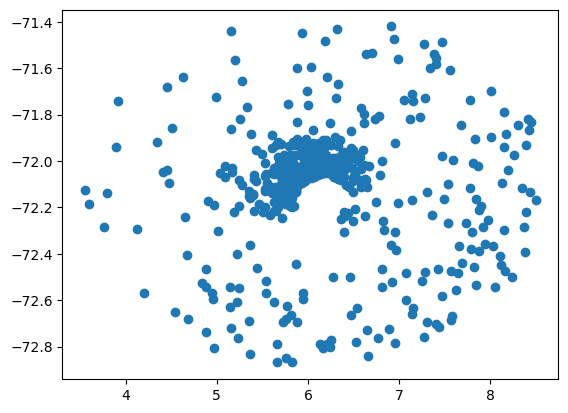

In [102]:
len(cluster1)
print(cluster1)
plt.scatter(cluster1["RA"], cluster1["DEC"])

-18.7


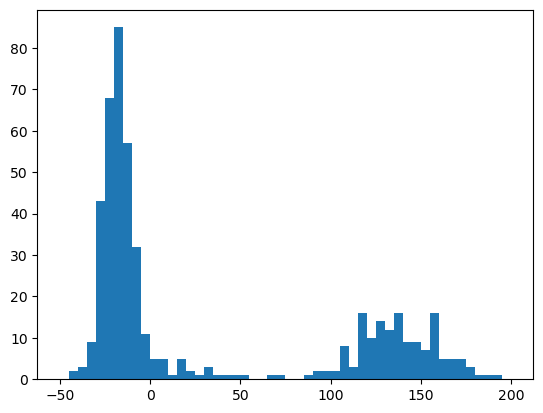

In [103]:
plt.hist(cluster1["VHELIO_AVG"],range=[-50,200], bins=50)

#create a histogram of all the stars' average velocity
#we can see that there are multiple "groups" and that one fits the given velocity of the globular cluster better

print(glob_clust["RV"][0])

(array([ 0.,  0.,  3.,  9., 43., 68., 85., 57., 32., 11.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-50., -45., -40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,
          5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
         60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
        115., 120., 125., 130., 135., 140., 145., 150., 155., 160., 165.,
        170., 175., 180., 185., 190., 195., 200.]),
 <BarContainer object of 50 artists>)

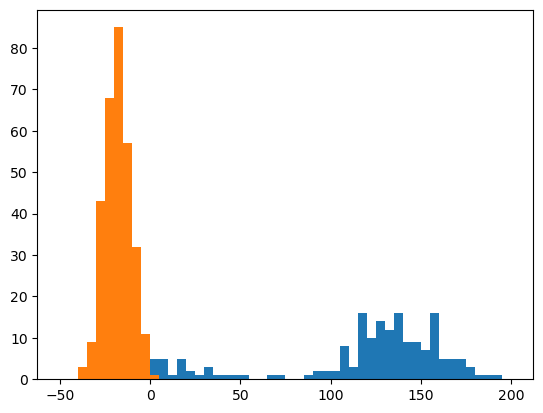

In [104]:
#filter it down more by finding the stars in the array that have a velocity within 20 of the clusters's given velocity

ind2, = np.where(((glob_clust["RV"][0])-20)<cluster1["VHELIO_AVG"])  
cluster1 = cluster1[ind2]

#first, find the indexes of any star with velocity 20 less than the known (-18.4-20 in this case)
#then, plug those indexes into cluster1 and pull out the new stars
# *(don't plug these indexes into allStar since a lot of the allstar entries have been removed at this point, so the 
#    indicies won't line up anymore)

plt.hist(cluster1["VHELIO_AVG"],range=[-50,200],bins=50)

ind3, = np.where(((glob_clust["RV"][0])+20)>cluster1["VHELIO_AVG"])
cluster1 = cluster1[ind3]

#then, find the indexes of any star with velocity 20 above the known (-18.4 + 20 in this case)
#then, again, plug those into the new cluster1 to find the final, filtered stars
                 
plt.hist(cluster1["VHELIO_AVG"],range=[-50,200],bins=50)

OK, now I got one, try the next one:

In [134]:
#trying the same thing for the 2nd globular cluster

distances = coords.sphdist(glob_clust["RA"][1]*15, glob_clust["DEC"][1], allStar["RA"], allStar["DEC"])
indi1,=np.where(distances<(glob_clust["RT"][1]/60))
clusteri=allStar[indi1]

#plt.hist(clusteri["VHELIO_AVG"],range=[-100,0],bins=50)

indi2, = np.where(((glob_clust["RV"][1])-40)<clusteri["VHELIO_AVG"])  
clusteri = clusteri[indi2]

#plt.hist(clusteri["VHELIO_AVG"],range=[-100,0],bins=50)

indi3, = np.where(((glob_clust["RV"][1])+40)>clusteri["VHELIO_AVG"])
clusteri = clusteri[indi3]
    
#plt.hist(clusteri["VHELIO_AVG"],range=[-100,0],bins=50)

In [135]:
#trying the 3rd globular cluster

distances = coords.sphdist(glob_clust["RA"][2]*15, glob_clust["DEC"][2], allStar["RA"], allStar["DEC"])
indi1,=np.where(distances<(glob_clust["RT"][2]/60))
clusteri=allStar[indi1]

#plt.hist(clusteri["VHELIO_AVG"],range=[0,300],bins=100)

indi2, = np.where(((glob_clust["RV"][2])-40)<clusteri["VHELIO_AVG"])  
clusteri = clusteri[indi2]

#plt.hist(clusteri["VHELIO_AVG"],range=[0,300],bins=100)

indi3, = np.where(((glob_clust["RV"][2])+40)>clusteri["VHELIO_AVG"])
clusteri = clusteri[indi3]
    
#plt.hist(clusteri["VHELIO_AVG"],range=[0,300],bins=100)

In [ ]:
#trying the 4th globular cluster

distances = coords.sphdist(glob_clust["RA"][3]*15, glob_clust["DEC"][3], allStar["RA"], allStar["DEC"])
indi1,=np.where(distances<(glob_clust["RT"][3]/60))
clusteri=allStar[indi1]

#plt.hist(clusteri["VHELIO_AVG"],range=[0,300],bins=100)

indi2, = np.where(((glob_clust["RV"][3])-40)<clusteri["VHELIO_AVG"])  
clusteri = clusteri[indi2]

#plt.hist(clusteri["VHELIO_AVG"],range=[0,300],bins=100)

indi3, = np.where(((glob_clust["RV"][3])+40)>clusteri["VHELIO_AVG"])
clusteri = clusteri[indi3]
    
#plt.hist(clusteri["VHELIO_AVG"],range=[0,300],bins=100)

#This one doesn't have any stars in it, since it's first clusteri length = 1 and that star's velocity is way different than
#that of the globular cluster
#Assume that apogee didn't cover this cluster?

In [263]:
#generalize the process and do it for all 150 known globular clusters in milky way
#each entry in cluster_stars is the array of all the apogee stars (and their data) that fall within each cluster's radius
# and are of similar velocities

cluster_stars = [0]*150
low_star_counts = []
high_star_counts = []
mid_star_counts = []
numberOfMatches = np.zeros(150,int)


for i in range(150):
    distances = coords.sphdist(glob_clust["RA"][i]*15, glob_clust["DEC"][i], allStar["RA"], allStar["DEC"])
    indi1,=np.where(distances<(glob_clust["RT"][i]/60))
    nmatch = len(indi1)
    if(nmatch==0):
        print("No radius matches found for " + str(glob_clust[i]["ID"]))
        cluster_stars[i] = None
        continue
    clusteri=allStar[indi1]
    
    indi2, = np.where(((glob_clust["RV"][i])-30)<clusteri["VHELIO_AVG"])  
    clusteri = clusteri[indi2]
    indi3, = np.where(((glob_clust["RV"][i])+30)>clusteri["VHELIO_AVG"])
    clusteri = clusteri[indi3]
    
    
    
    indi3, = np.where(((glob_clust["FEH"][i])-1)<clusteri["FE_H"])
    clusteri = clusteri[indi3]
    indi3, = np.where(((glob_clust["FEH"][i])+1)>clusteri["FE_H"])
    clusteri = clusteri[indi3]
        
    
    numberOfMatches[i] = len(clusteri)
    
    if(len(clusteri)<8):
        low_star_counts.append(clusteri)
    #elif(len(clusteri)>20):
        #high_star_counts.append(clusteri)
    else:
        mid_star_counts.append(clusteri)
        
    
    cluster_stars[i] = clusteri
    
    
    #plt.hist(cluster_stars[i]["VHELIO_AVG"],range=[-300,300],bins=100)
   
    
#clust1 = cluster_stars[0]
#type(clust1)
#plt.hist(clust1,range=[-300,300], bins=200)

In [220]:
print(len(high_star_counts))
print(len(low_star_counts))
print(len(mid_star_counts))

36
96
18


In [201]:
#for i in range(len(low_star_counts)):
    #plt.hist(low_star_counts[i]["VHELIO_AVG"],range=[-300,300],bins=200)

In [202]:
#for i in range(len(high_star_counts)):
    #graphmin = high_star_counts[i]["VHELIO_AVG"][0] - 70
    #graphmax = graphmin+140
    #plt.hist(high_star_counts[i]["VHELIO_AVG"],range=[graphmin,graphmax],bins=100)
    #plt.show()


In [203]:
#for i in range(len(mid_star_counts)):
    #graphmin = mid_star_counts[i]["VHELIO_AVG"][0]-70
    #graphmax = graphmin+140
    #lt.hist(mid_star_counts[i]["VHELIO_AVG"],range=[graphmin,graphmax],bins=100)
    #lt.show()

Graph all of the locations and velocities in comparison to the known globular cluster values

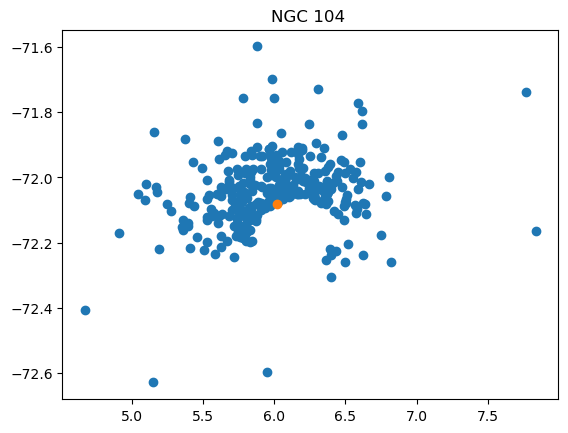

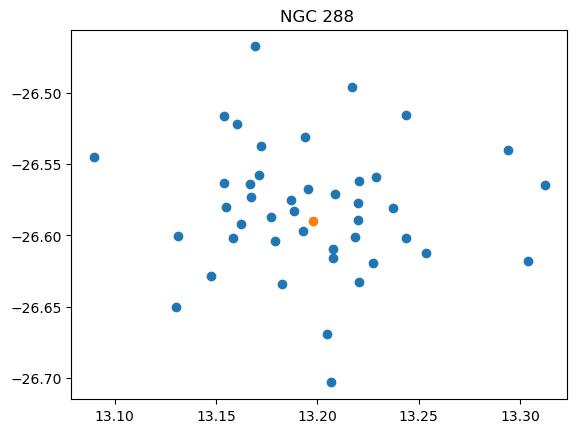

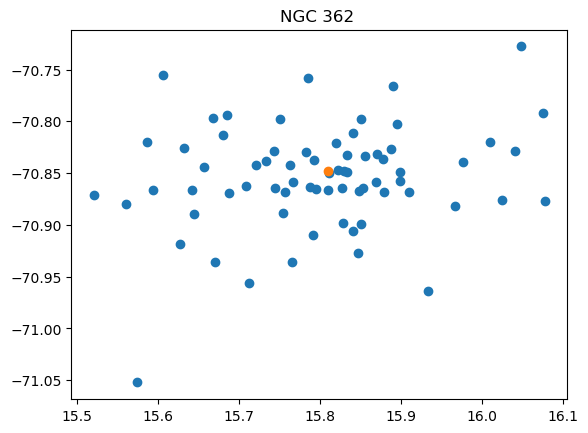

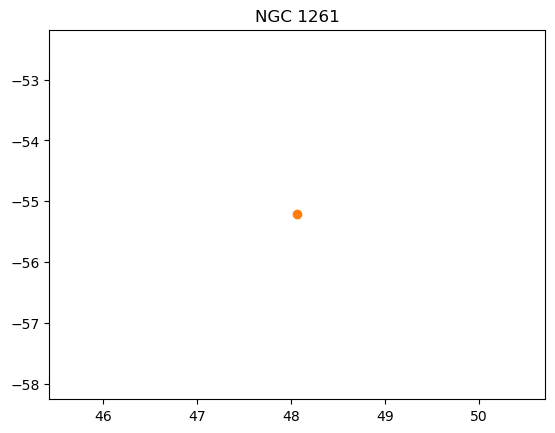

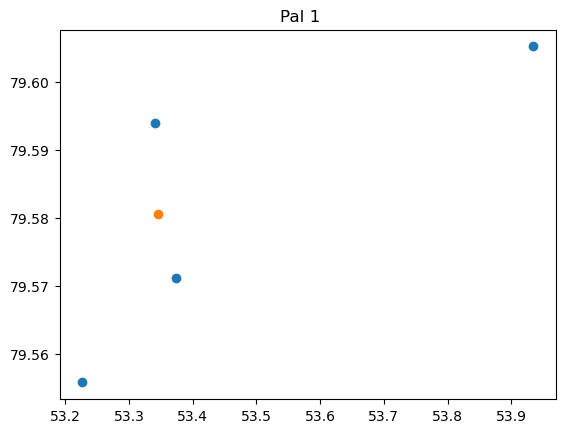

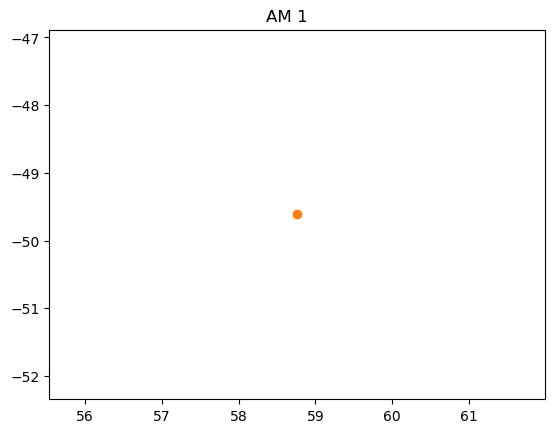

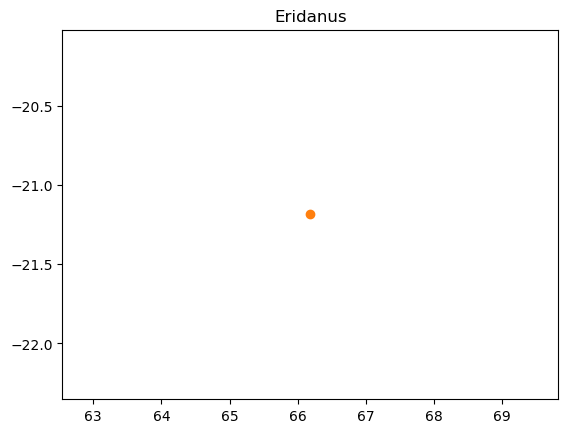

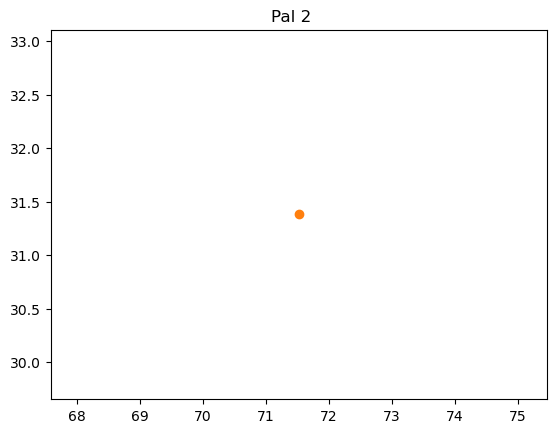

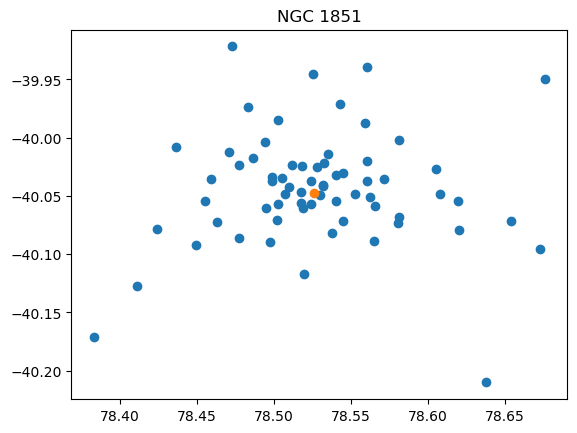

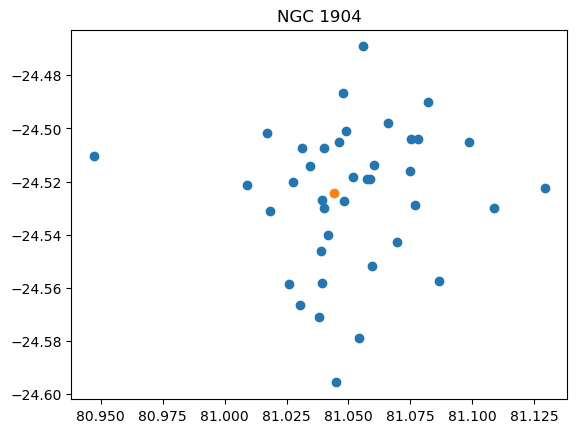

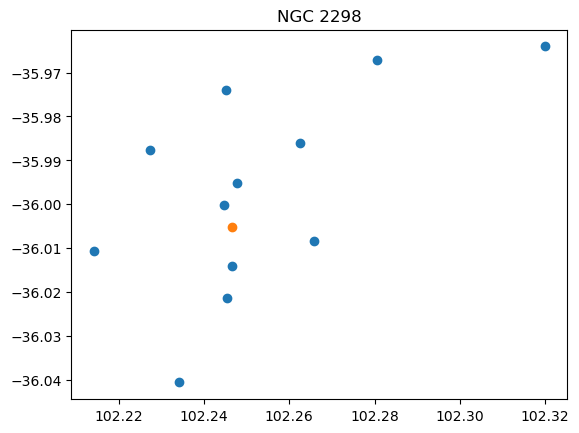

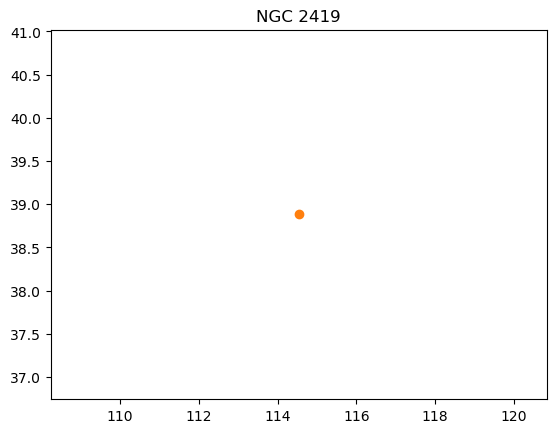

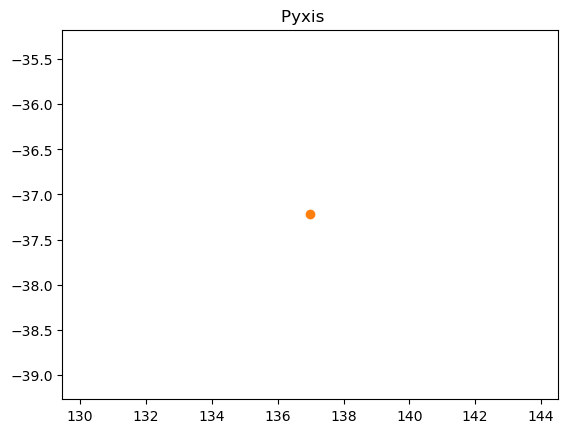

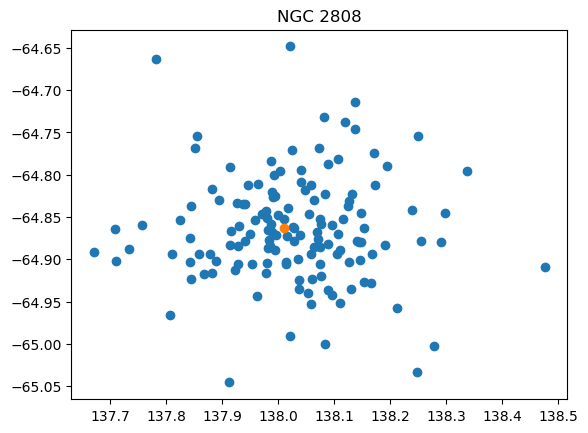

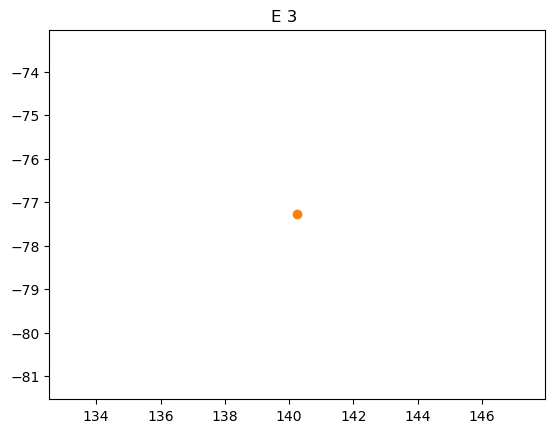

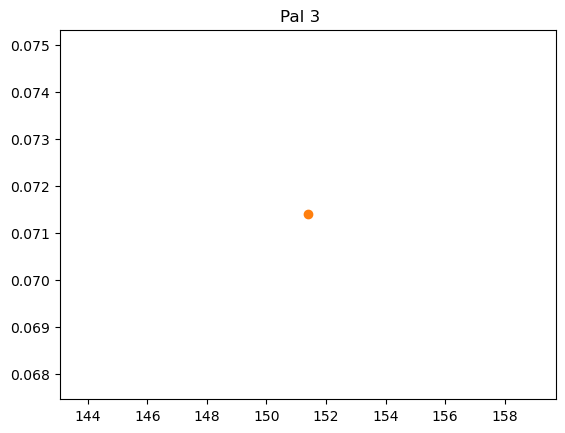

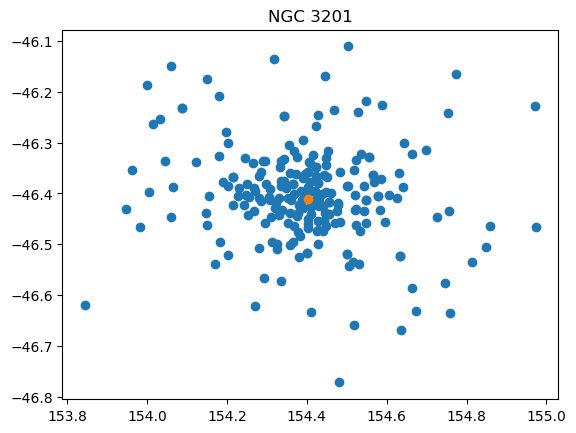

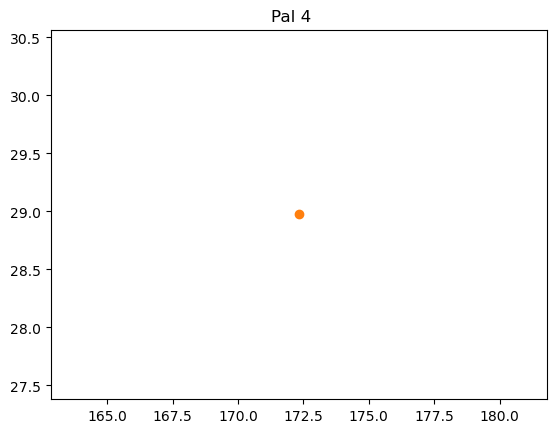

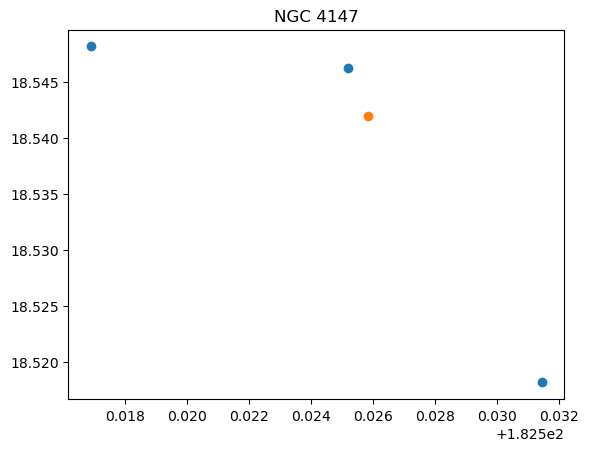

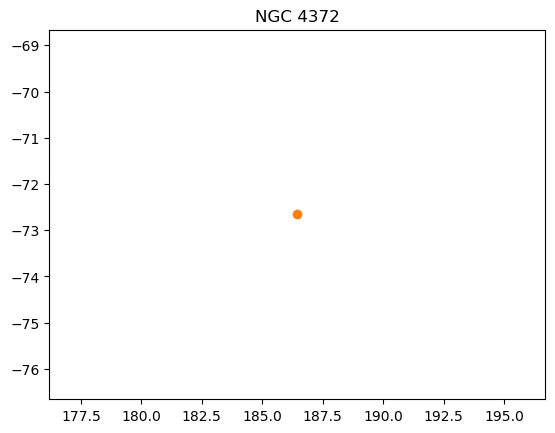

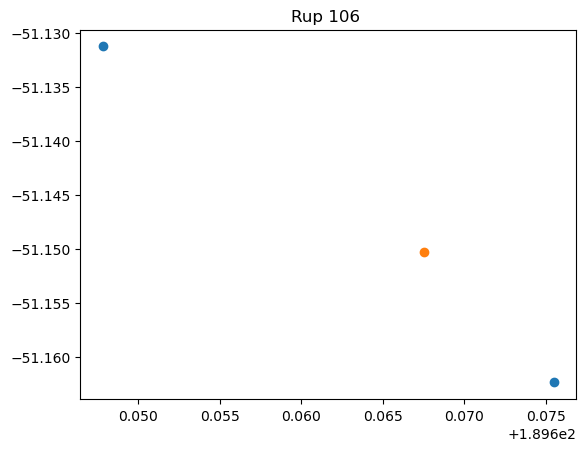

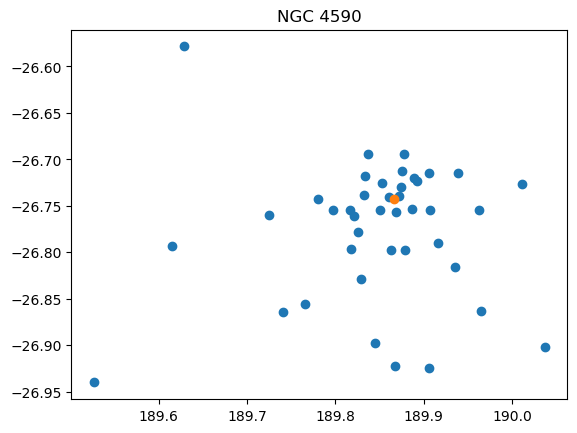

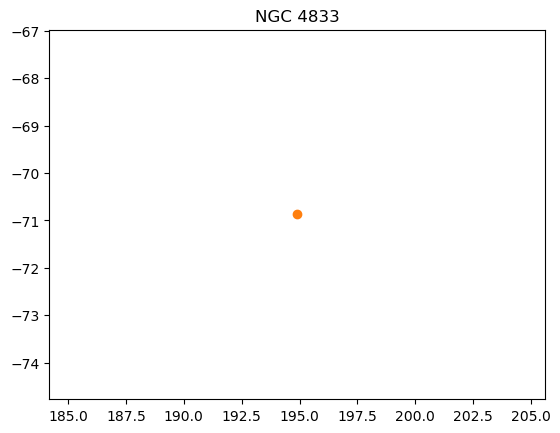

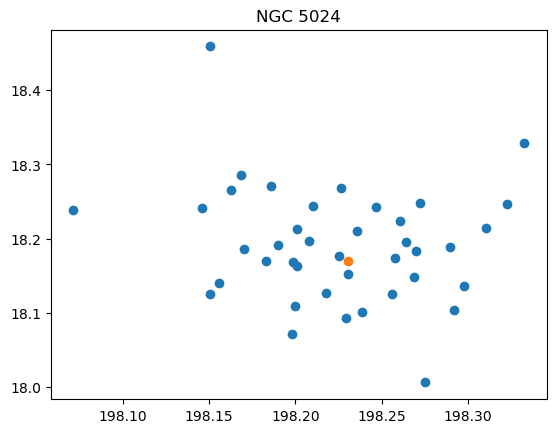

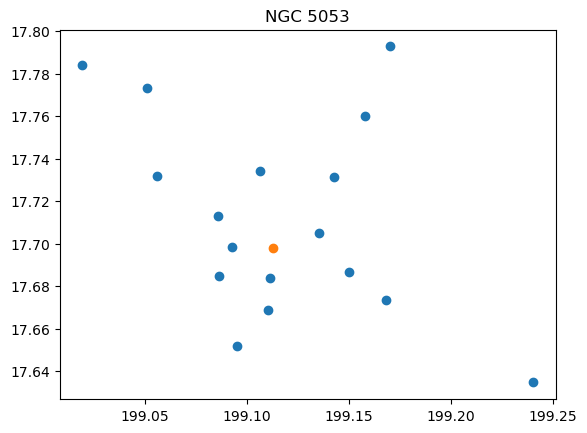

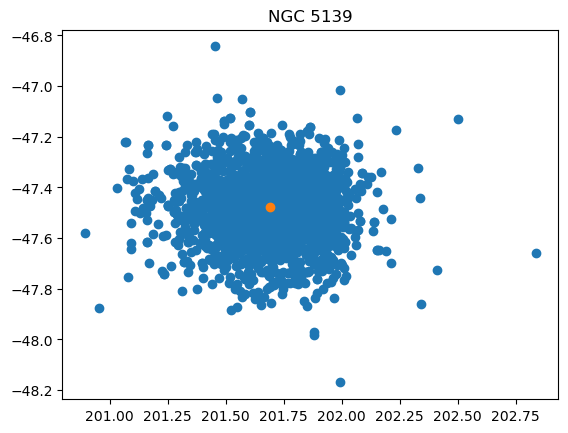

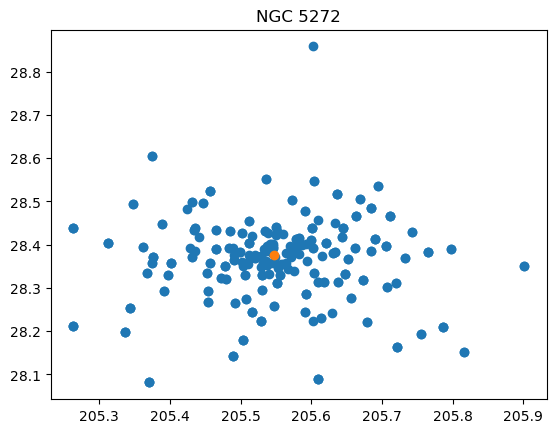

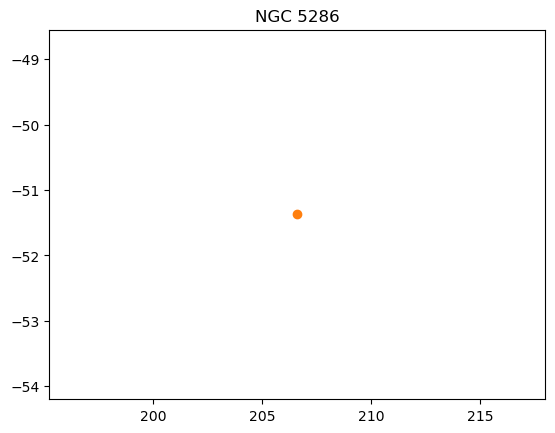

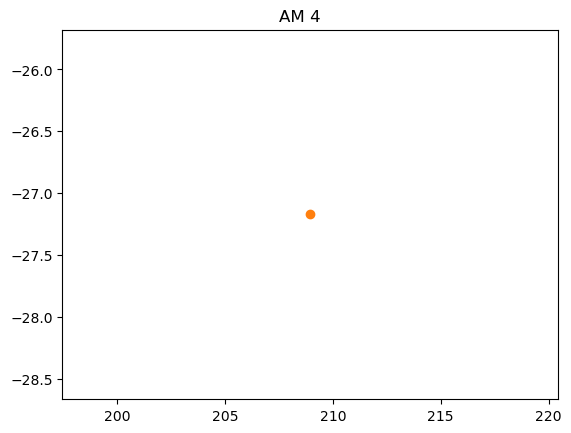

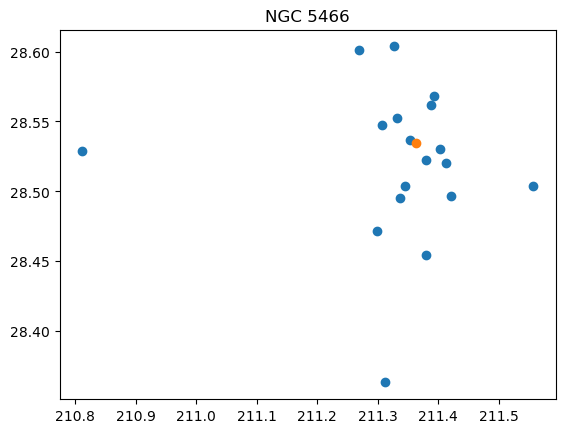

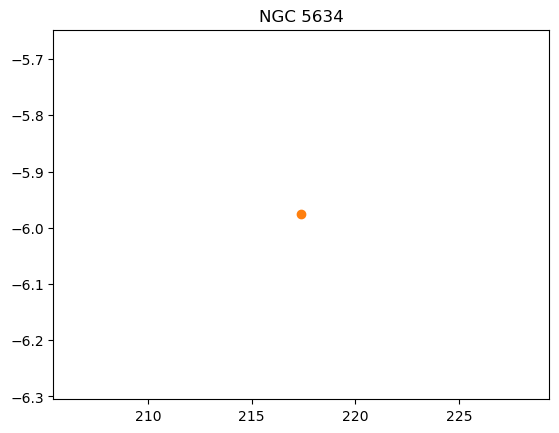

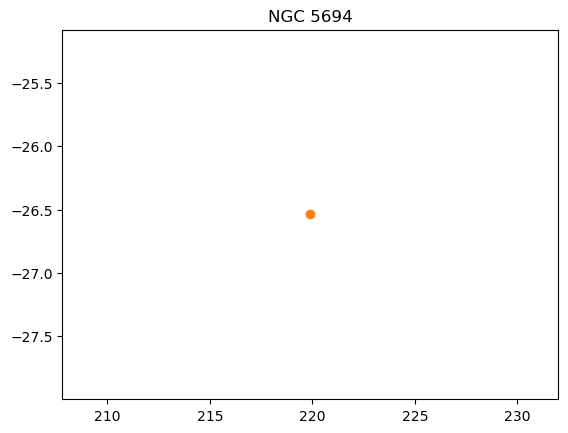

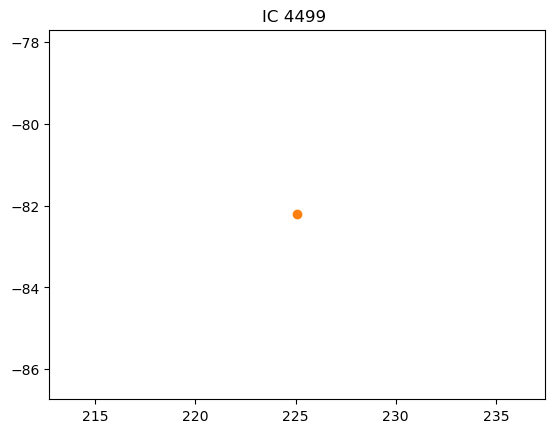

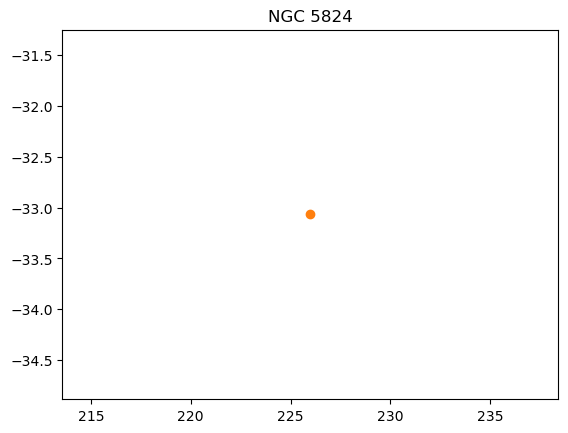

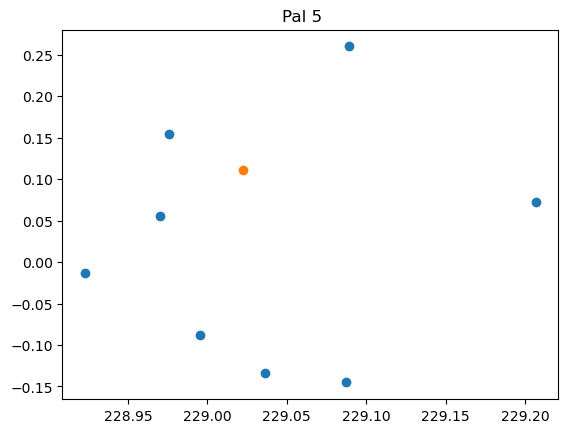

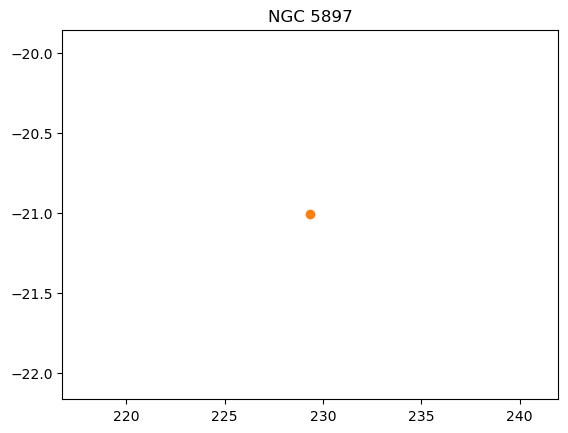

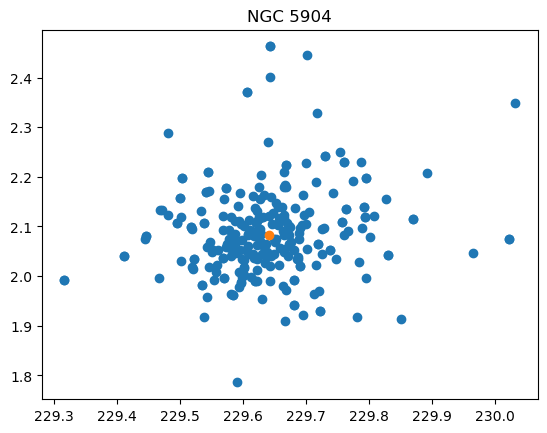

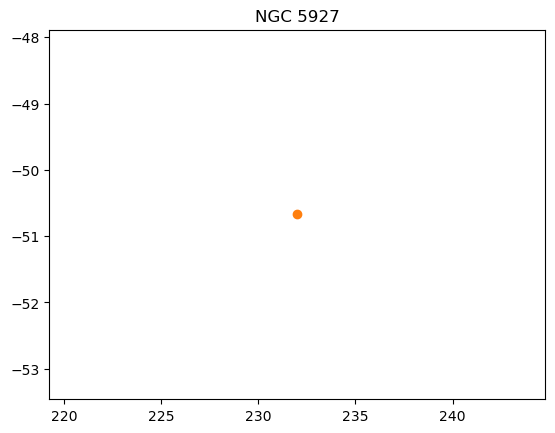

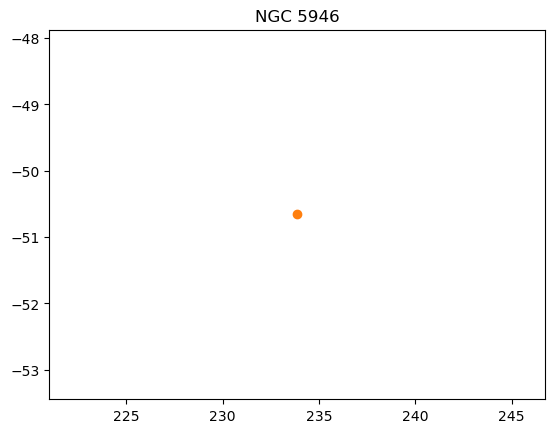

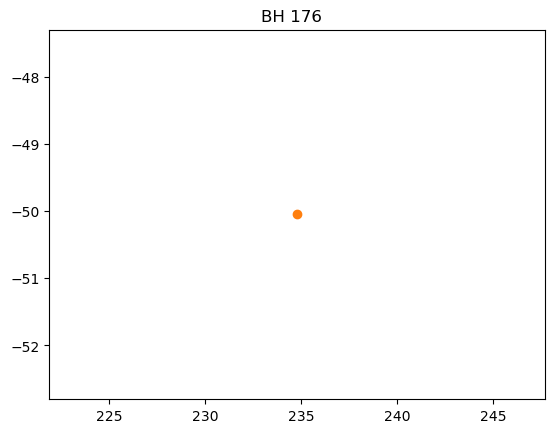

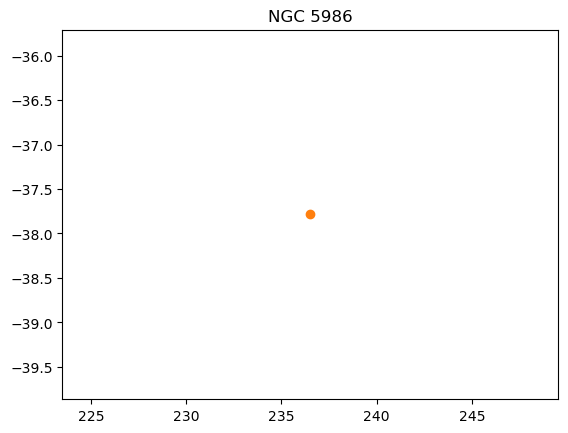

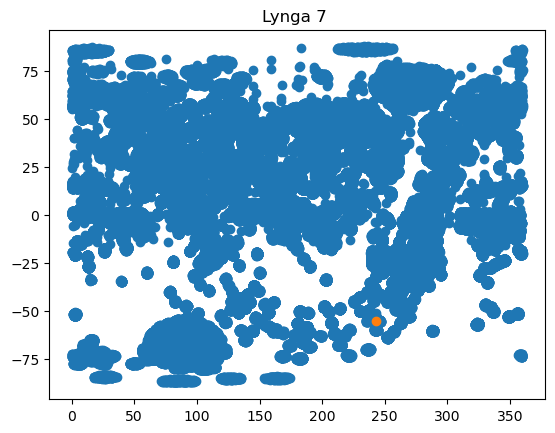

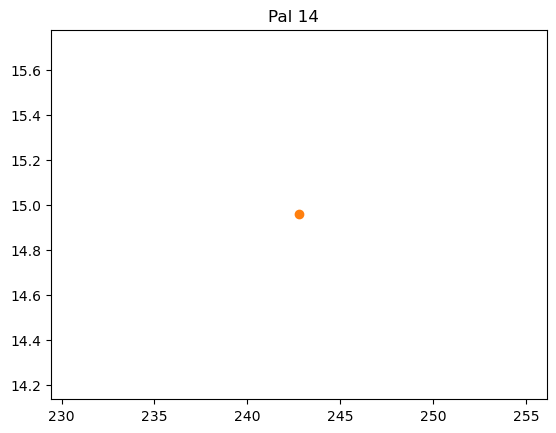

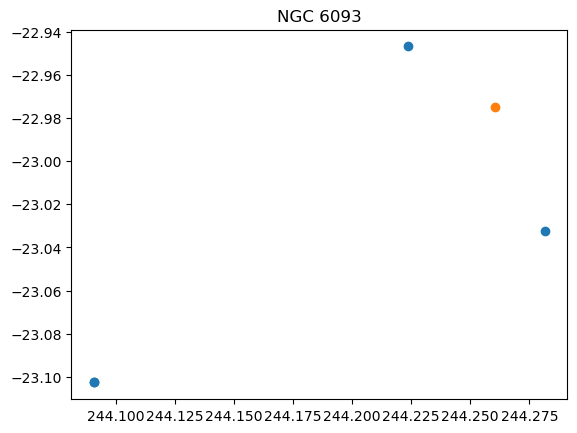

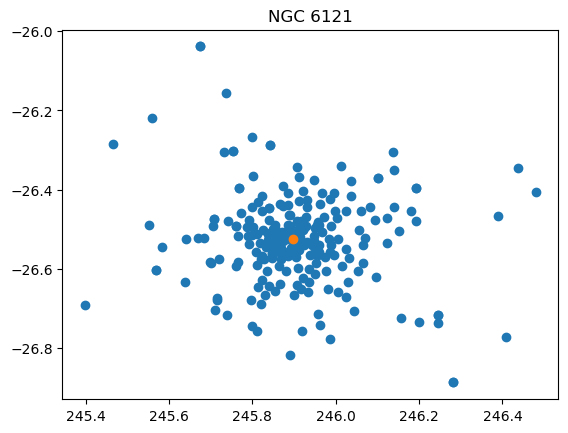

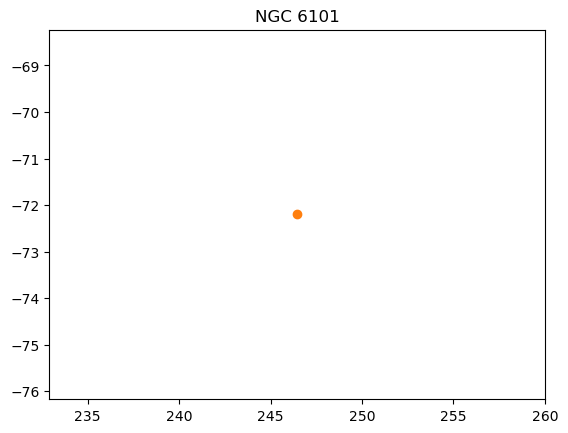

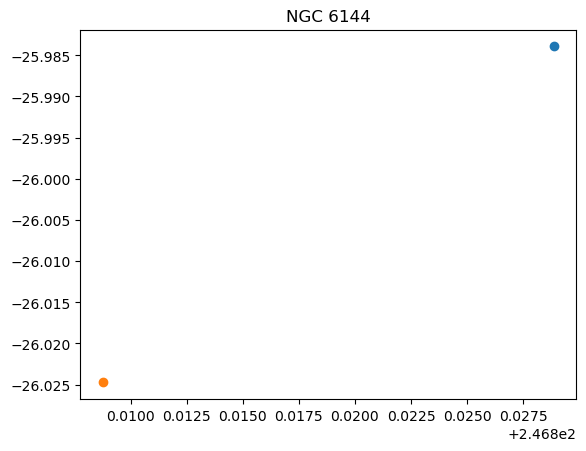

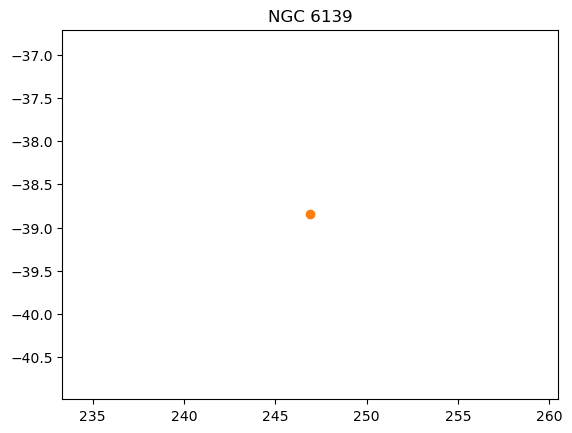

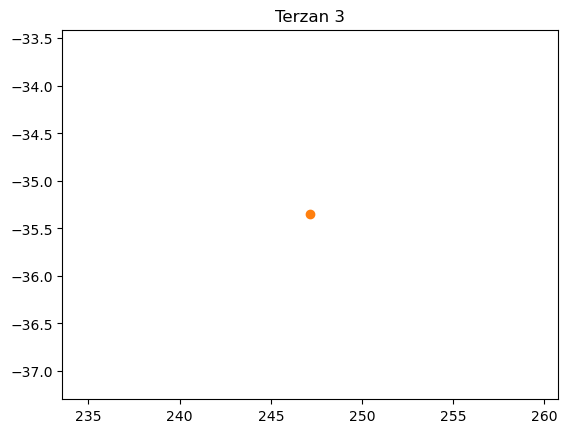

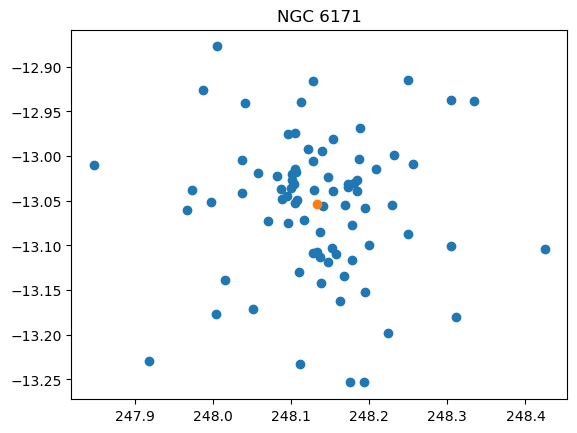

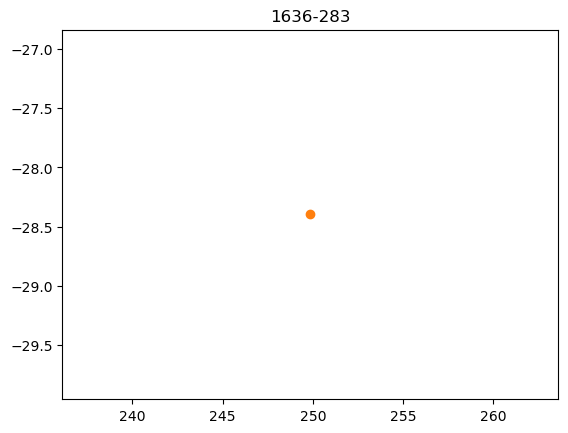

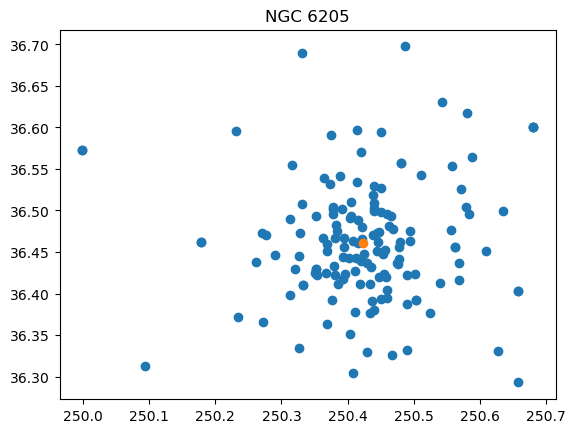

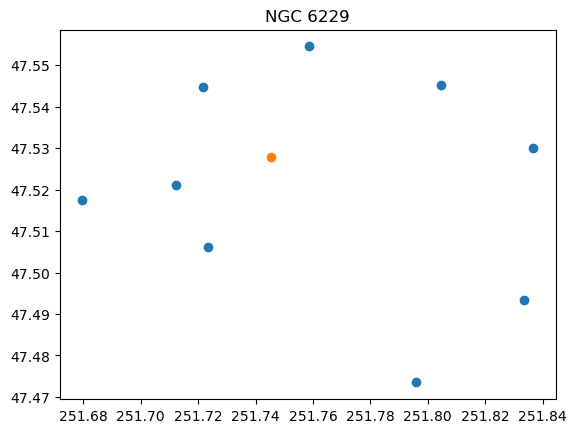

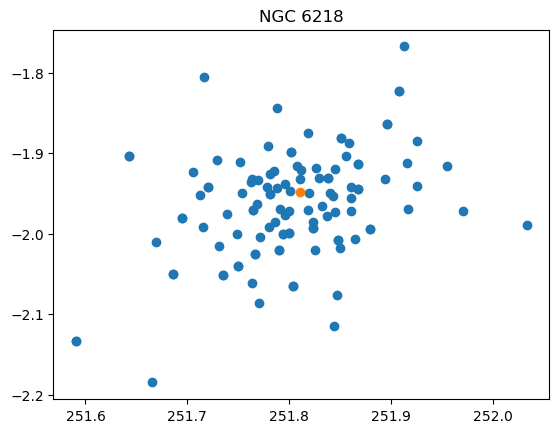

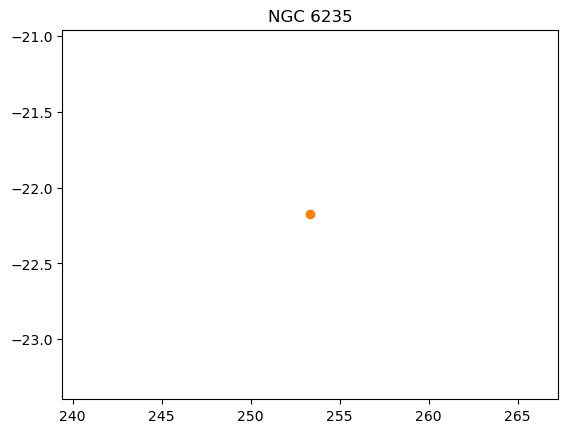

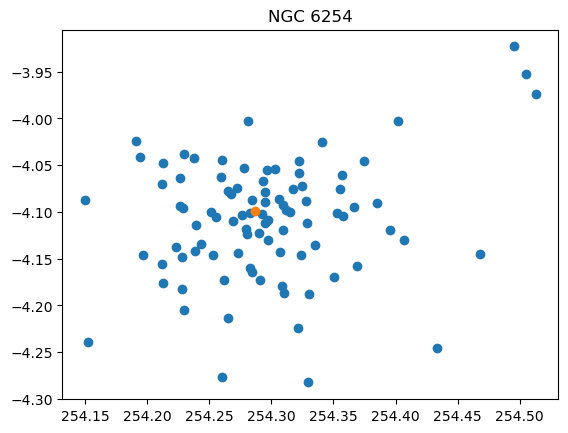

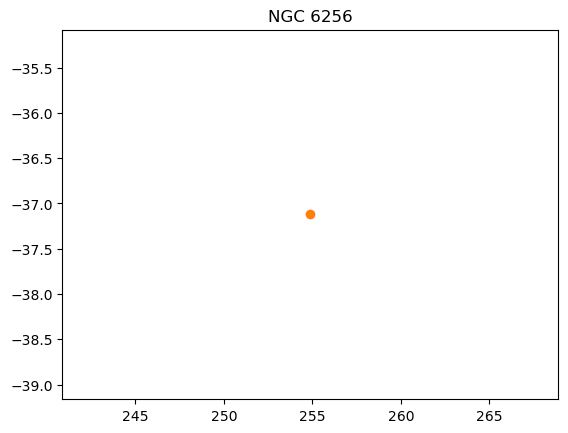

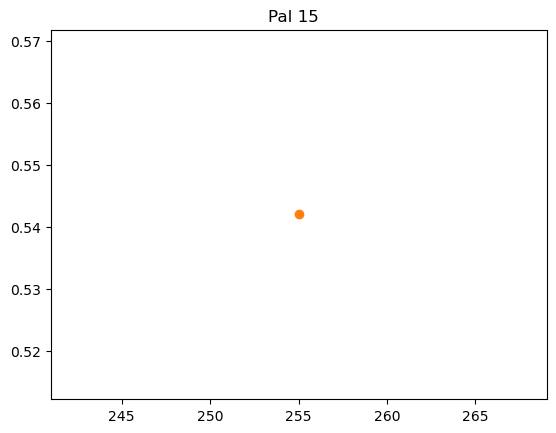

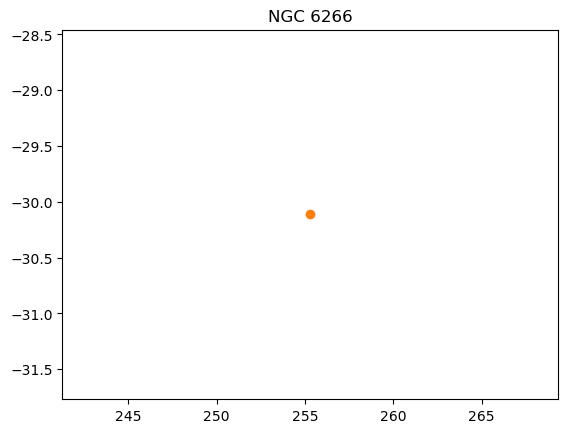

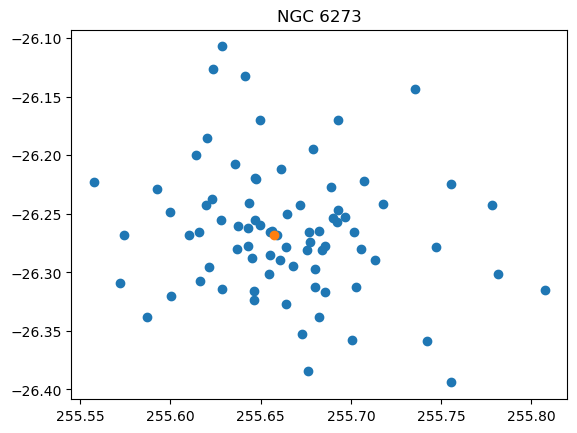

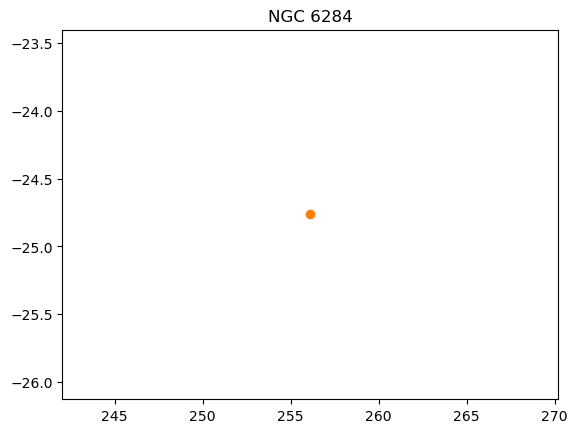

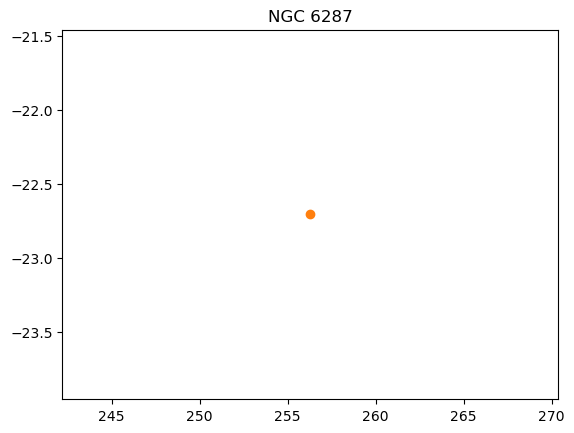

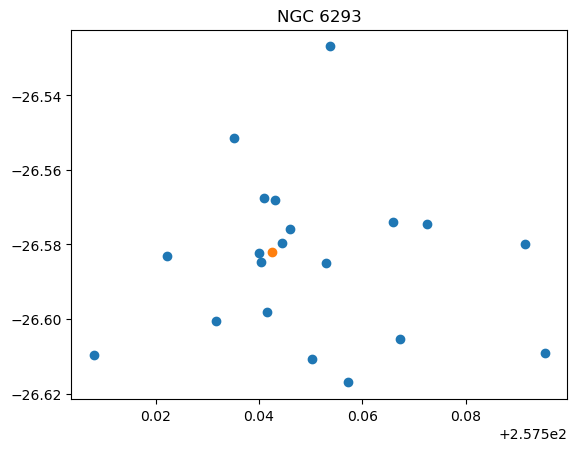

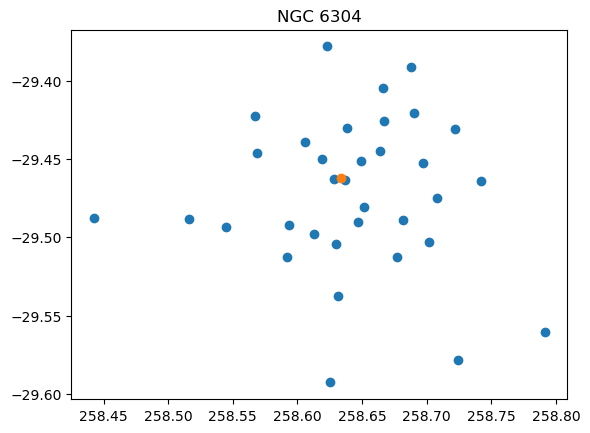

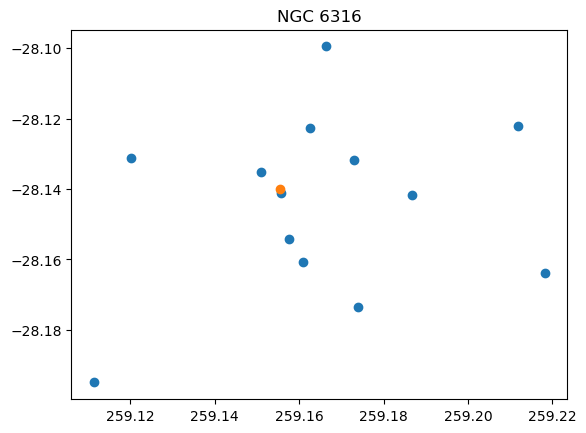

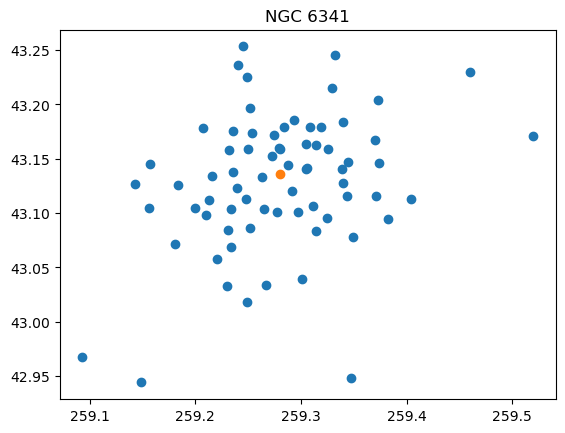

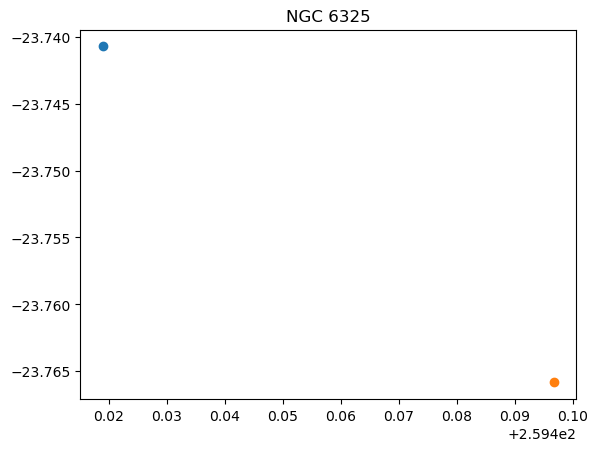

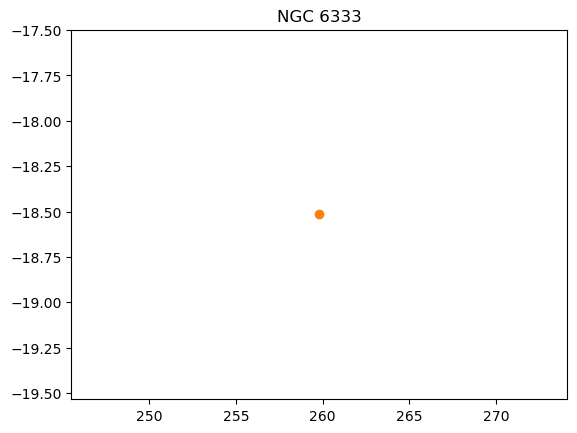

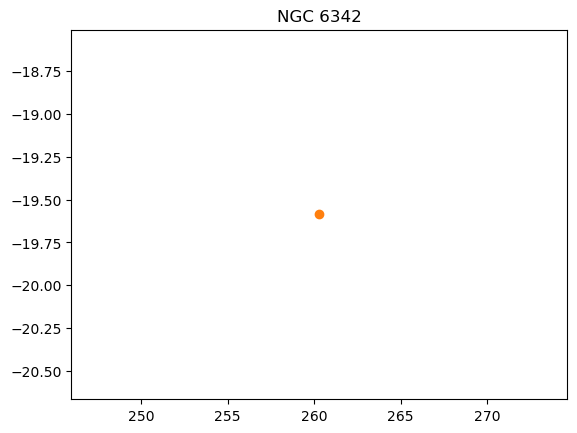

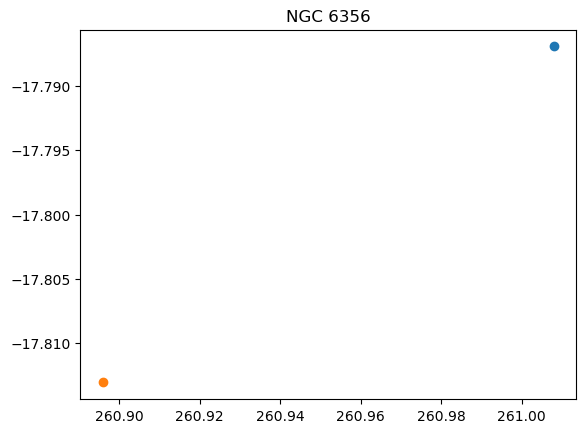

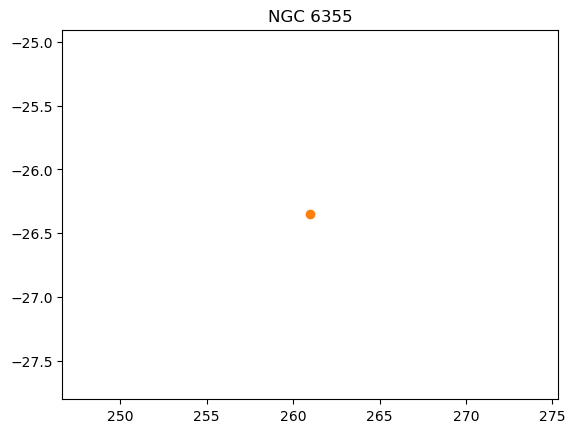

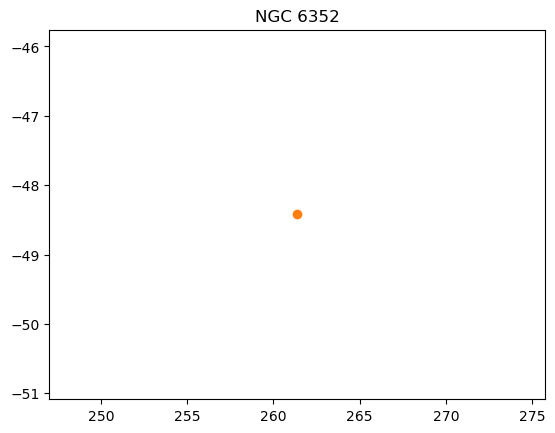

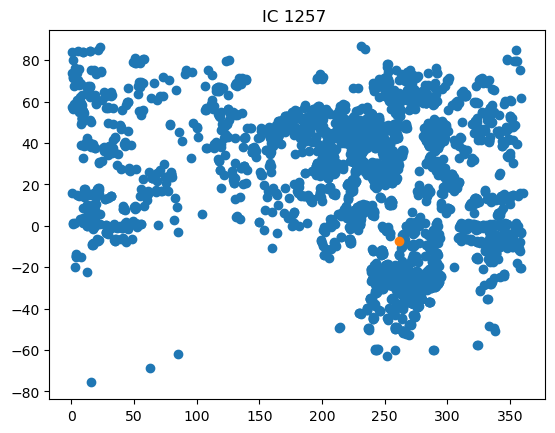

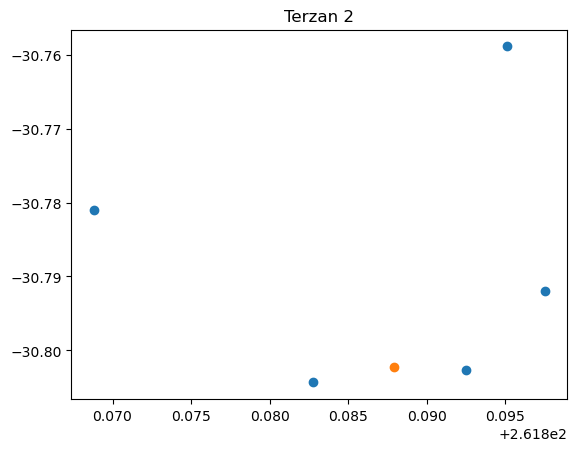

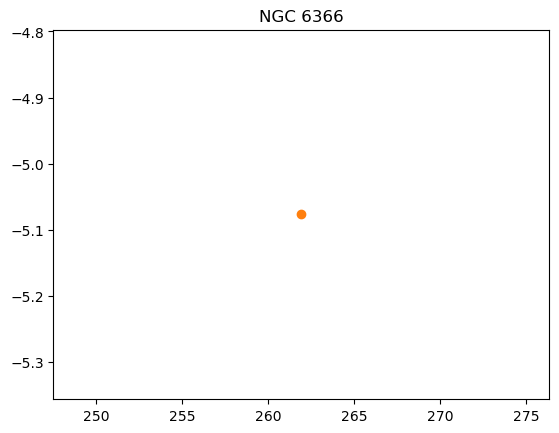

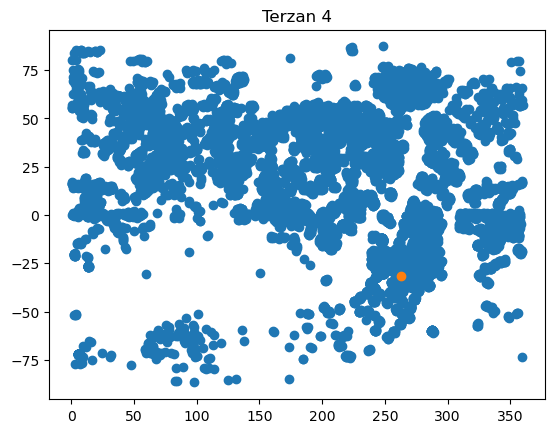

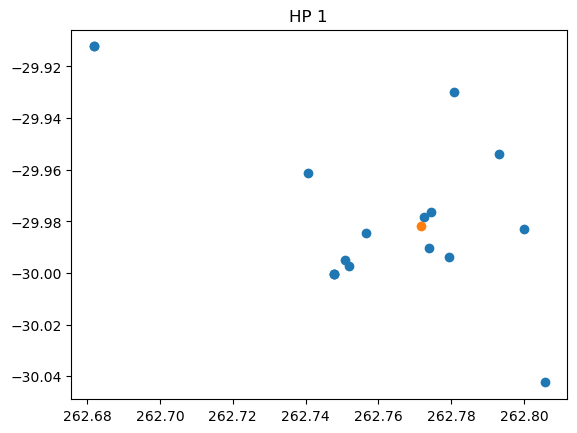

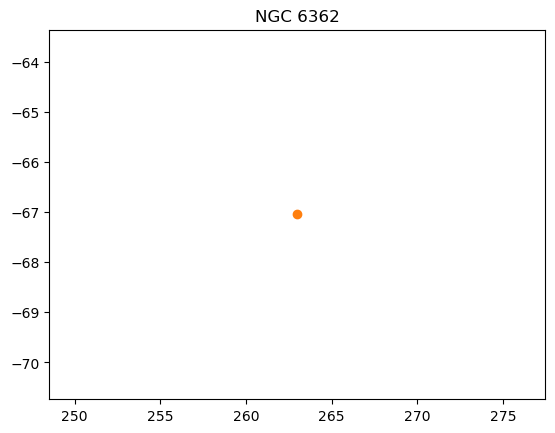

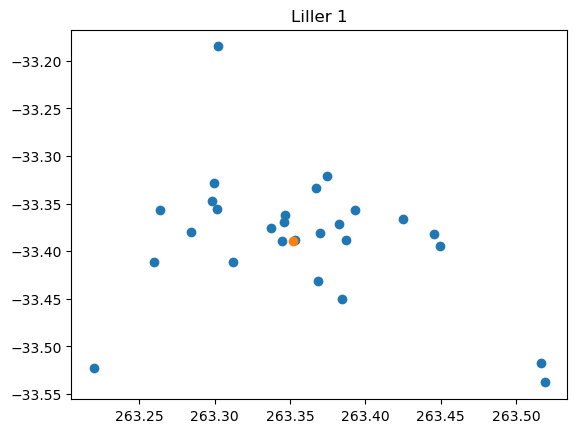

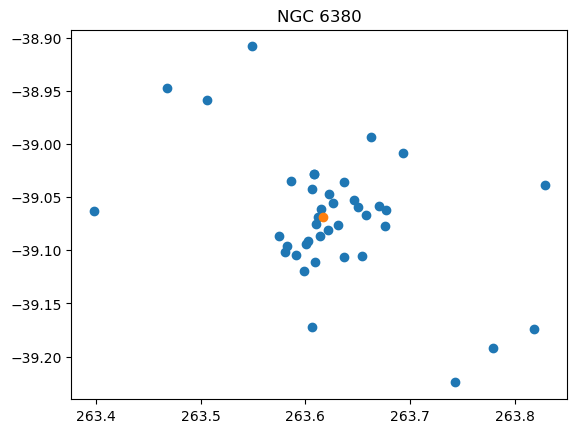

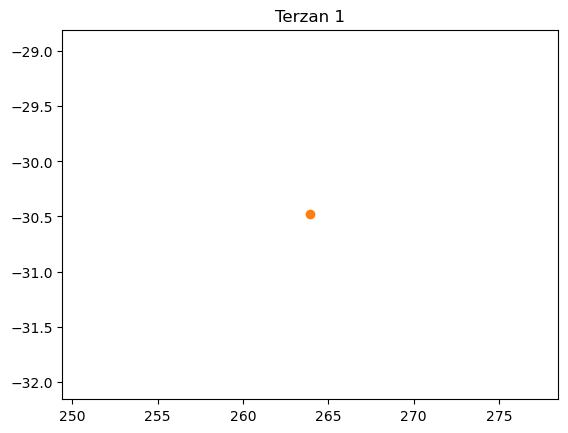

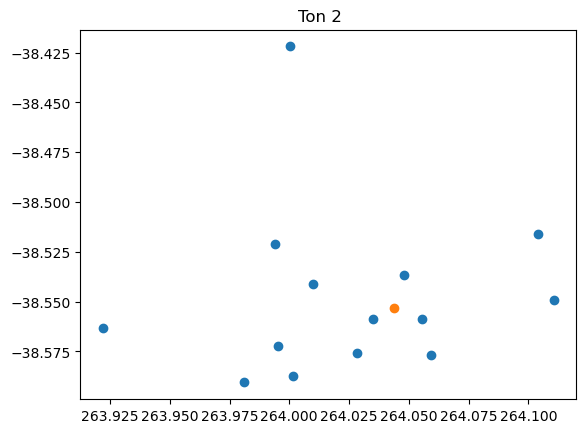

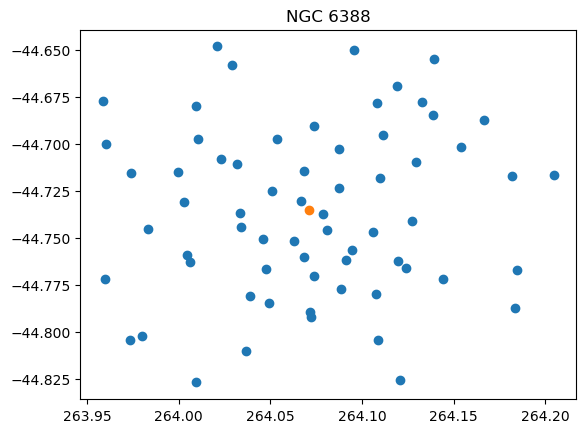

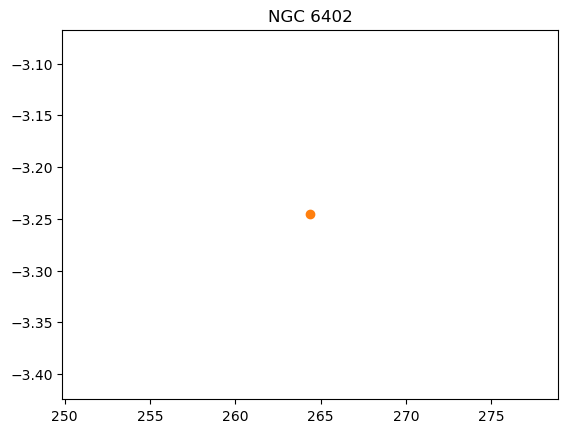

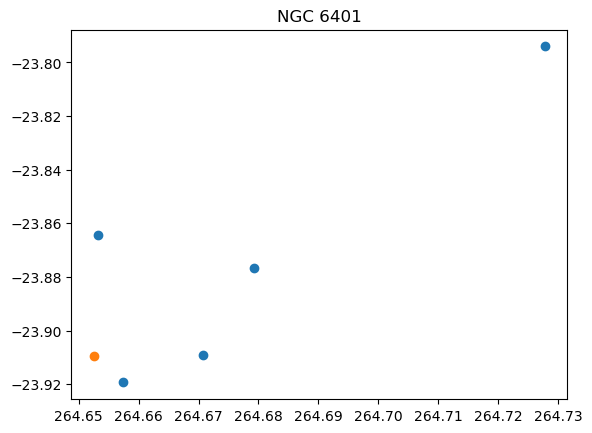

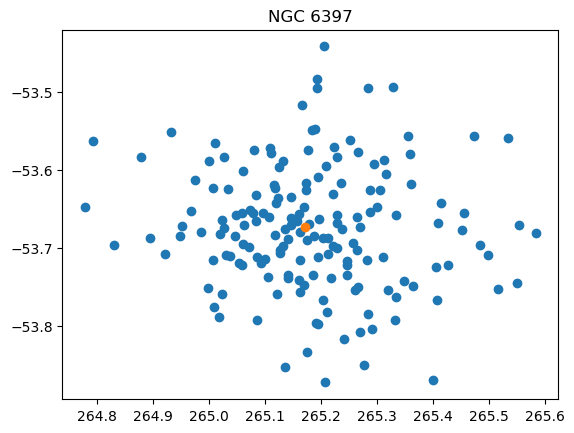

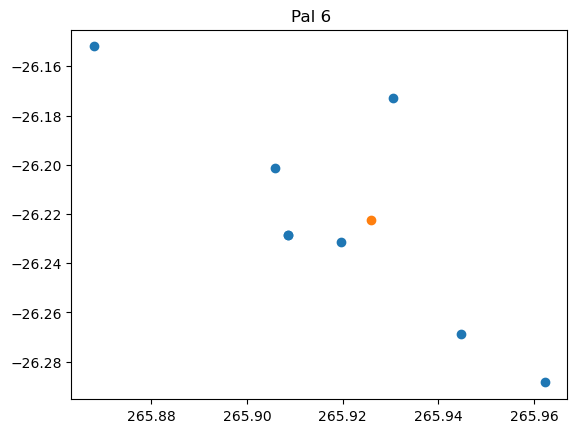

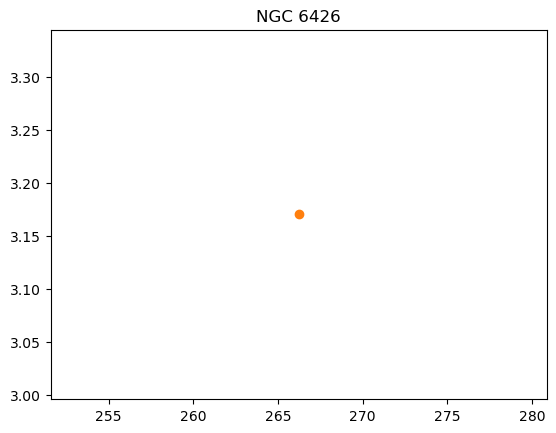

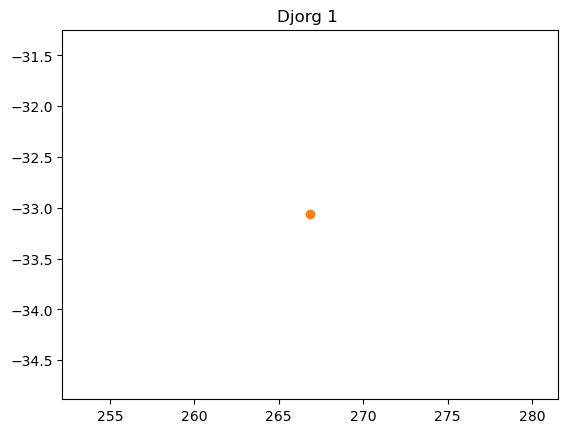

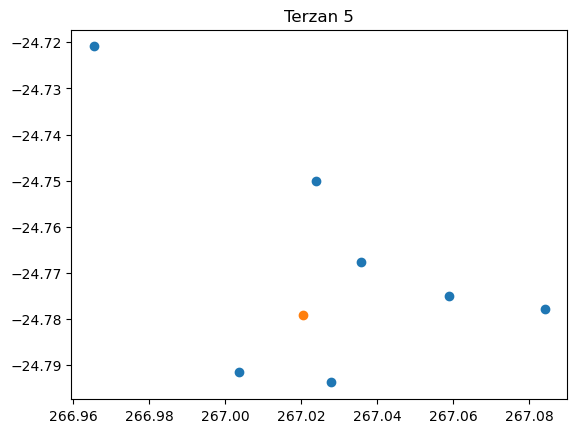

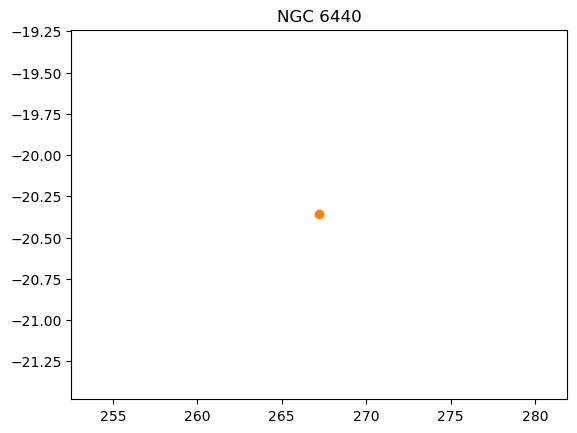

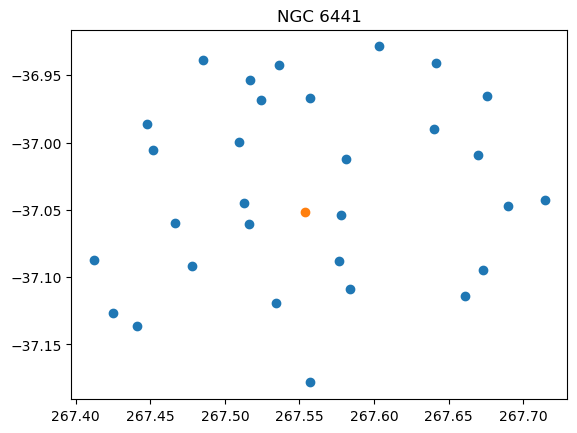

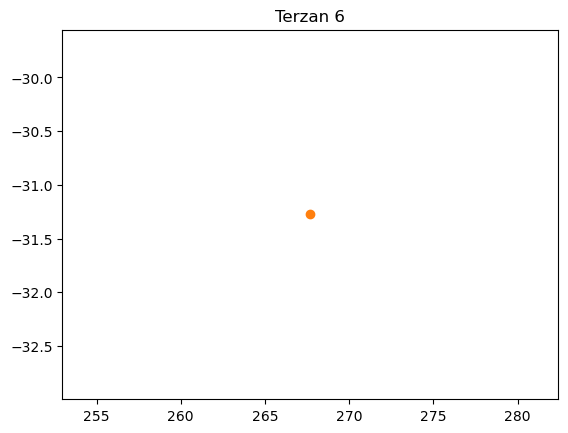

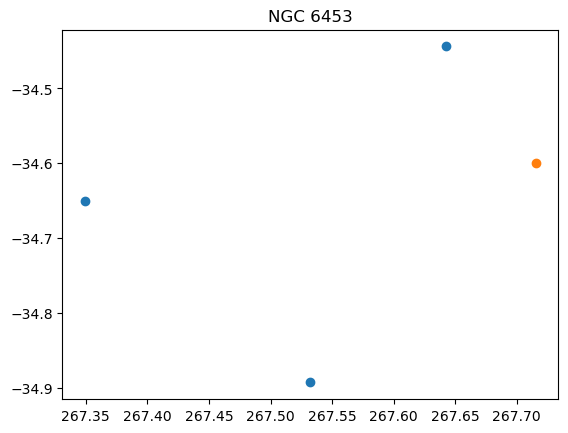

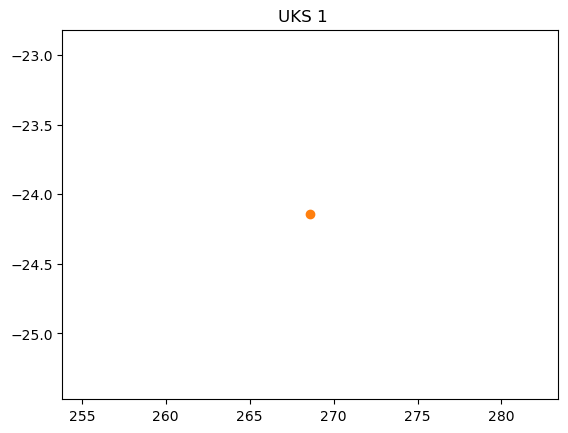

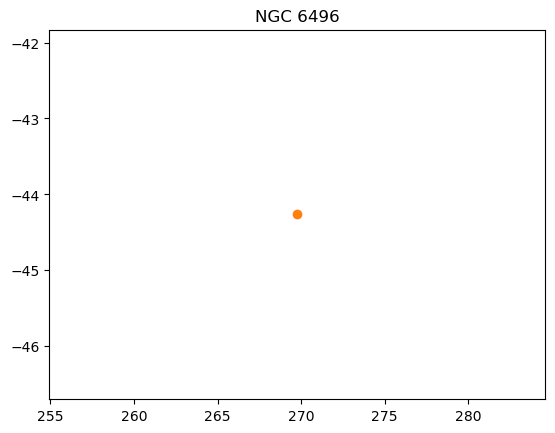

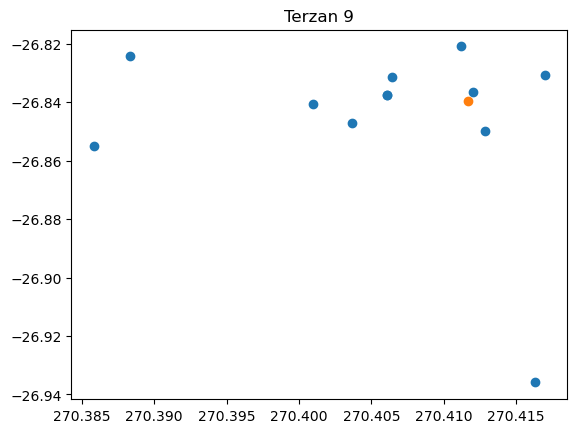

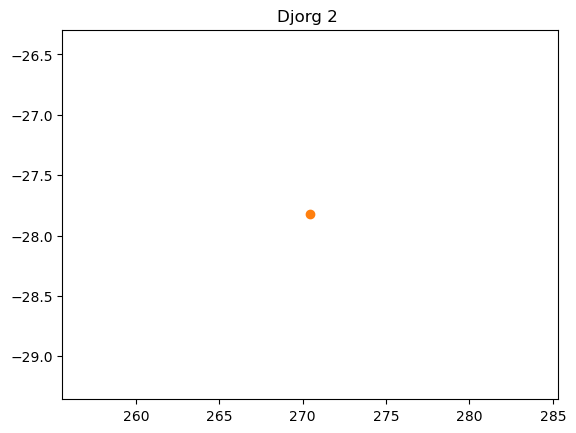

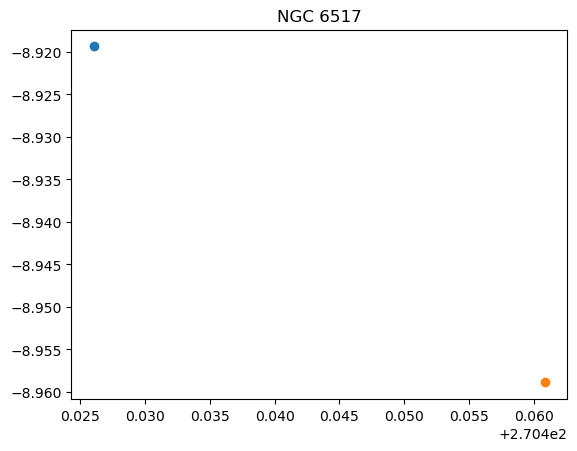

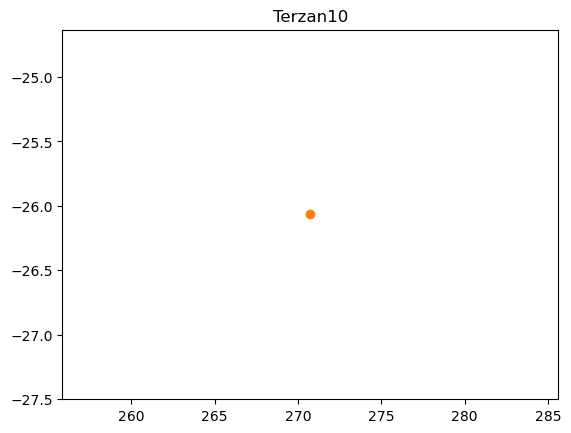

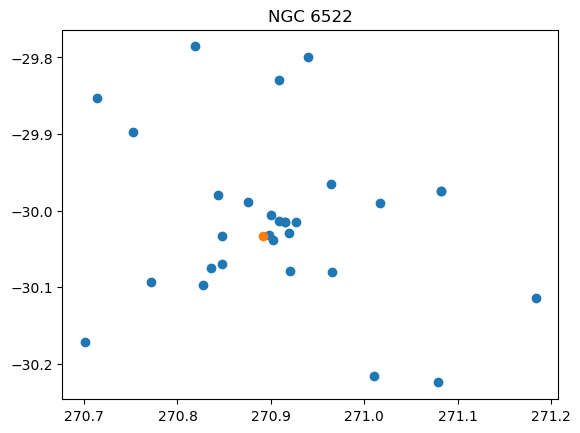

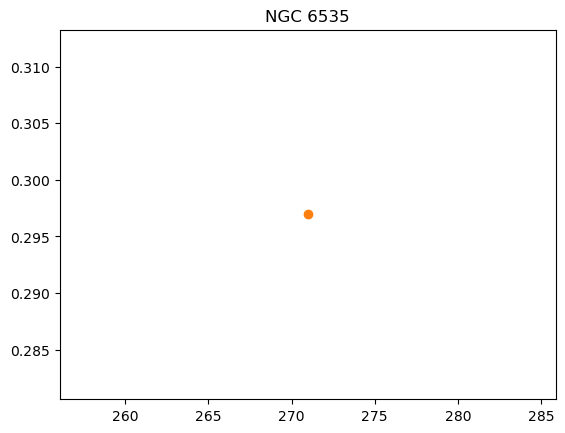

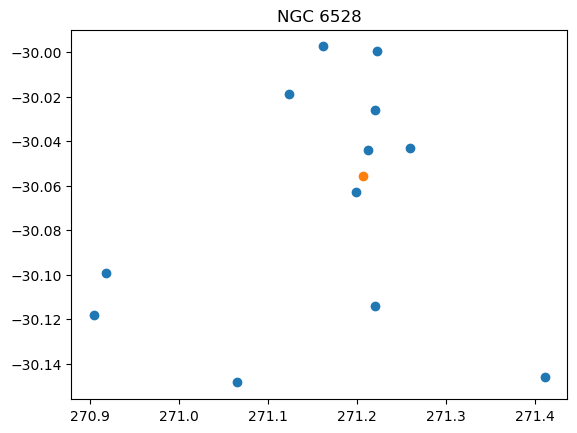

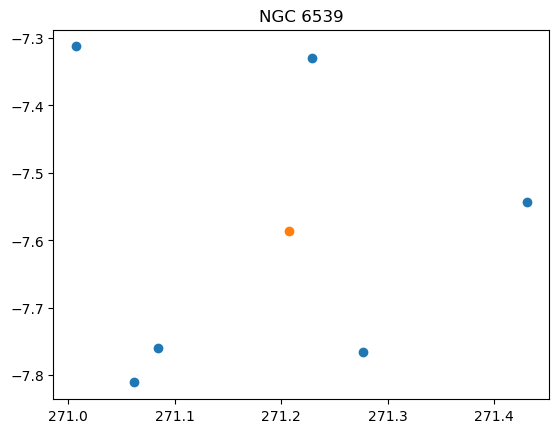

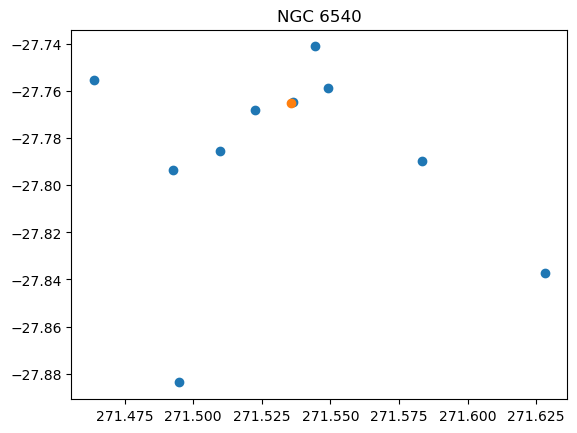

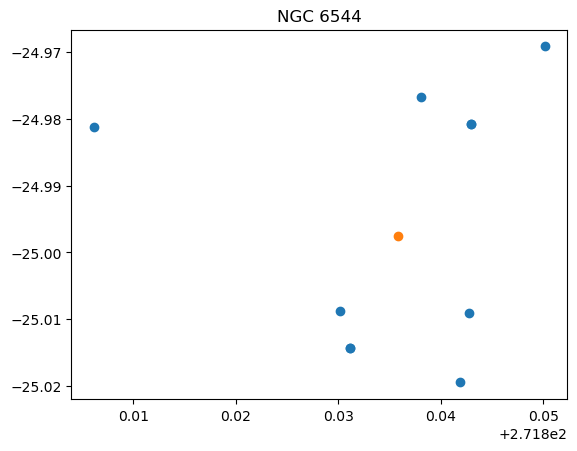

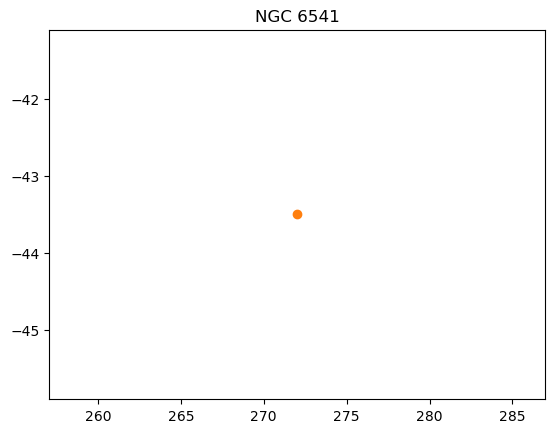

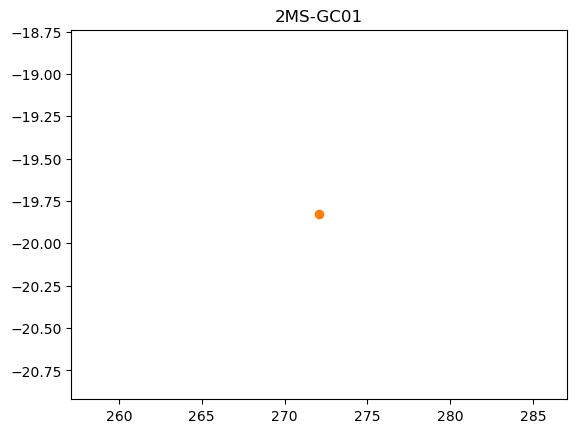

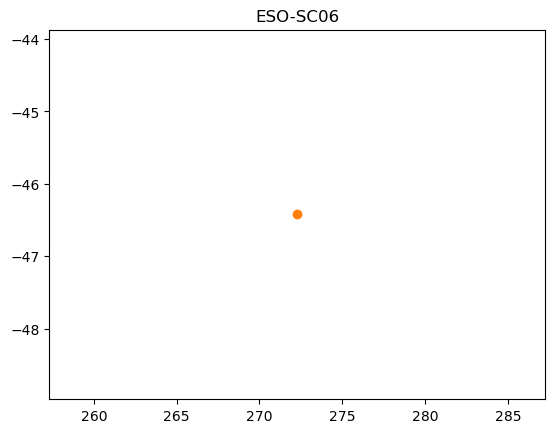

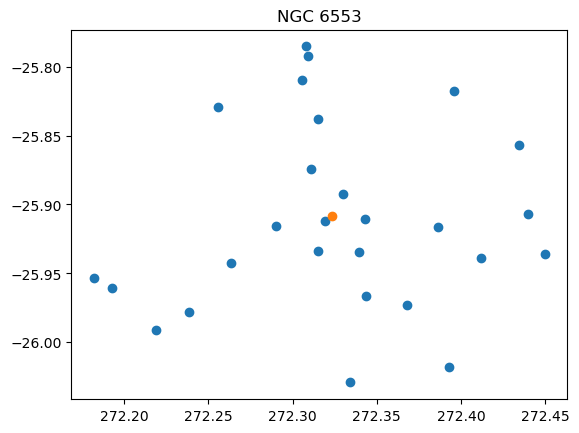

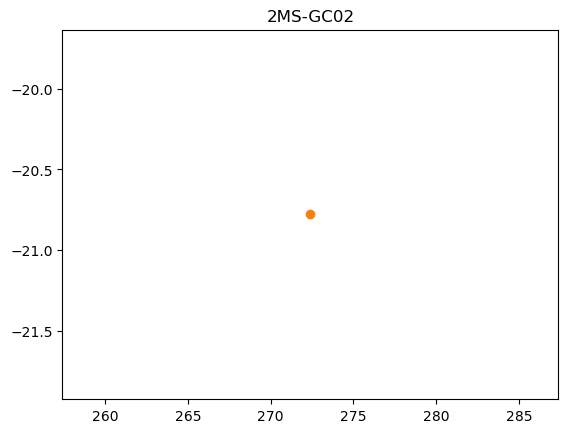

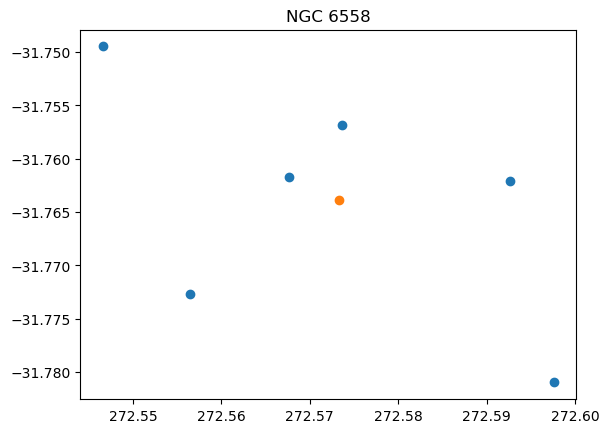

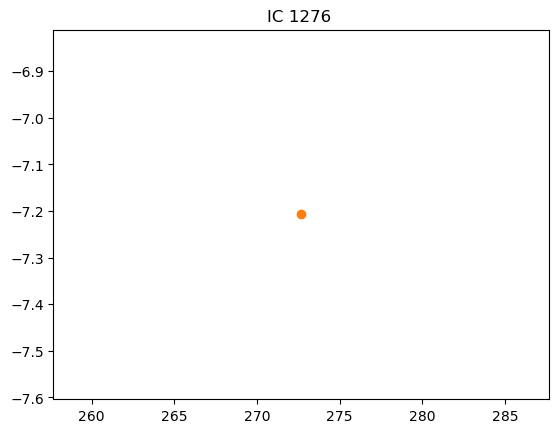

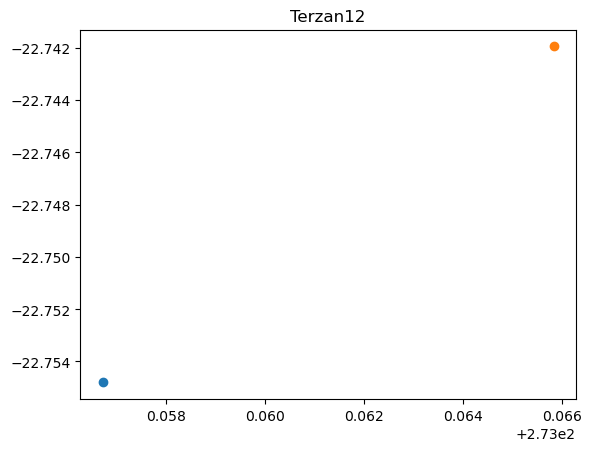

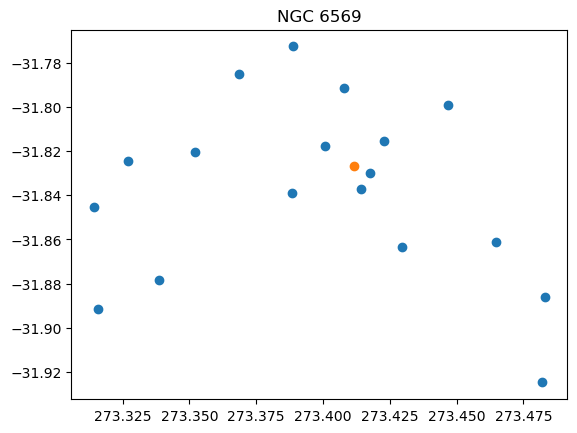

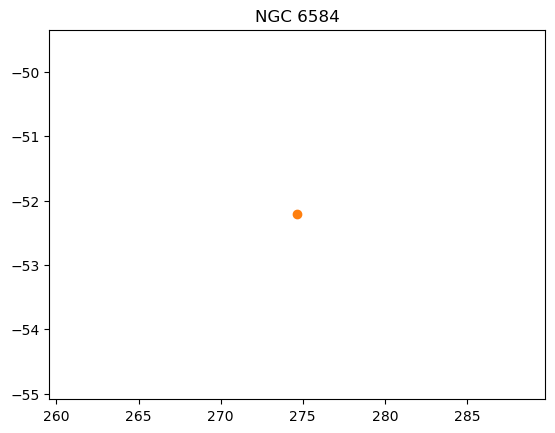

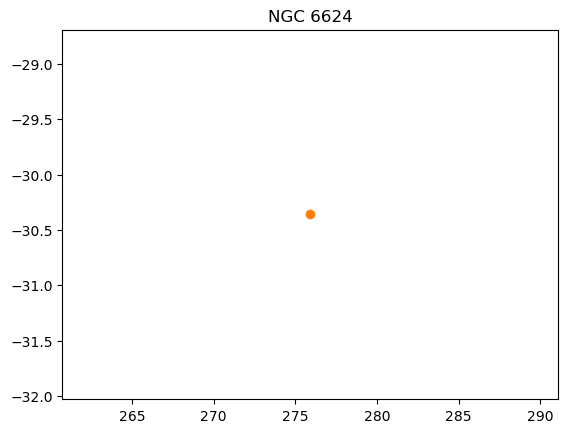

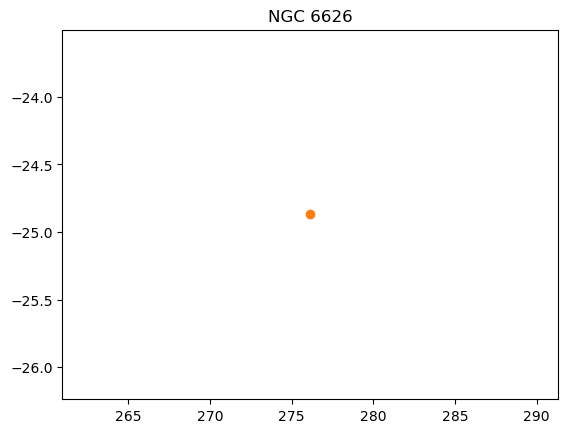

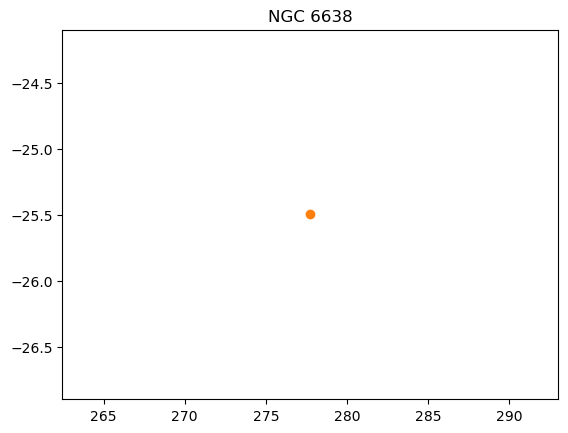

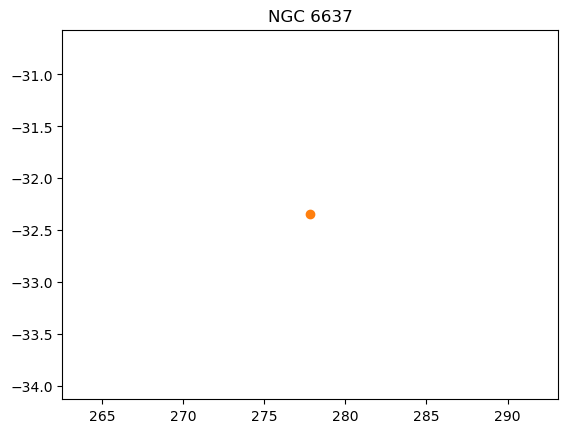

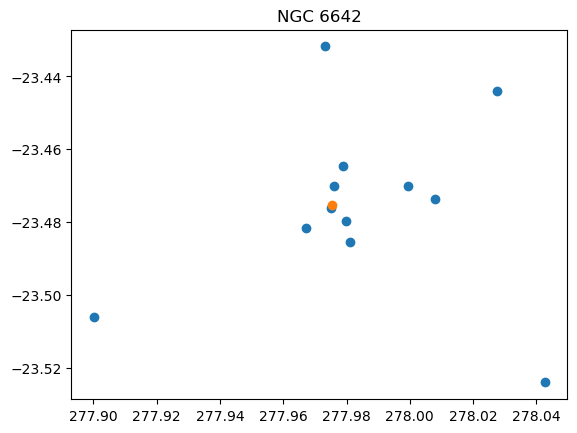

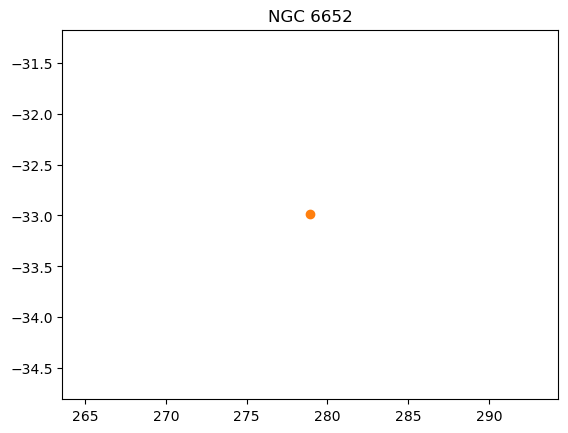

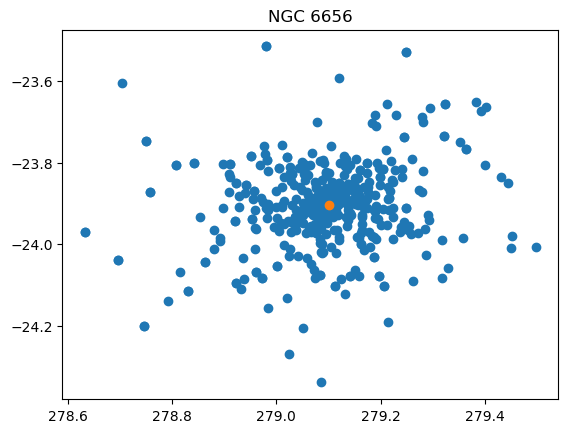

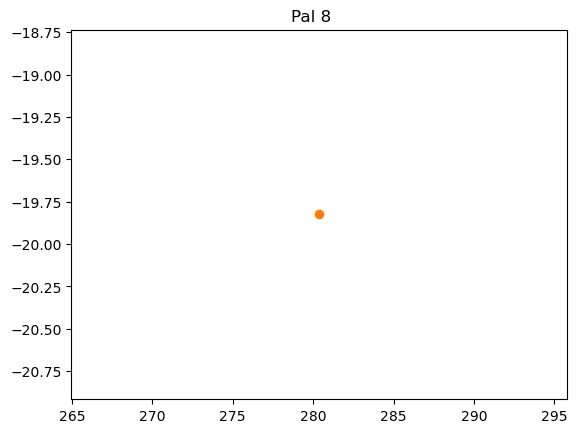

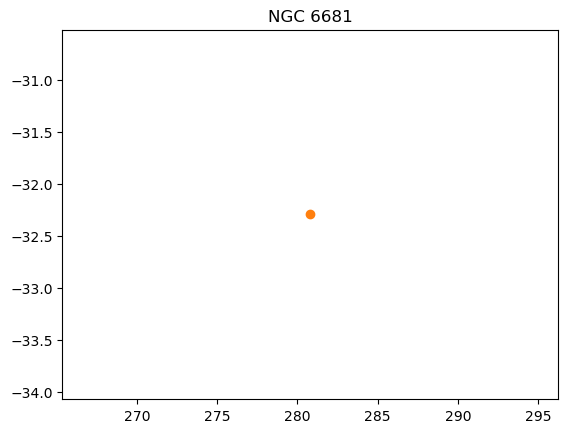

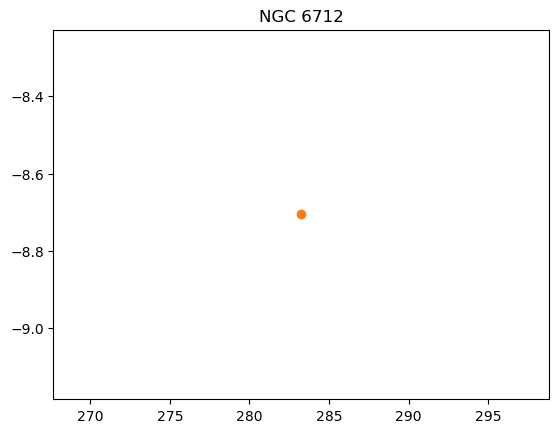

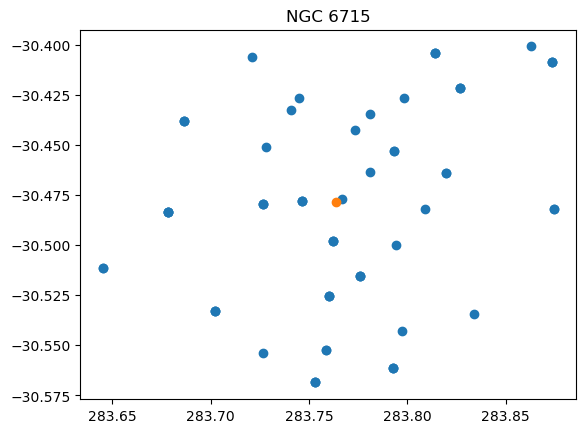

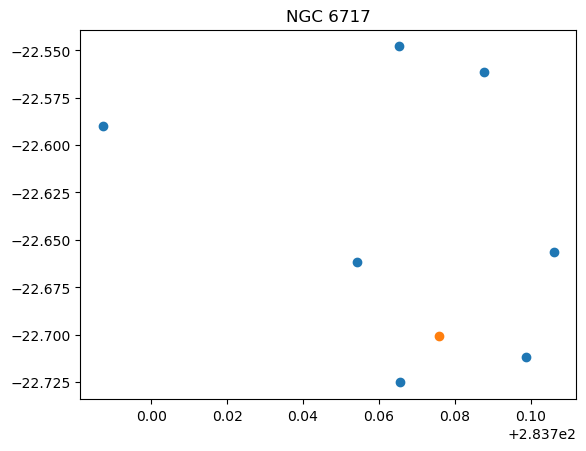

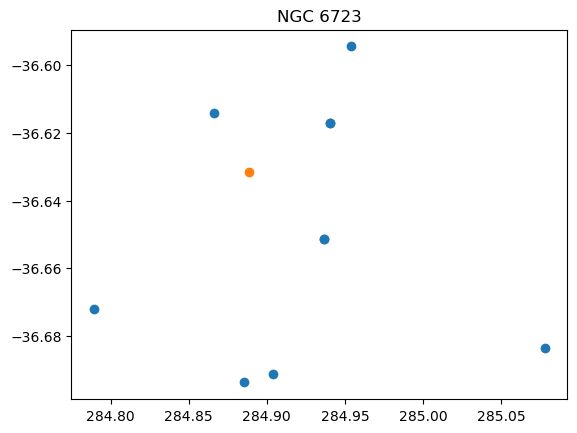

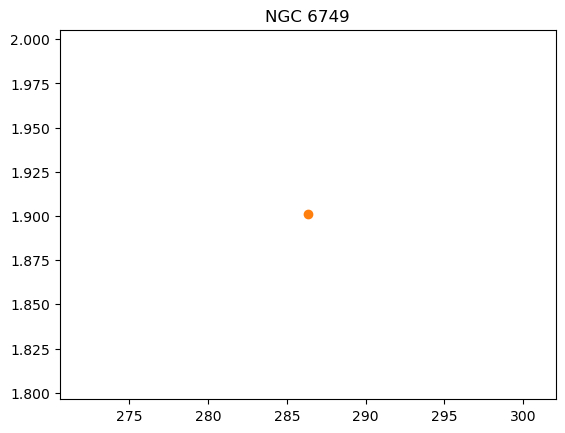

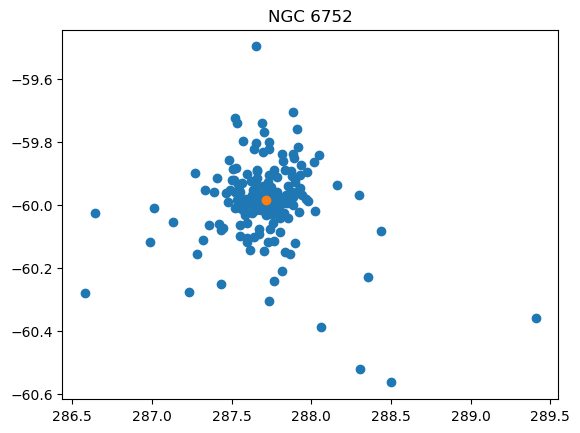

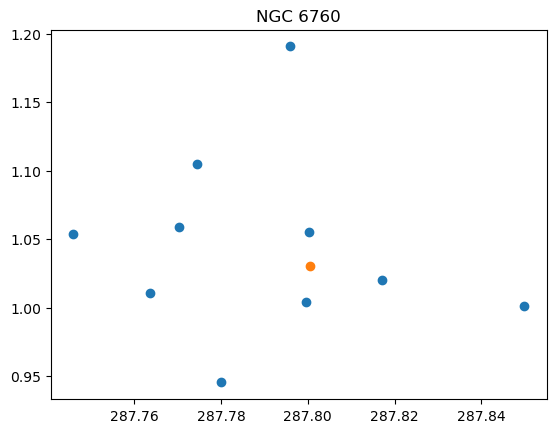

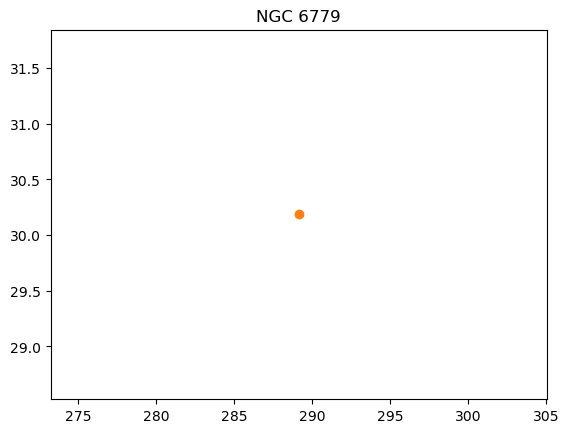

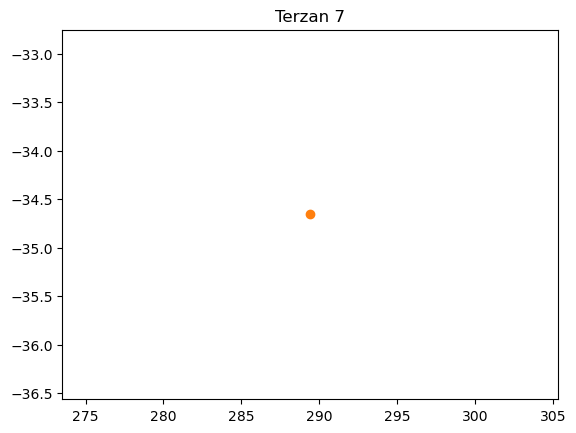

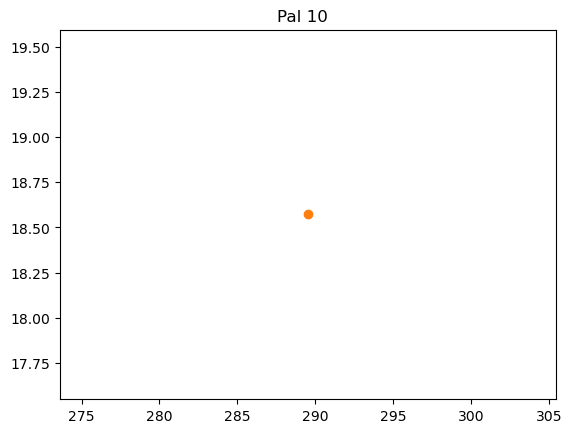

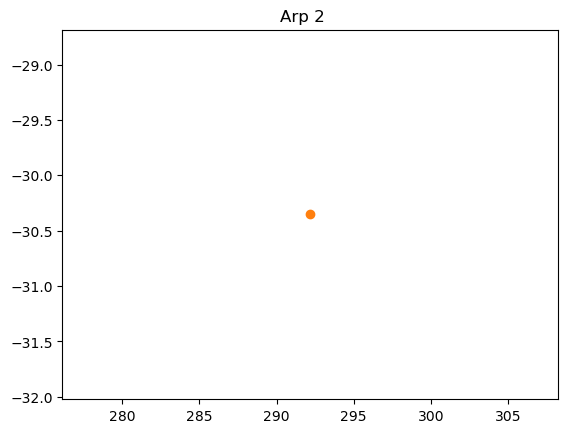

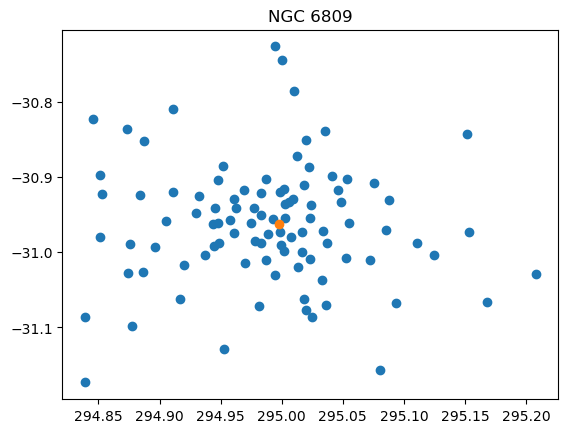

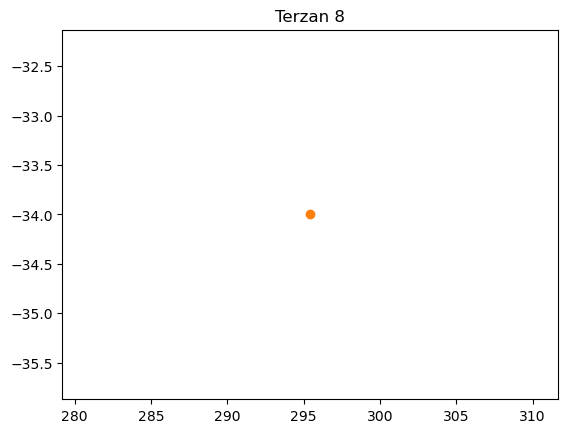

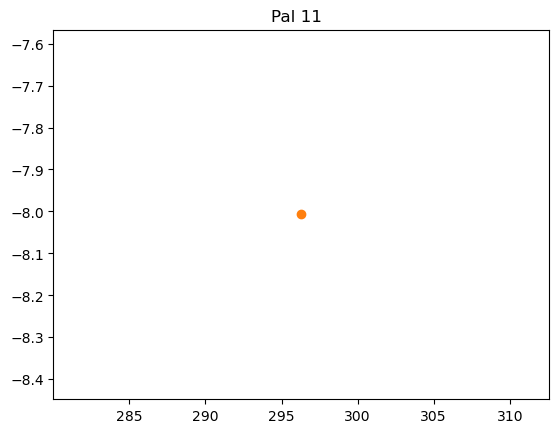

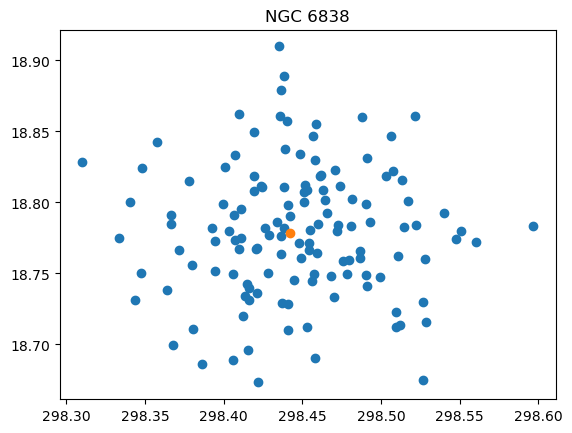

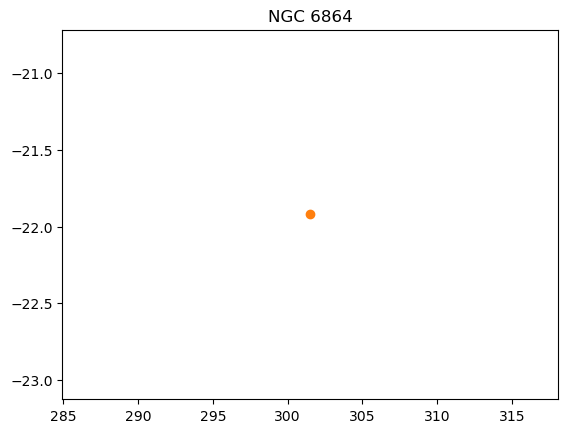

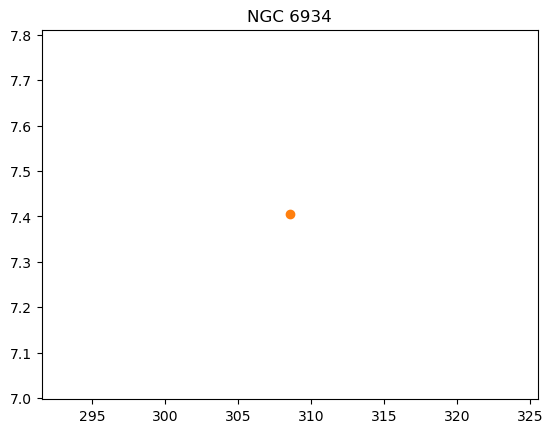

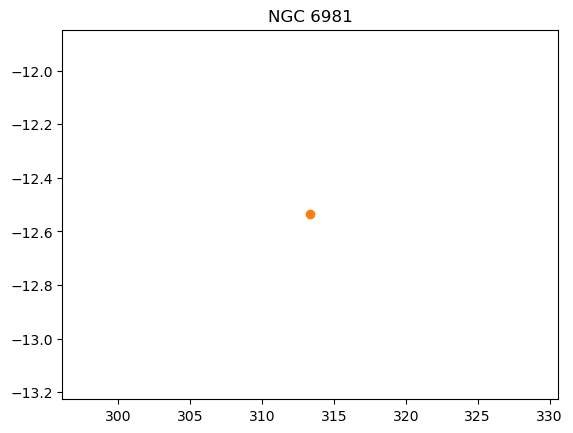

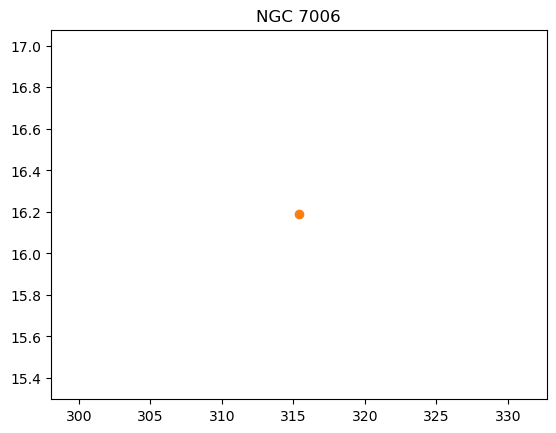

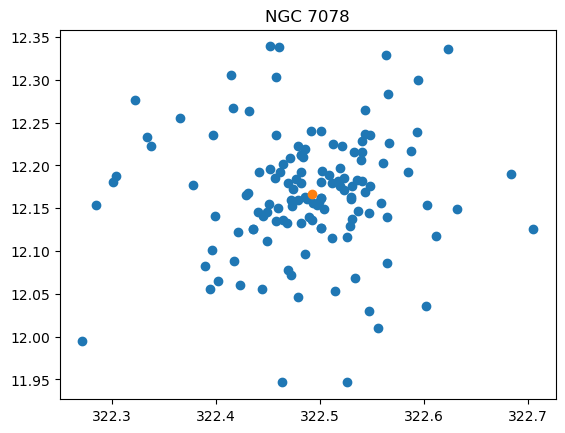

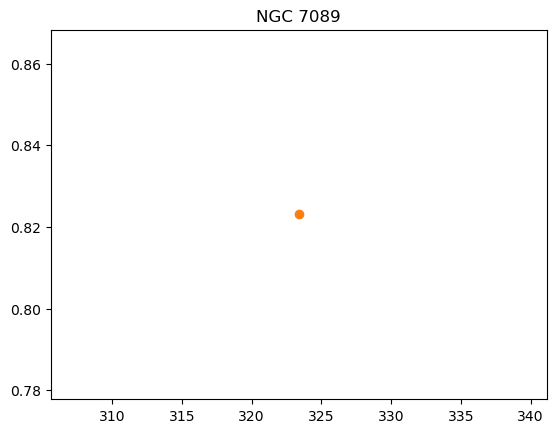

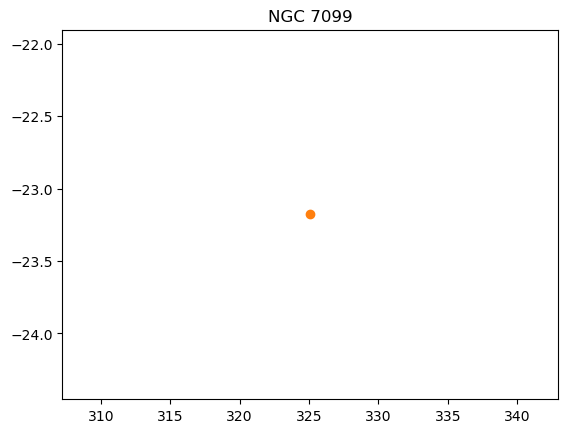

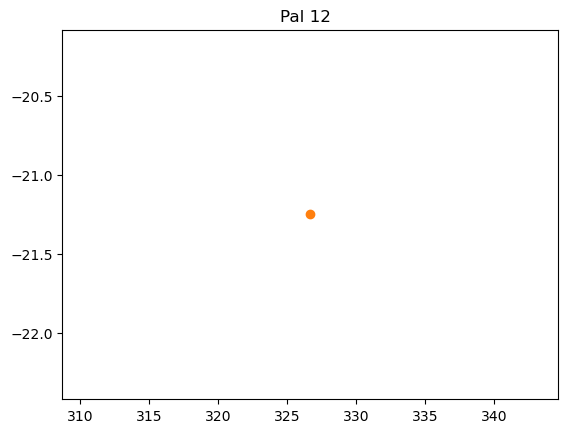

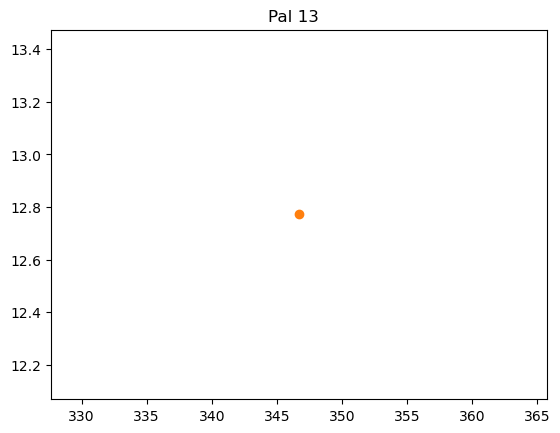

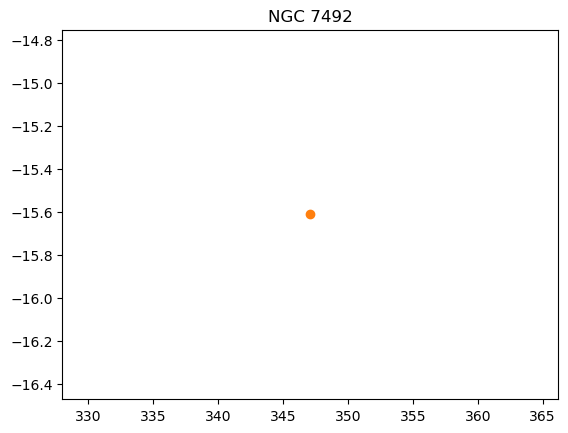

In [221]:
for i in range(len(cluster_stars)):
    plt.scatter(cluster_stars[i]["RA"], cluster_stars[i]["DEC"])
    plt.scatter(glob_clust[i]["RA"]*15, glob_clust[i]["DEC"])
    plt.title(glob_clust[i]["ID"])
    plt.show()
    

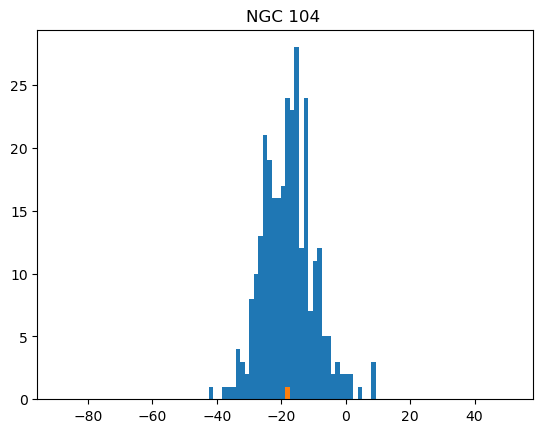

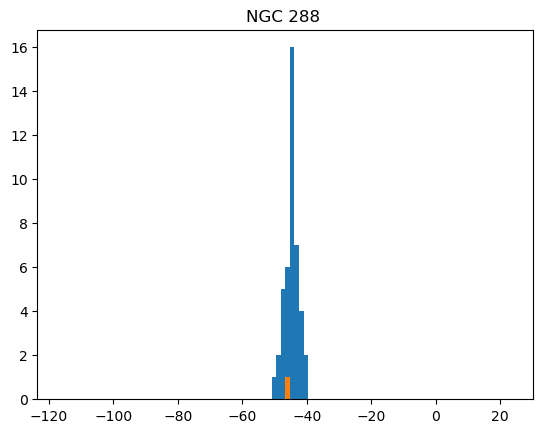

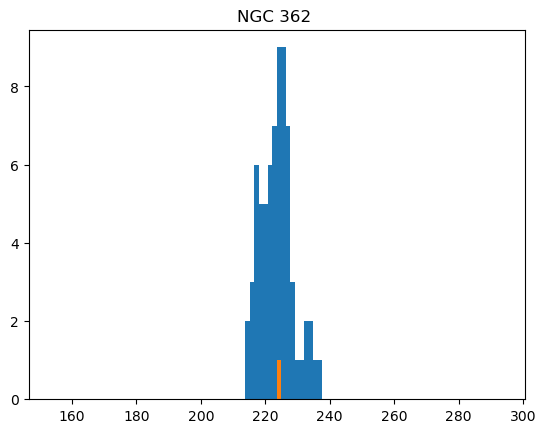

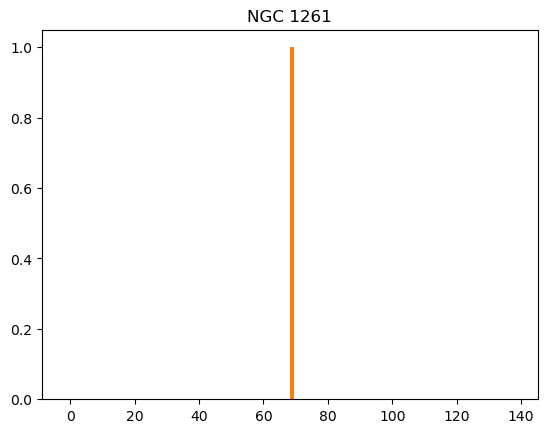

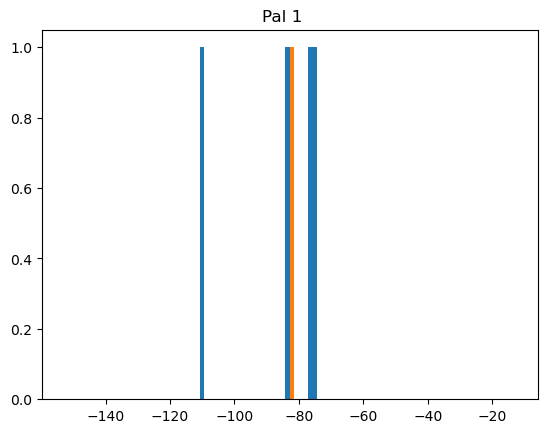

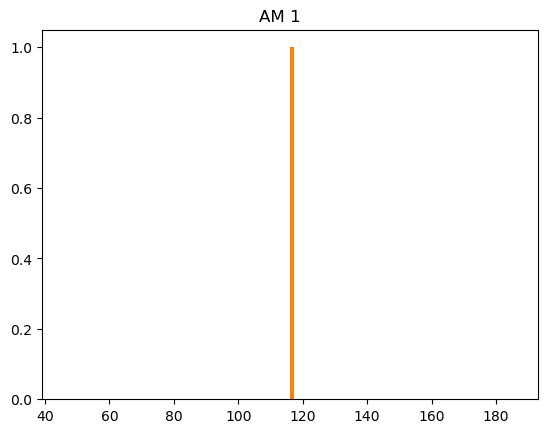

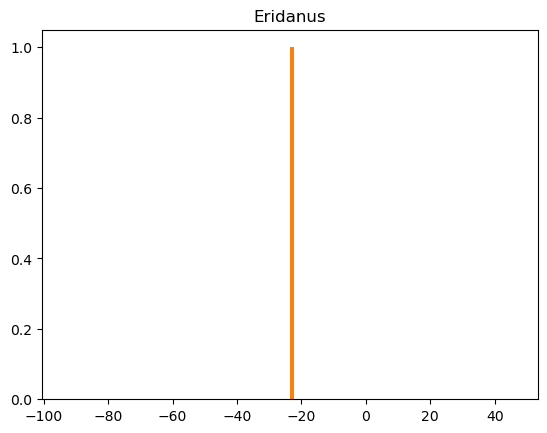

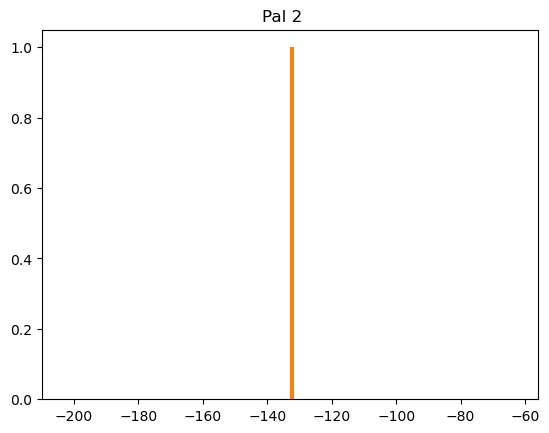

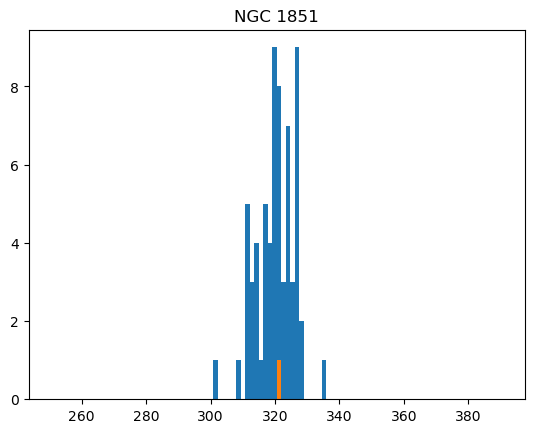

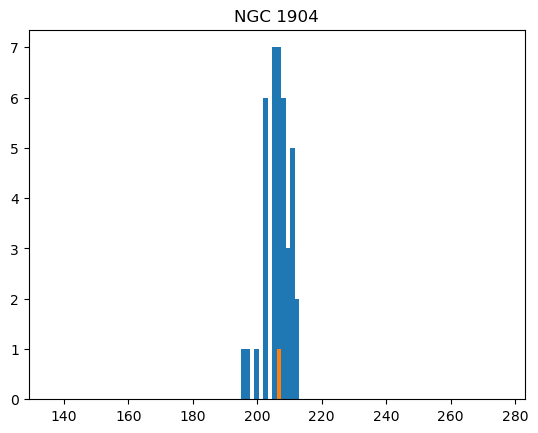

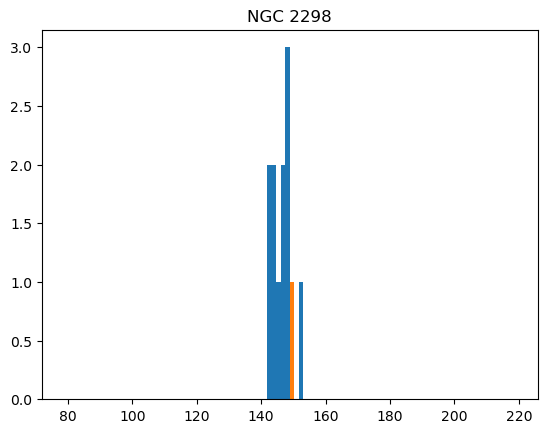

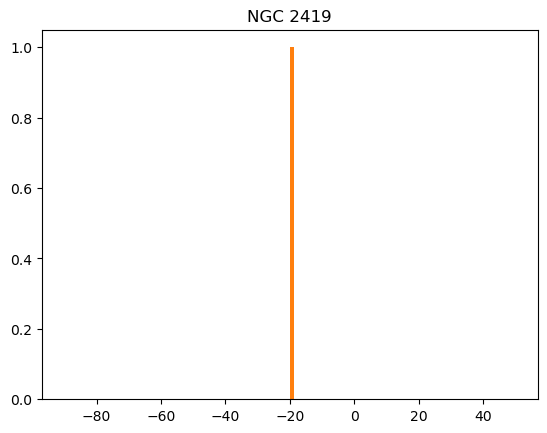

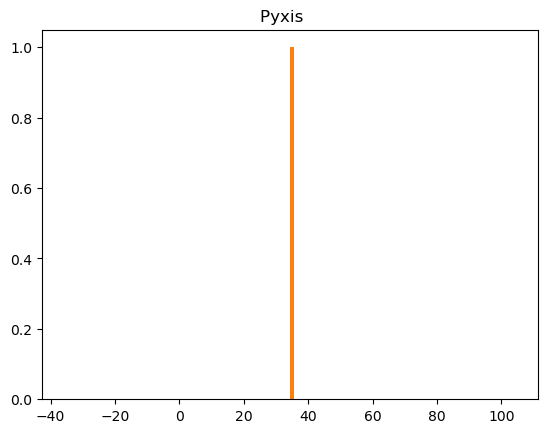

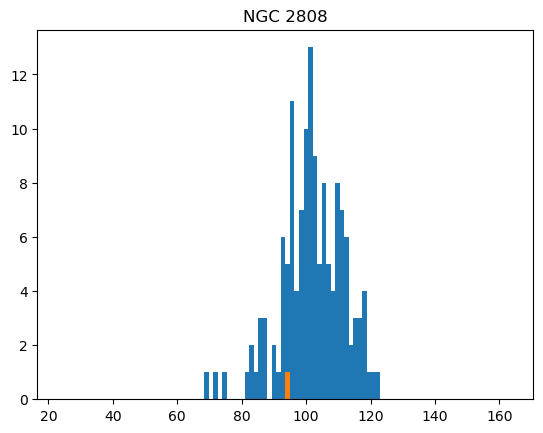

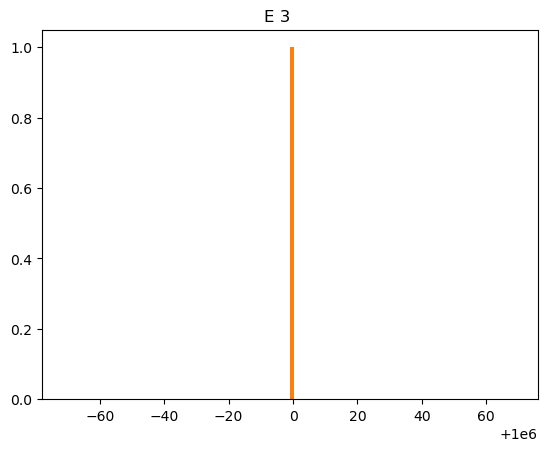

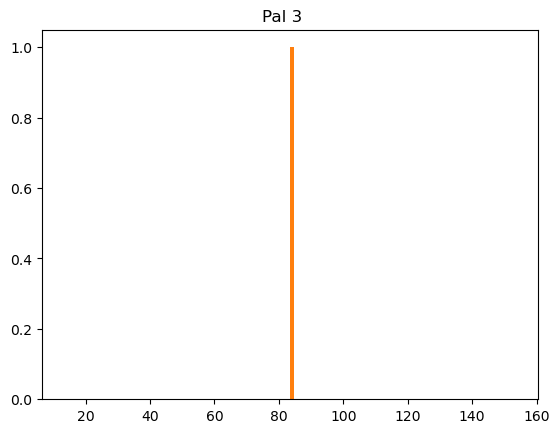

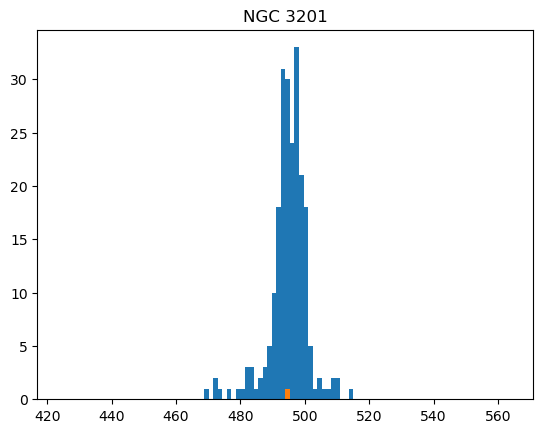

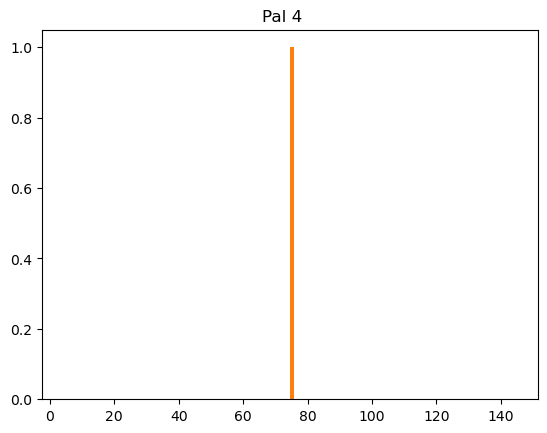

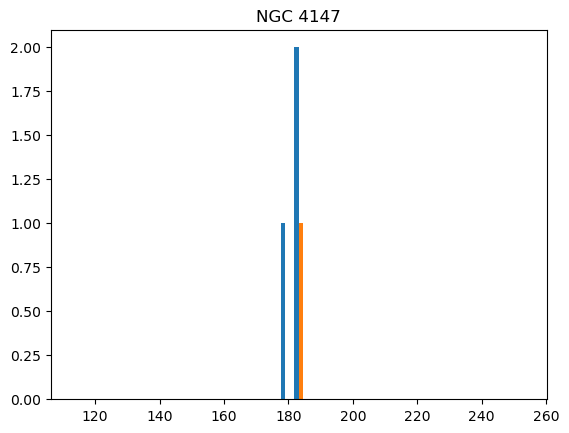

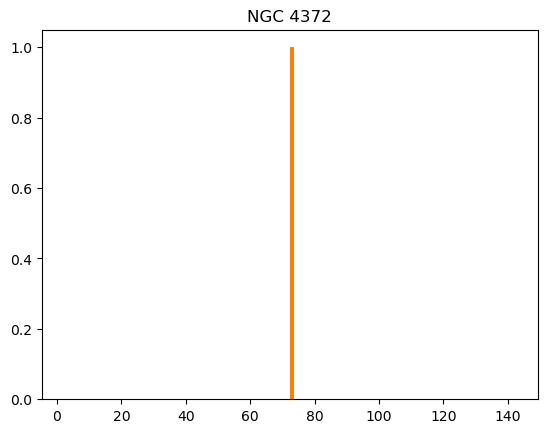

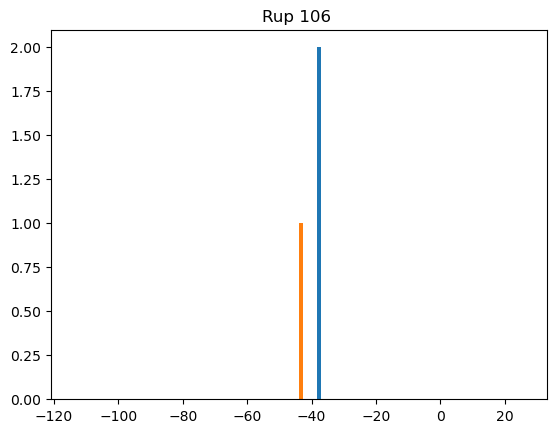

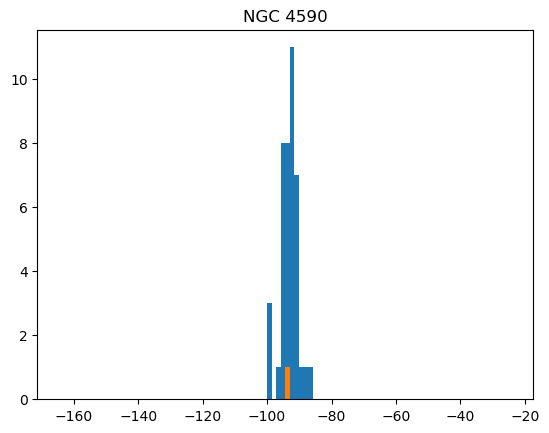

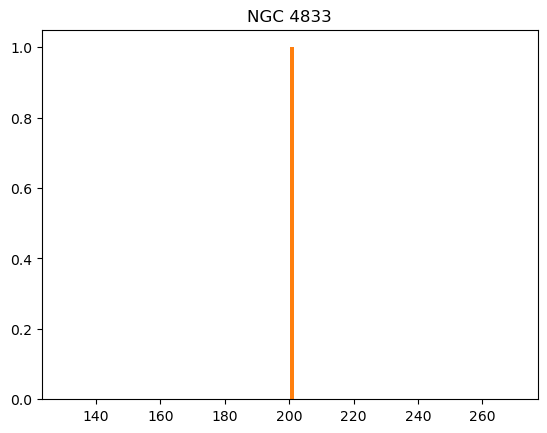

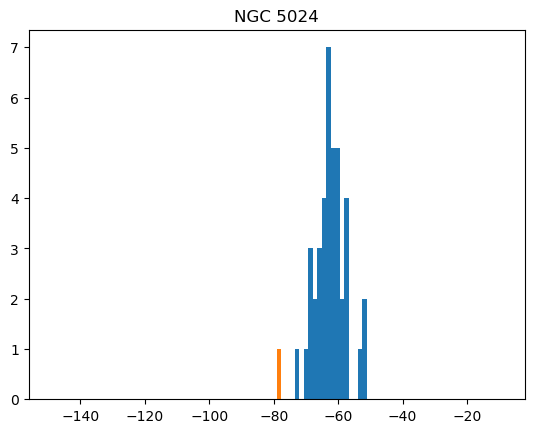

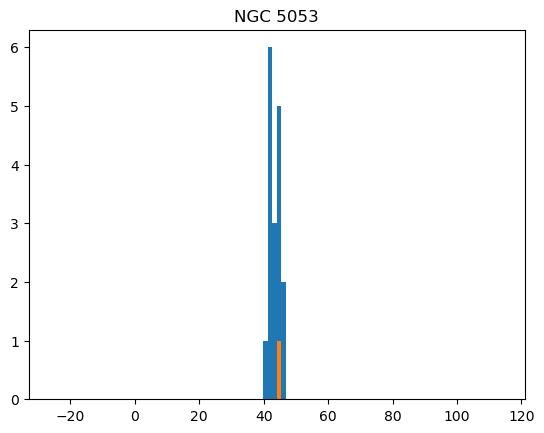

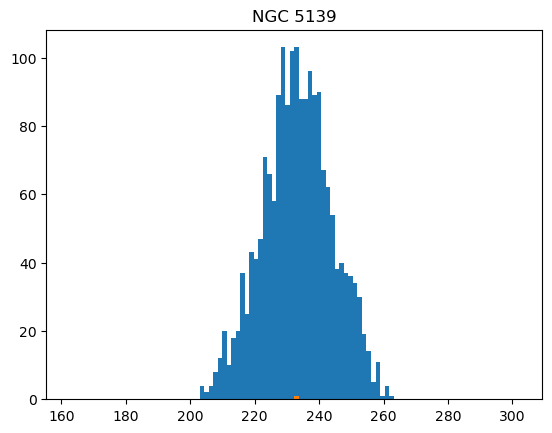

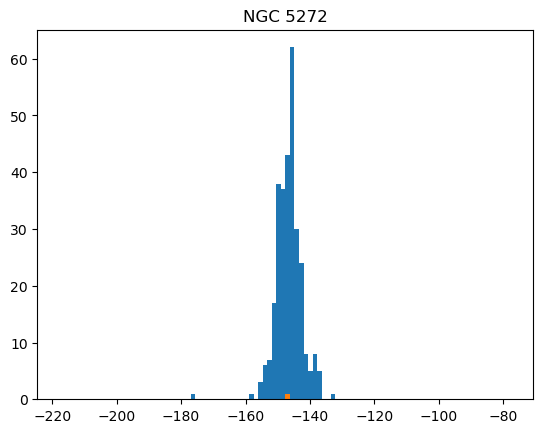

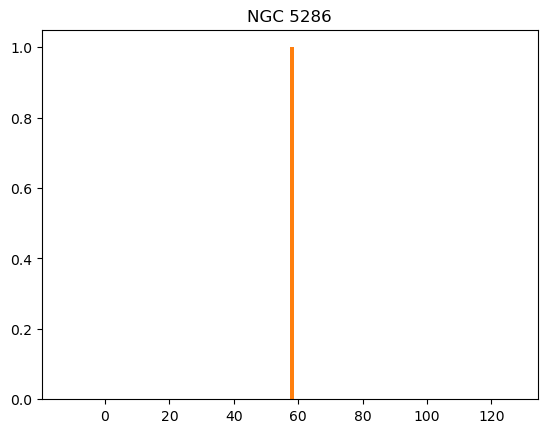

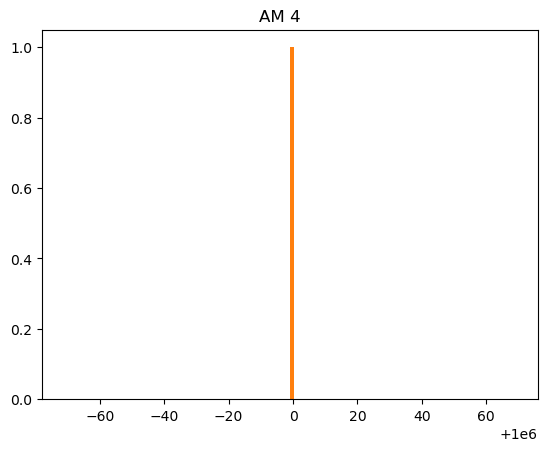

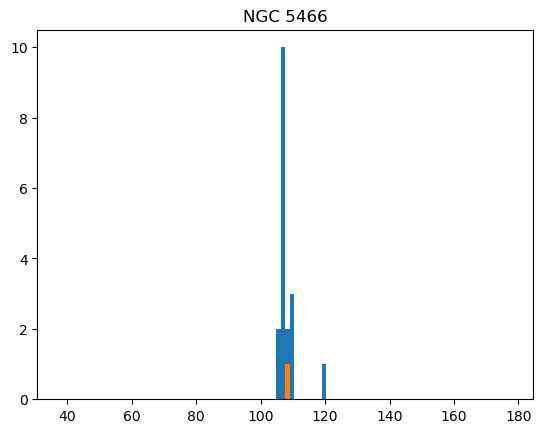

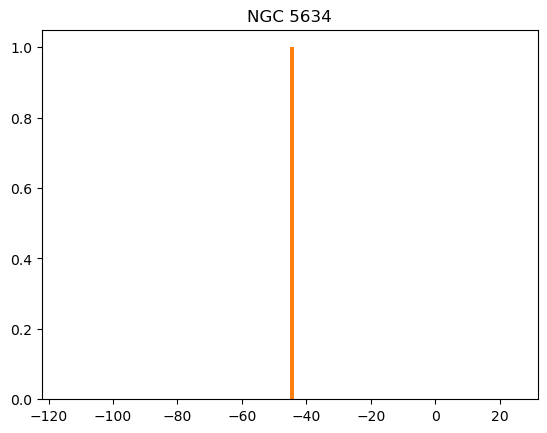

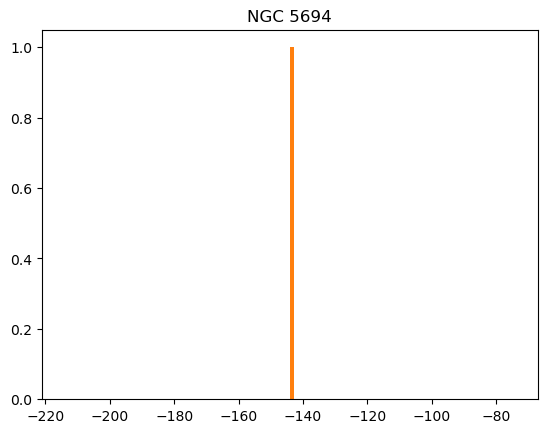

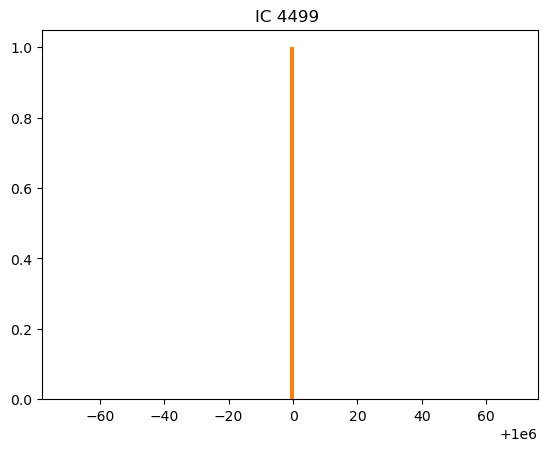

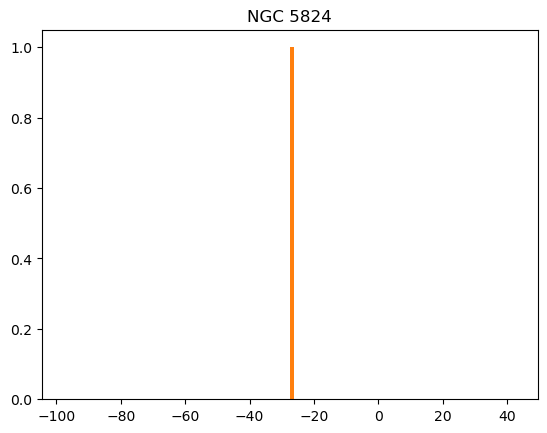

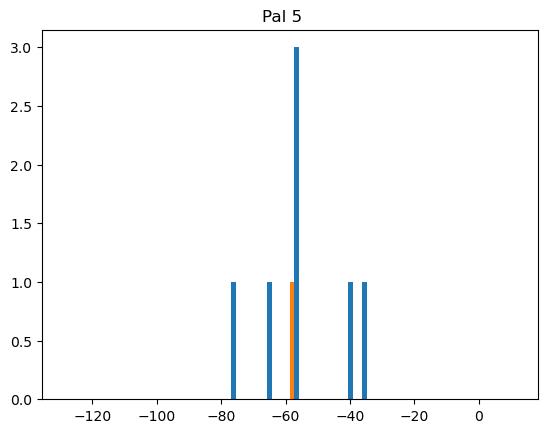

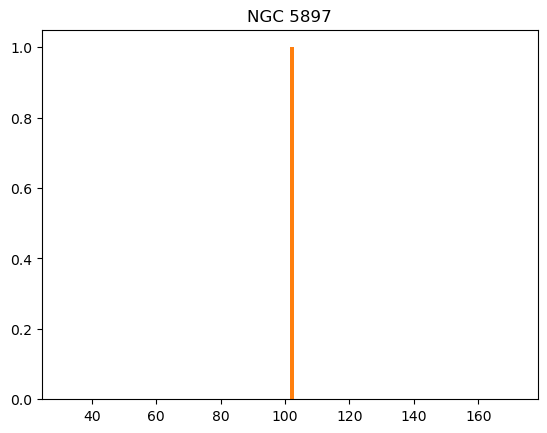

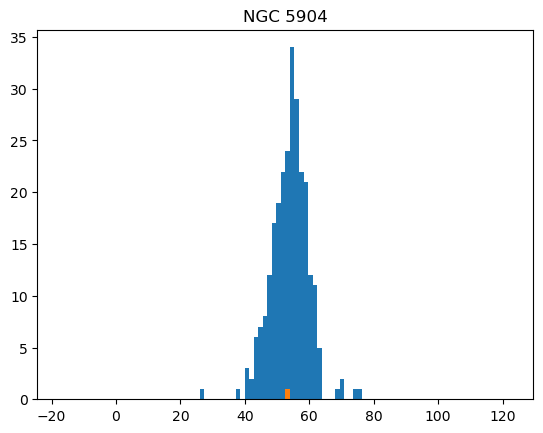

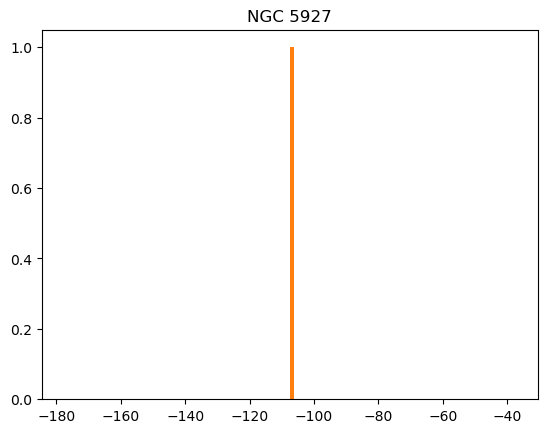

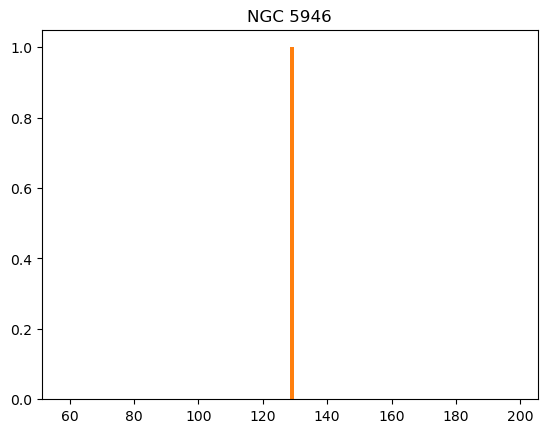

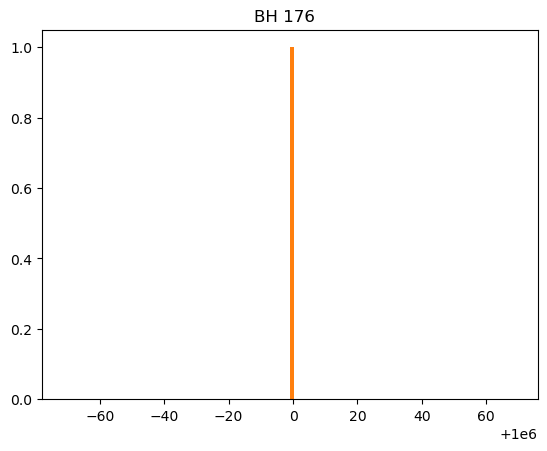

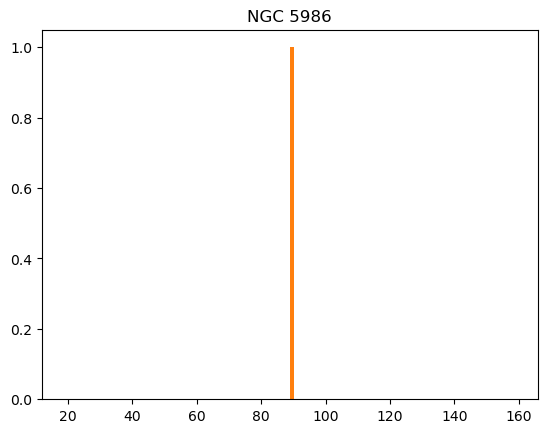

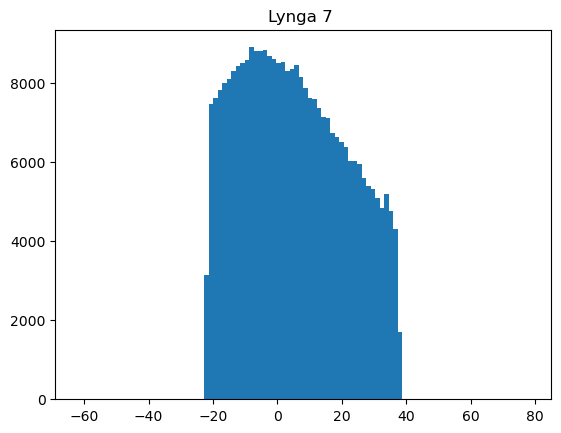

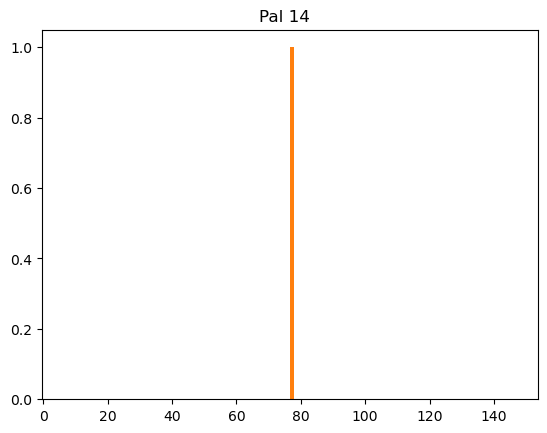

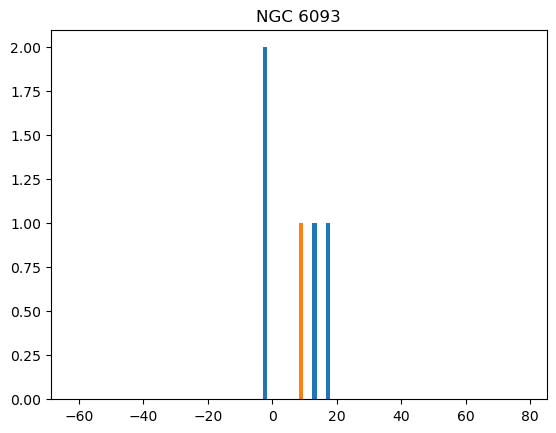

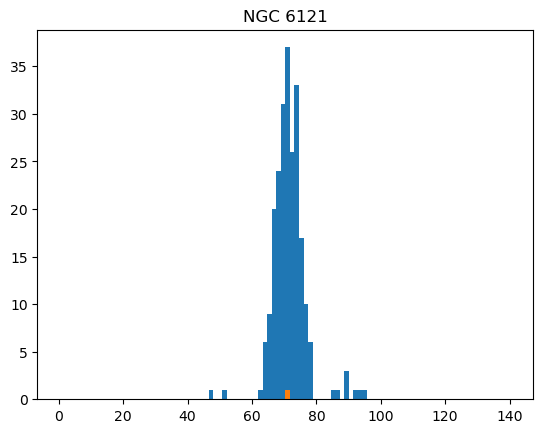

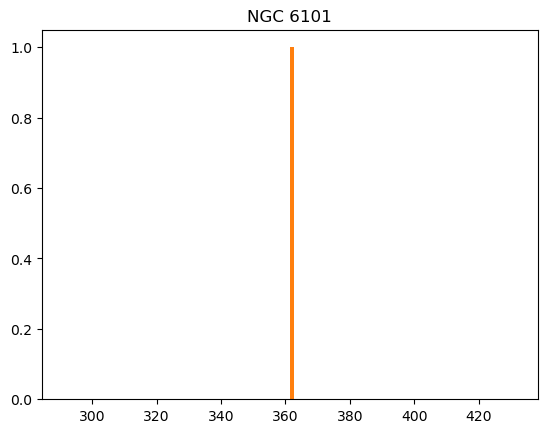

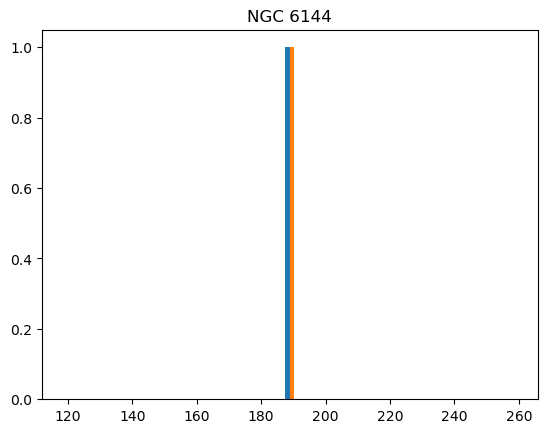

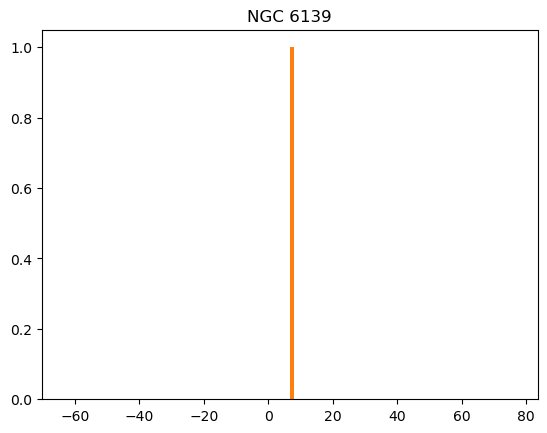

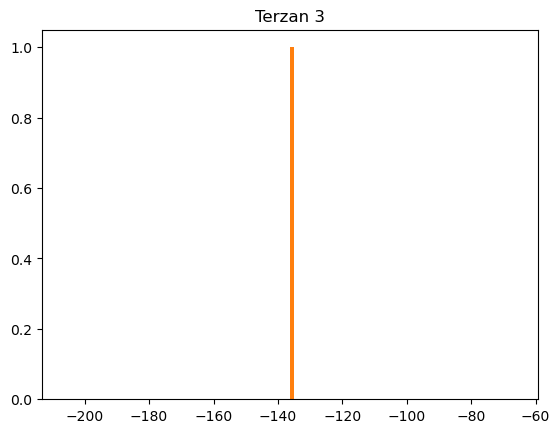

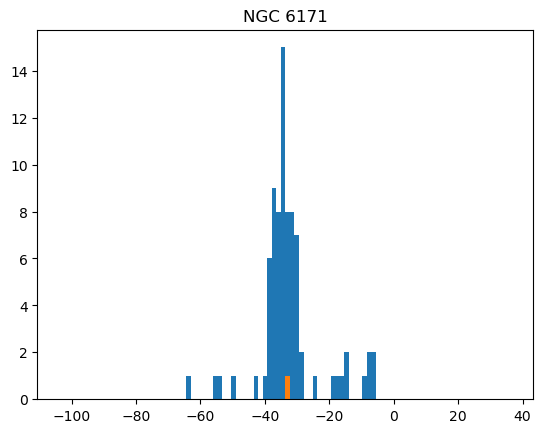

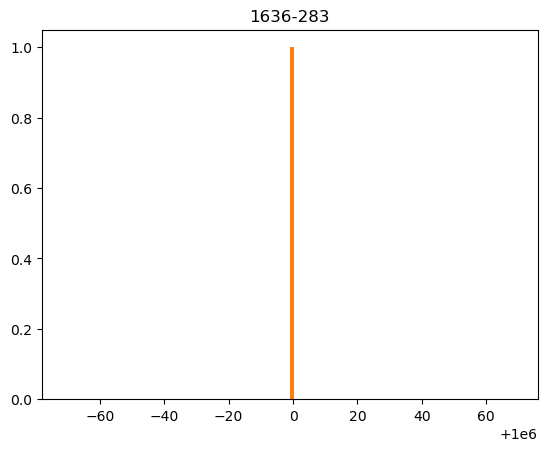

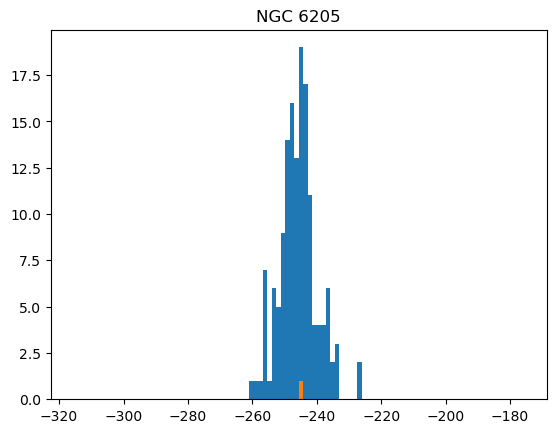

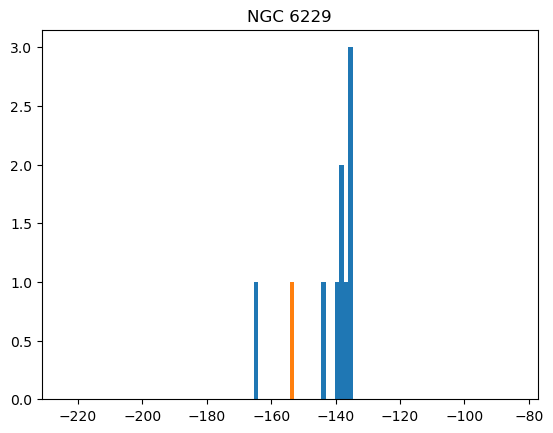

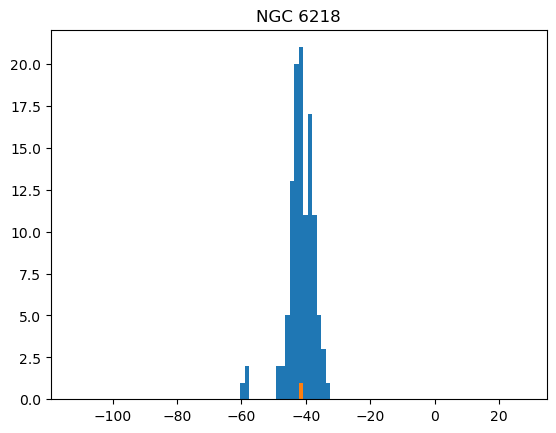

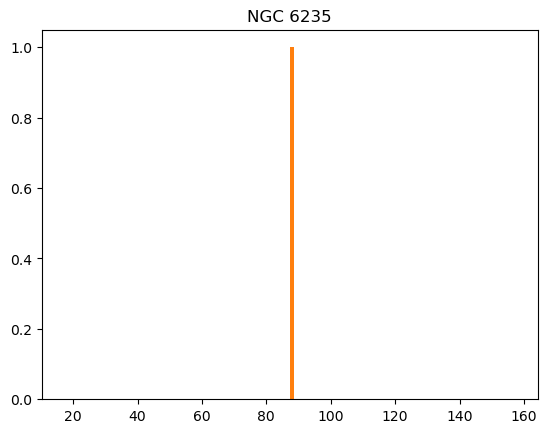

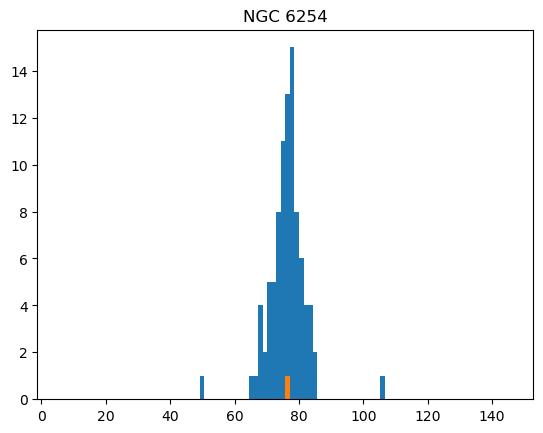

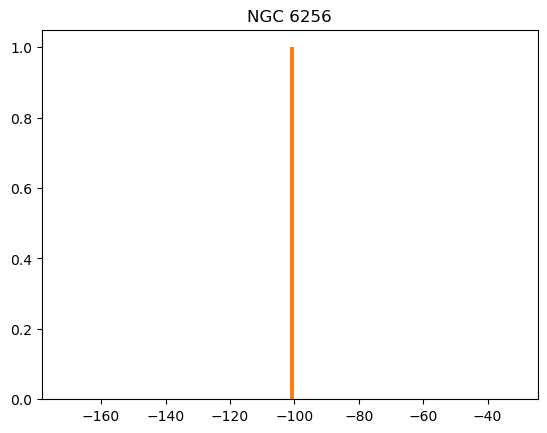

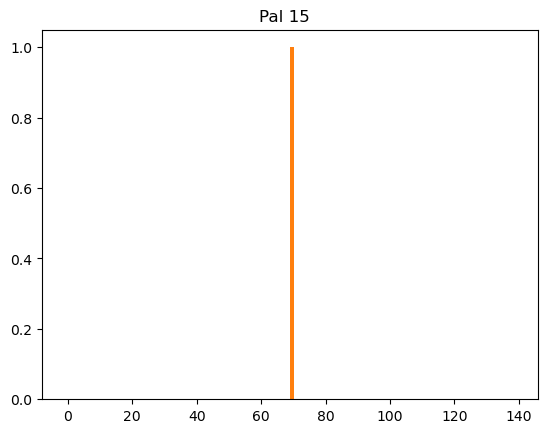

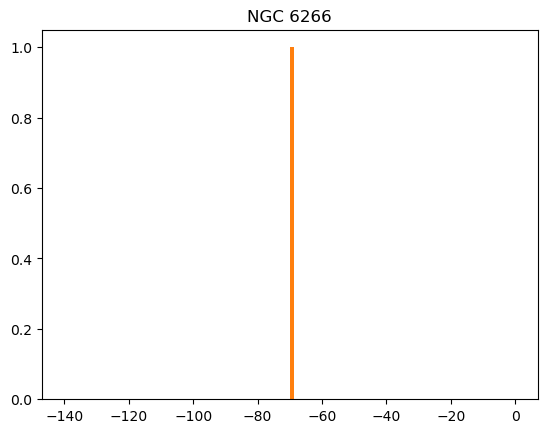

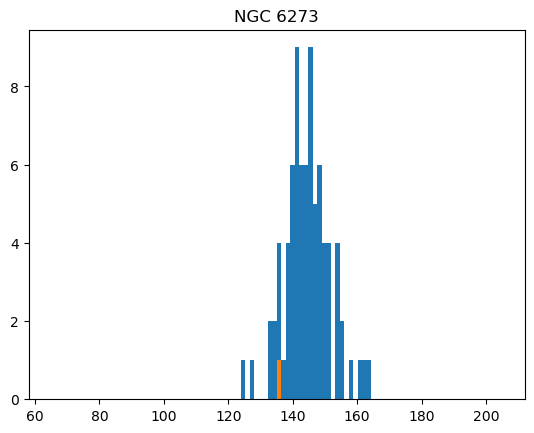

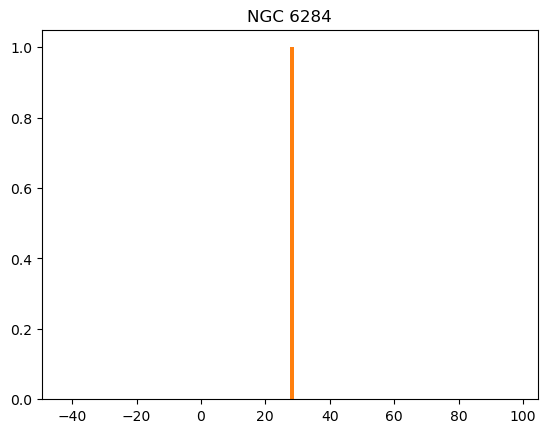

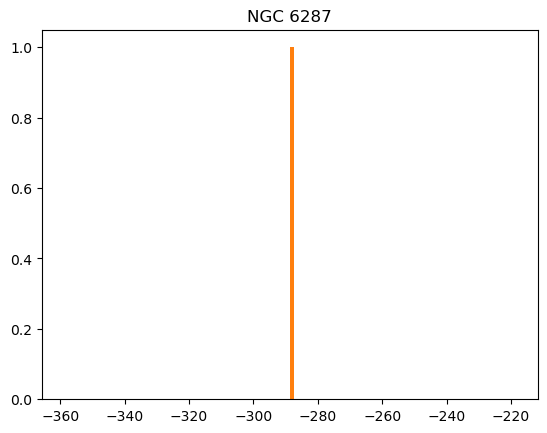

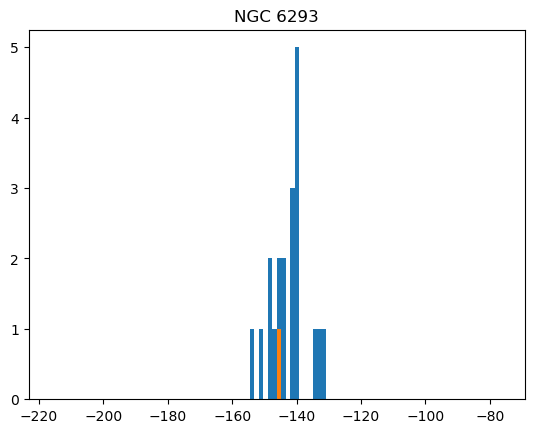

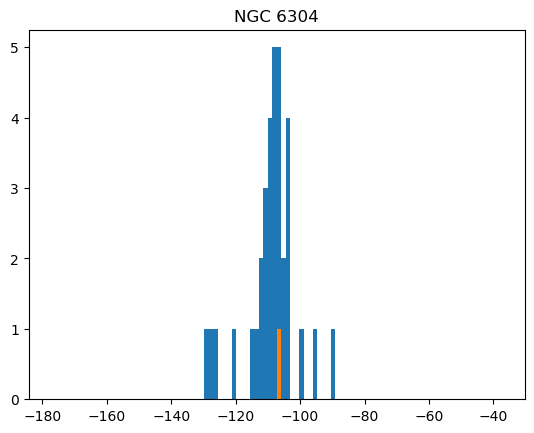

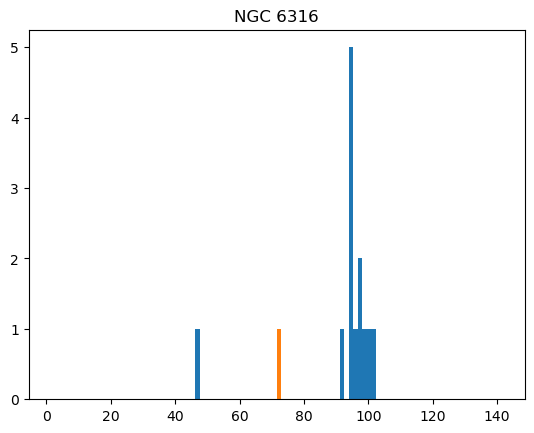

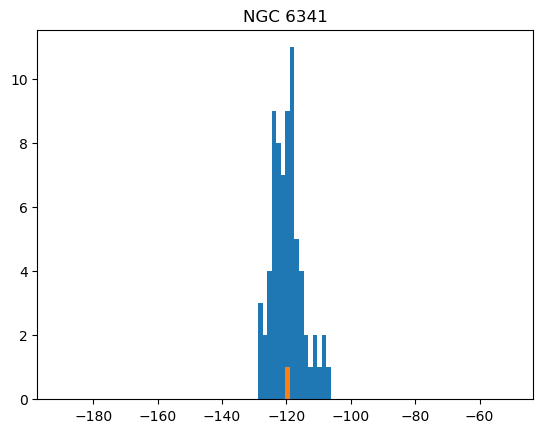

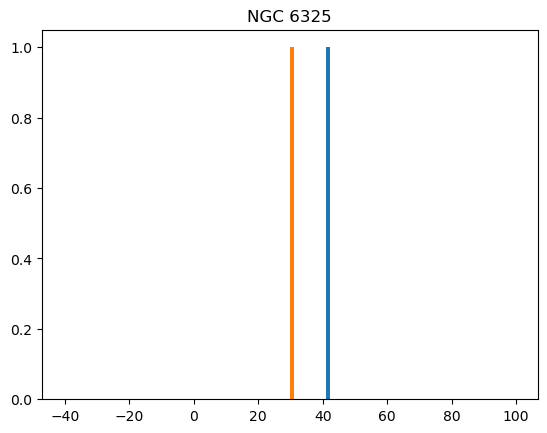

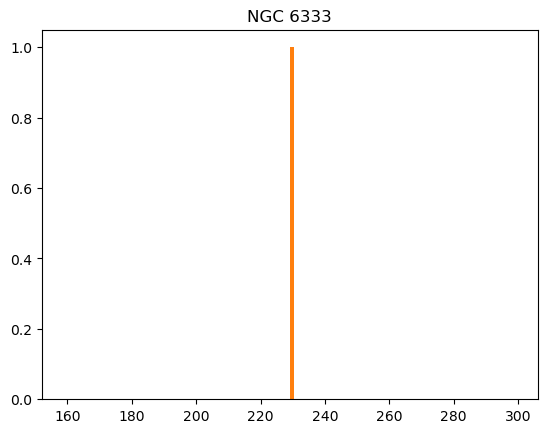

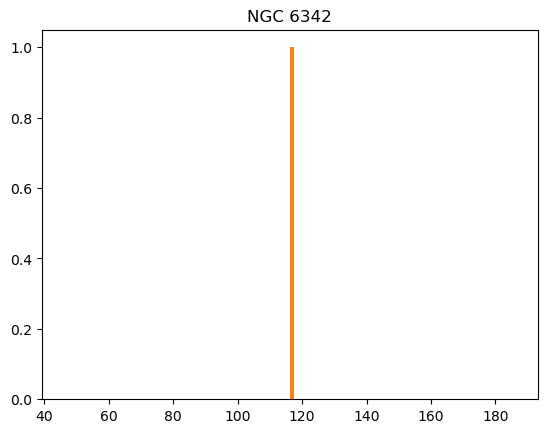

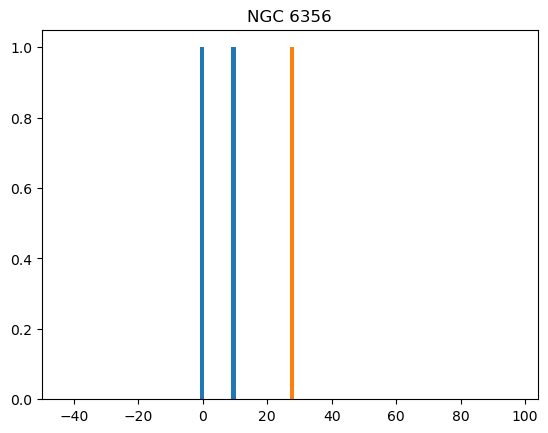

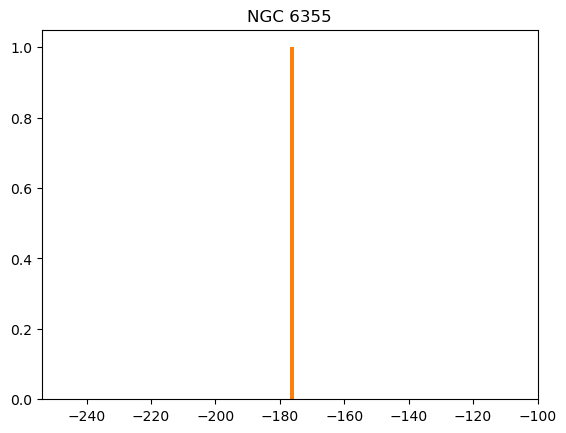

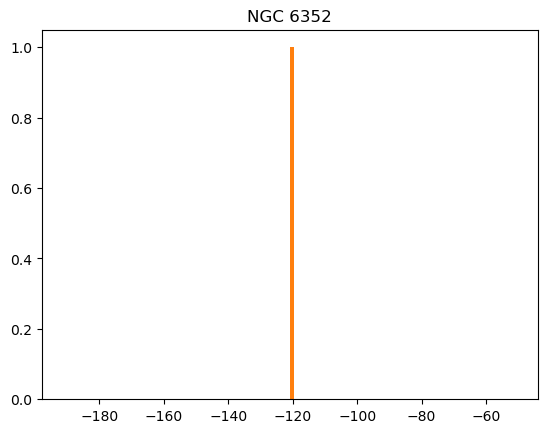

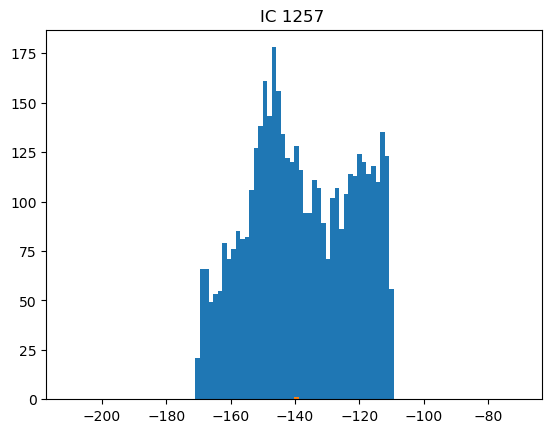

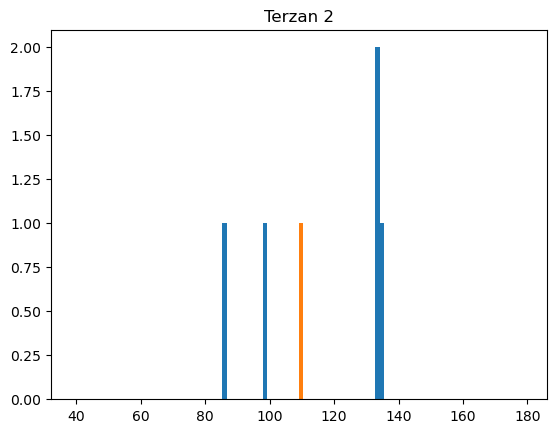

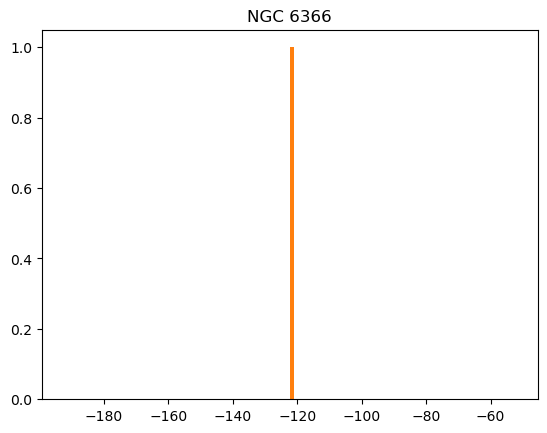

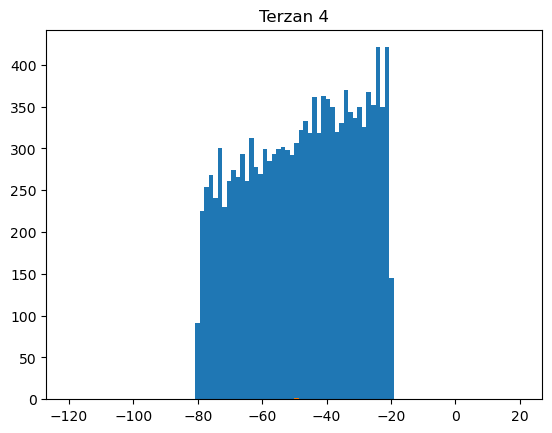

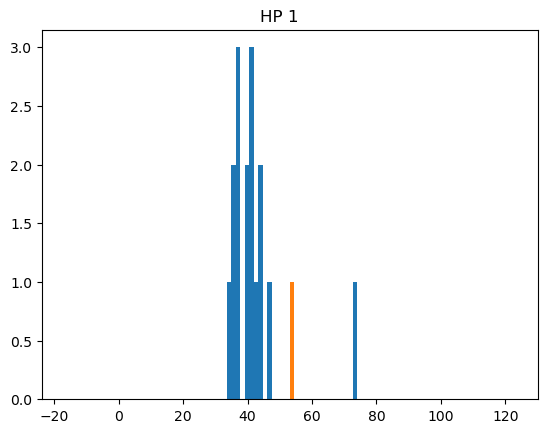

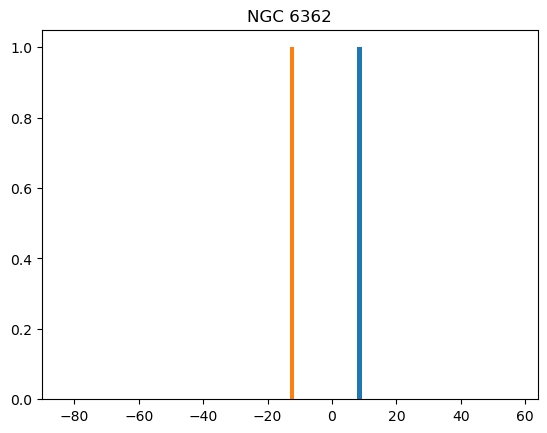

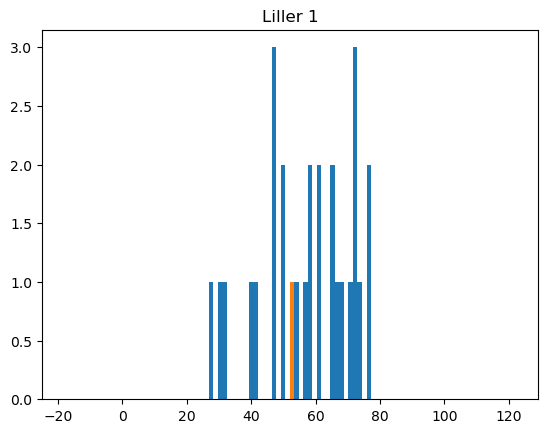

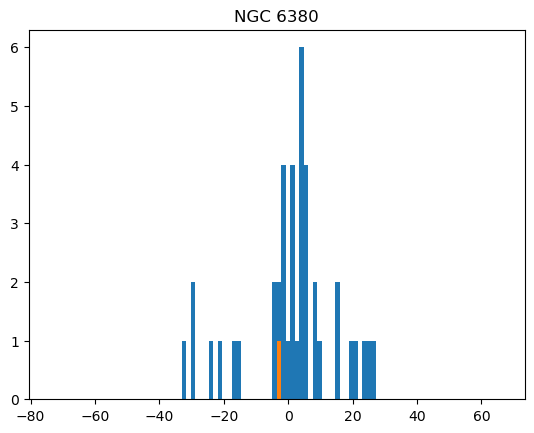

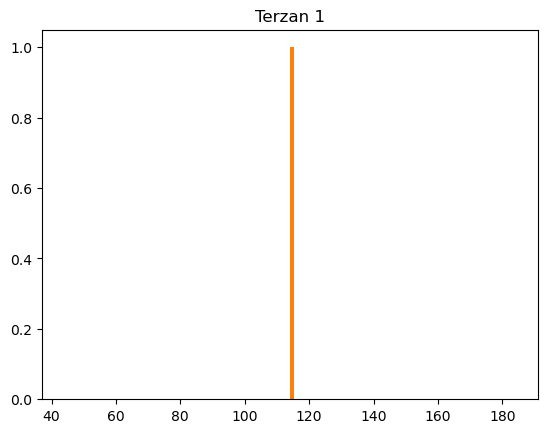

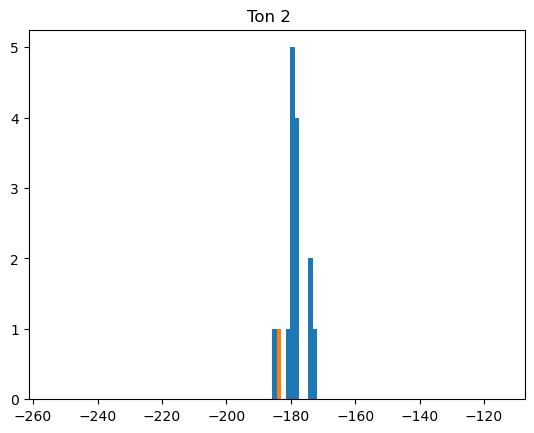

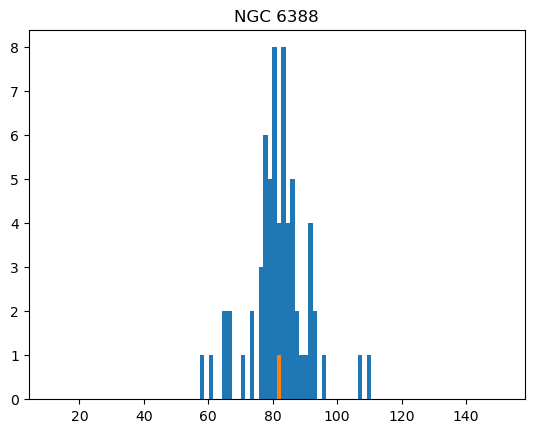

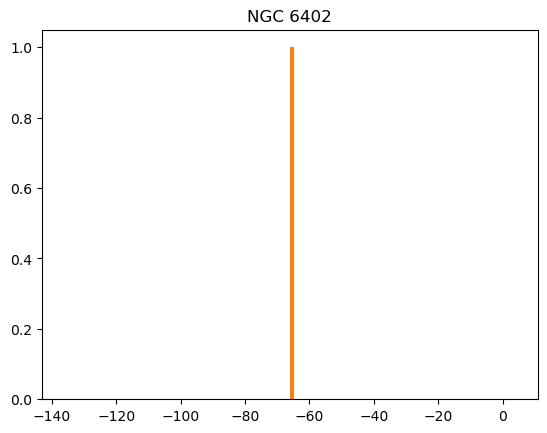

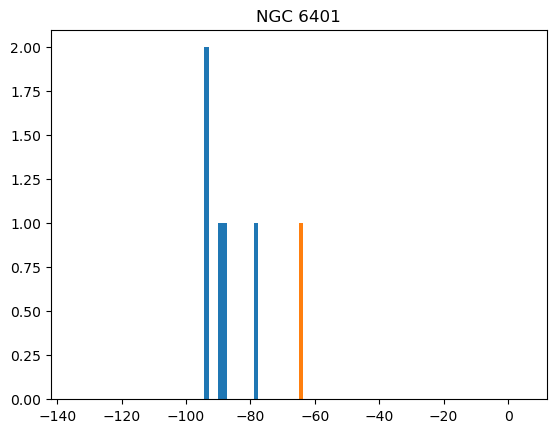

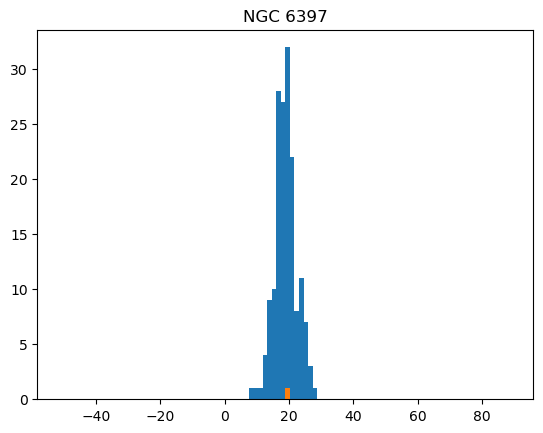

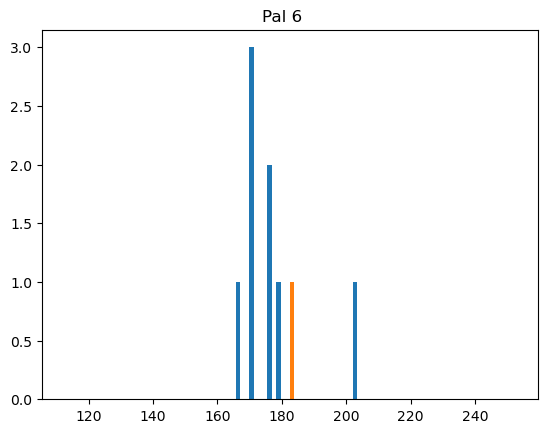

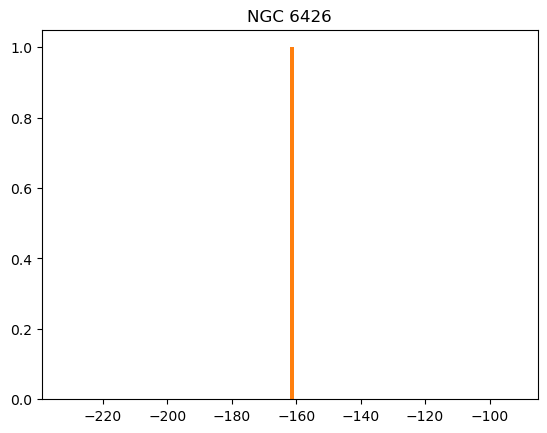

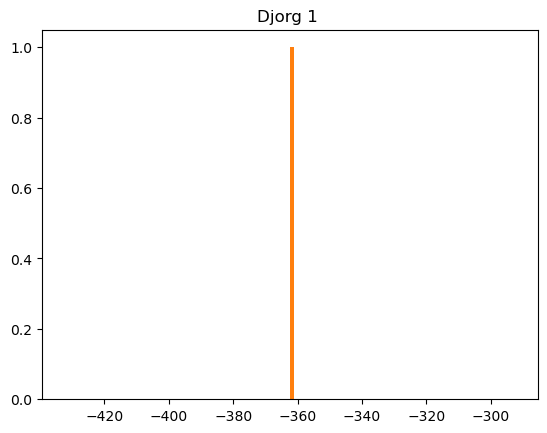

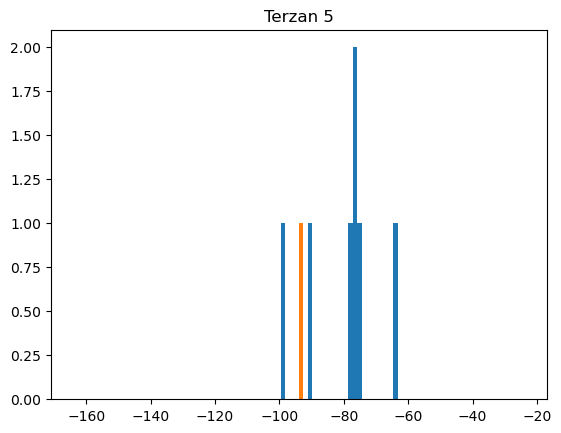

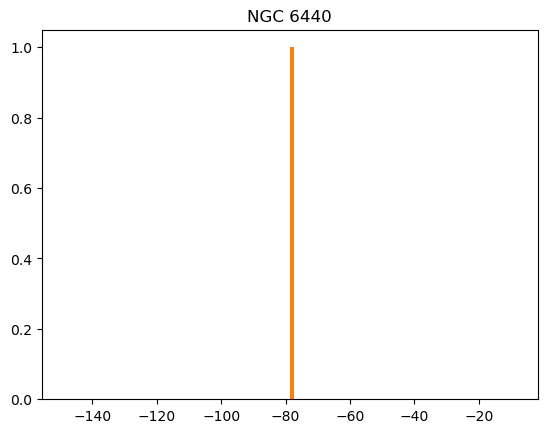

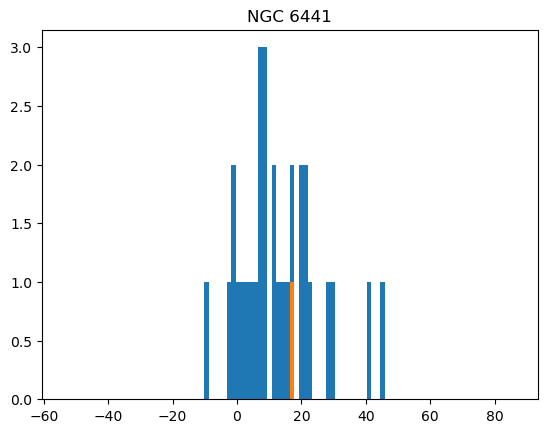

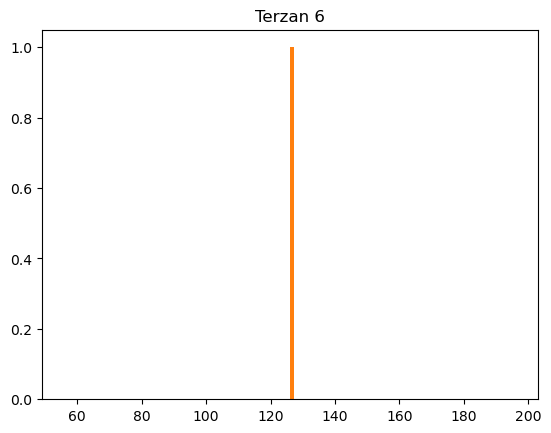

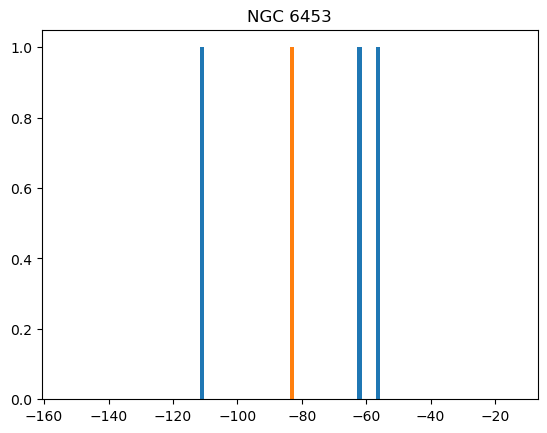

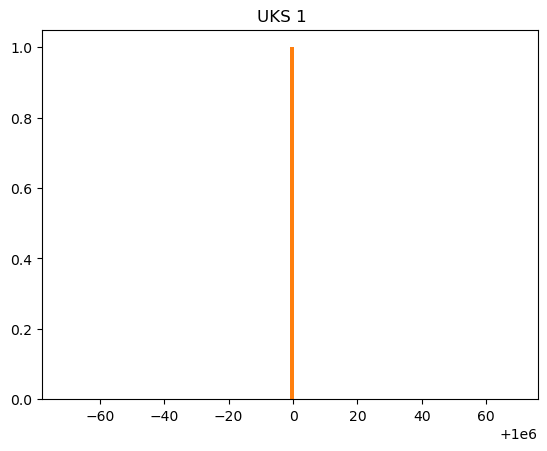

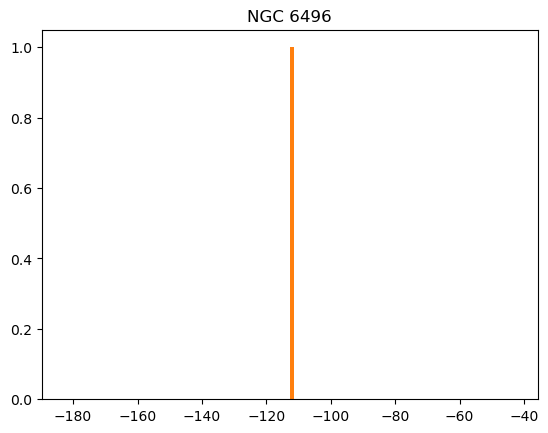

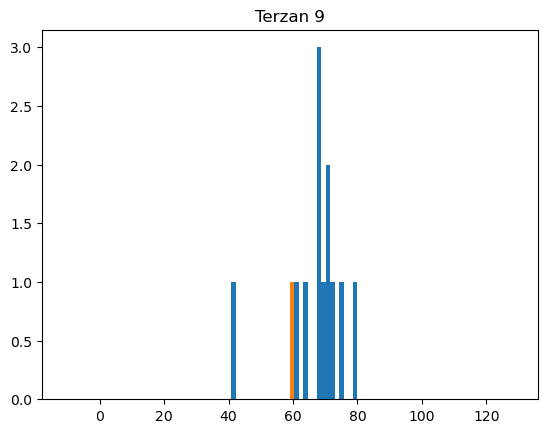

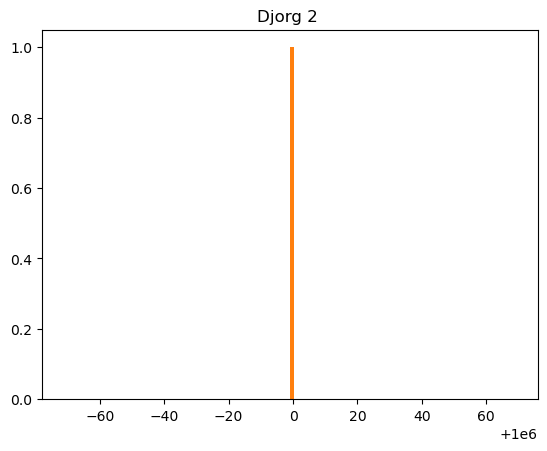

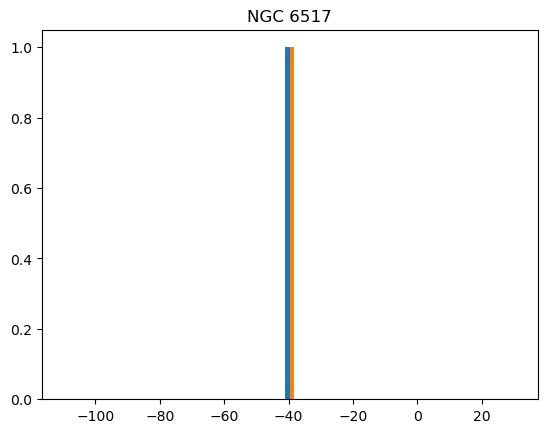

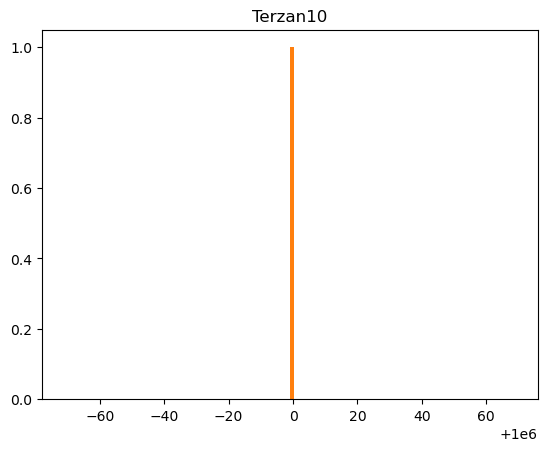

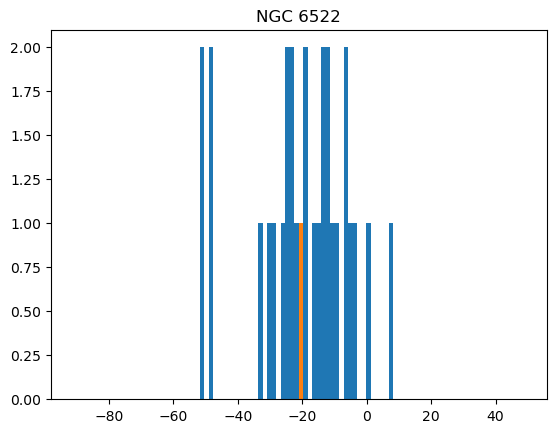

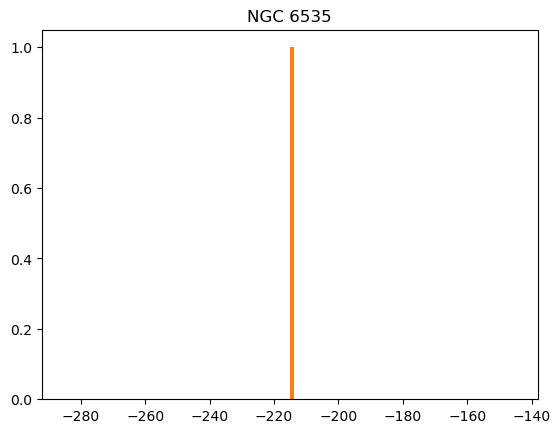

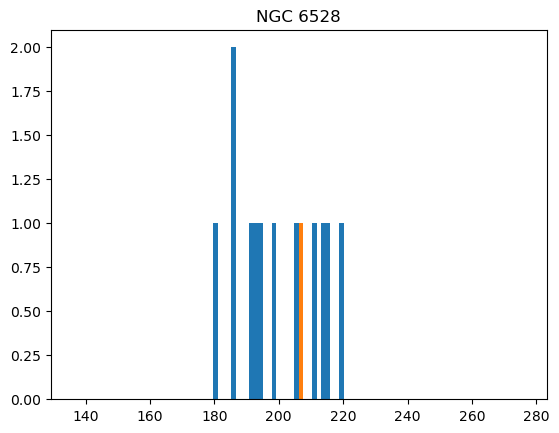

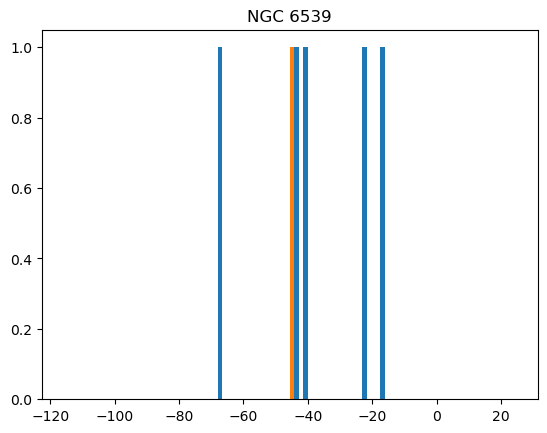

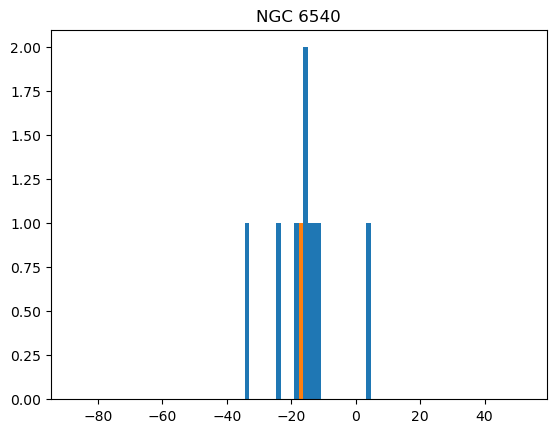

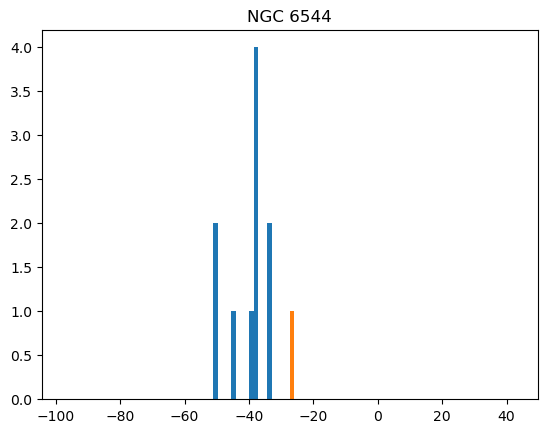

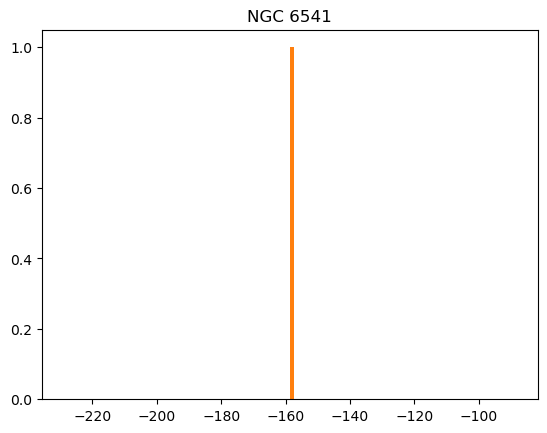

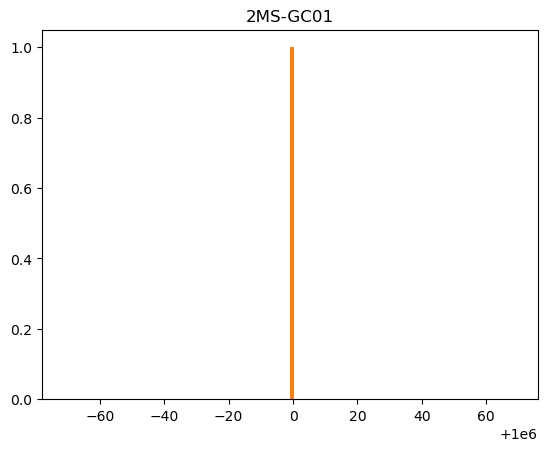

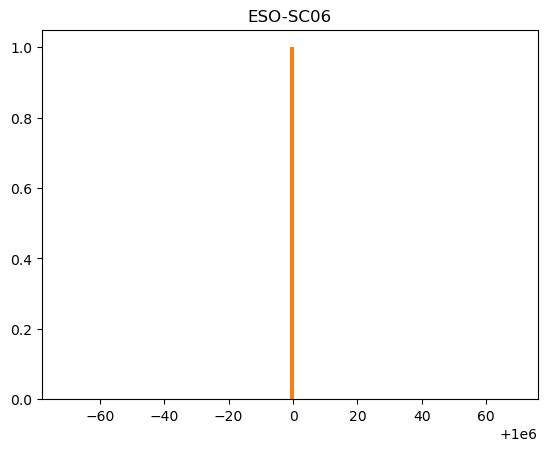

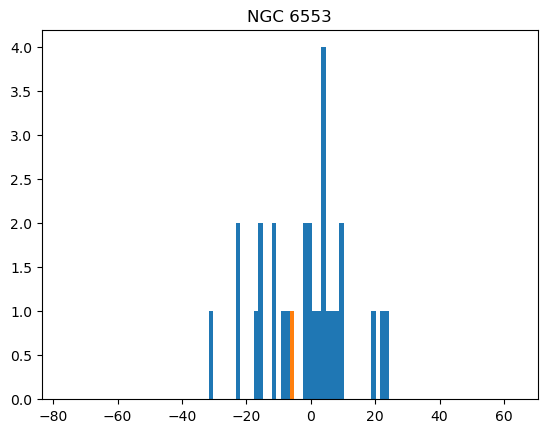

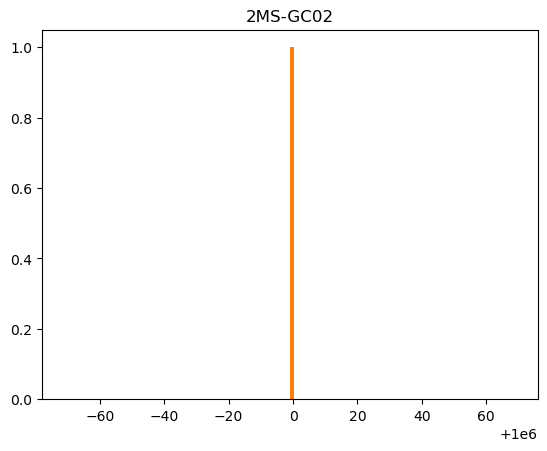

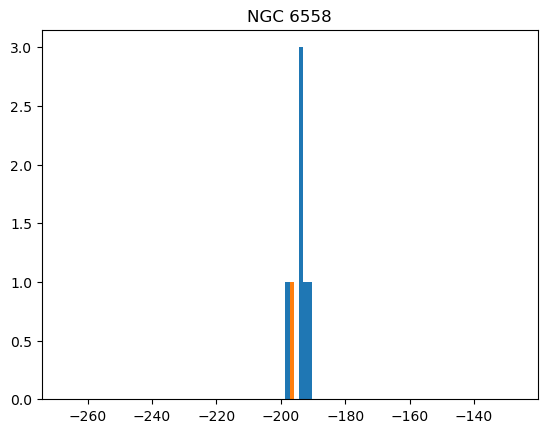

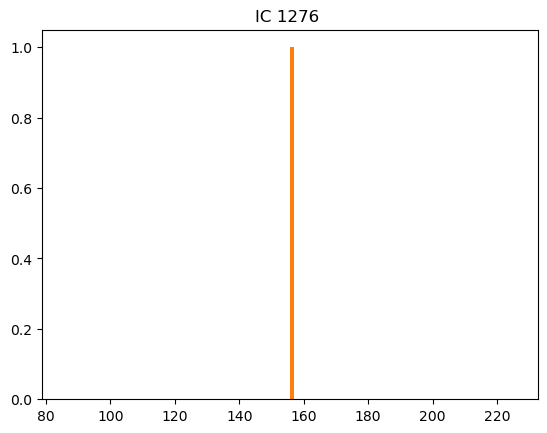

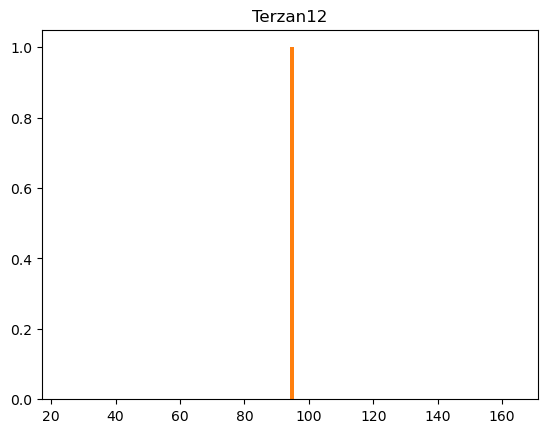

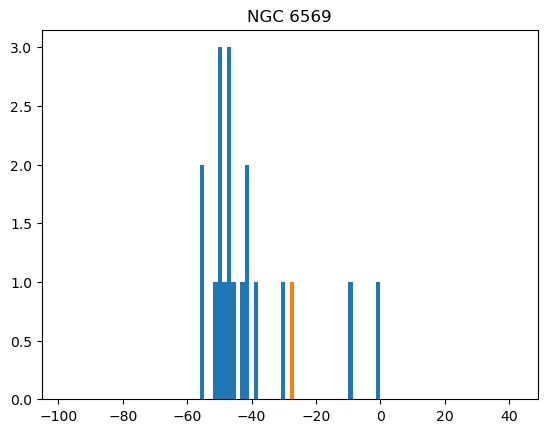

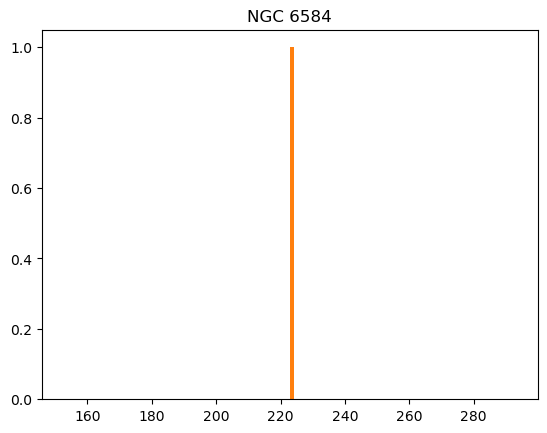

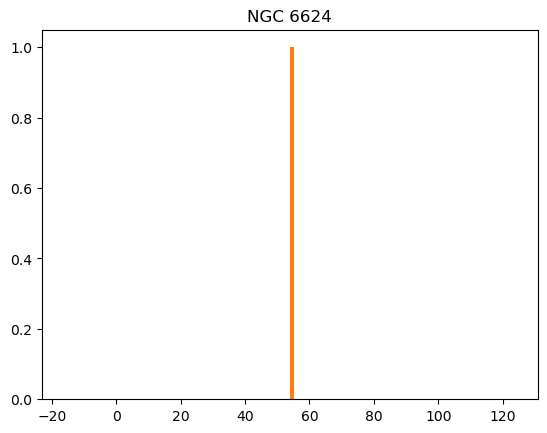

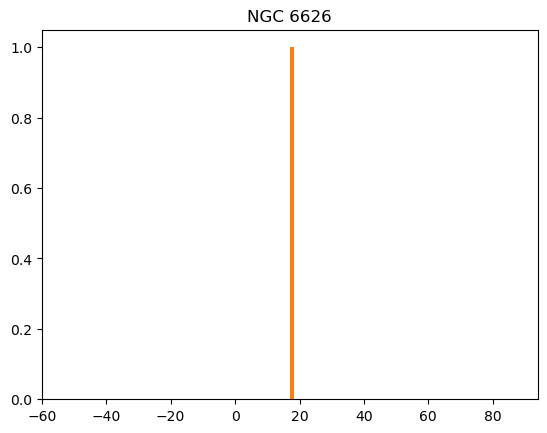

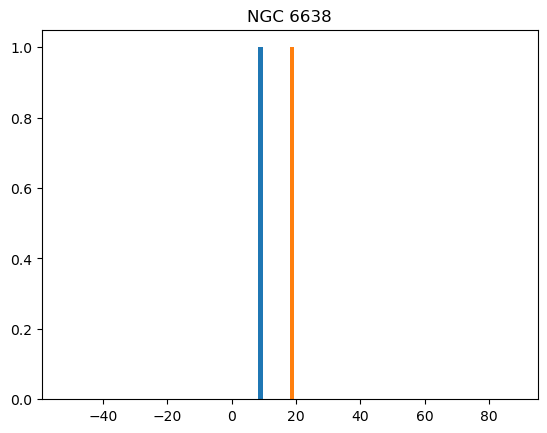

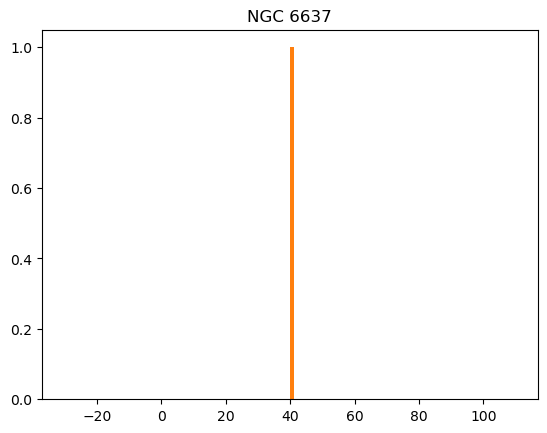

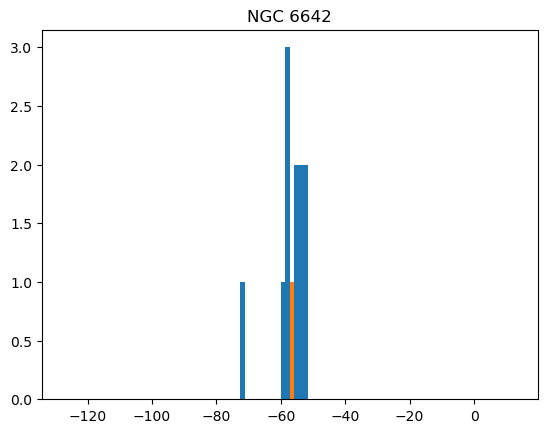

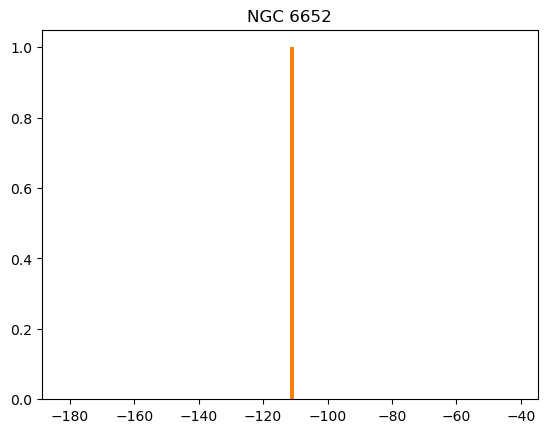

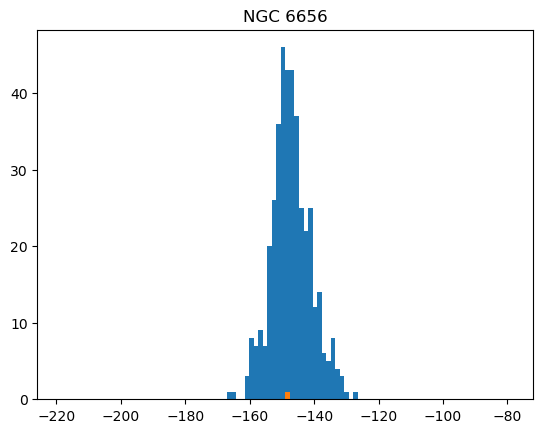

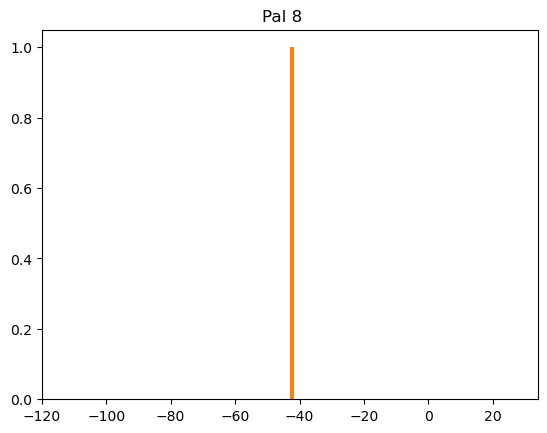

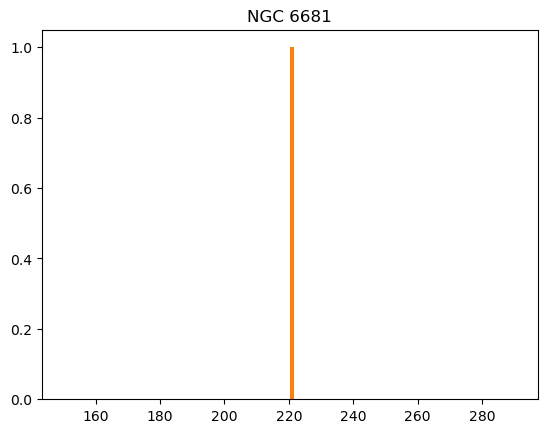

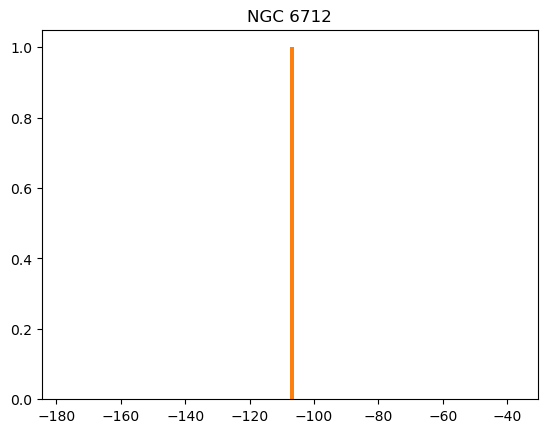

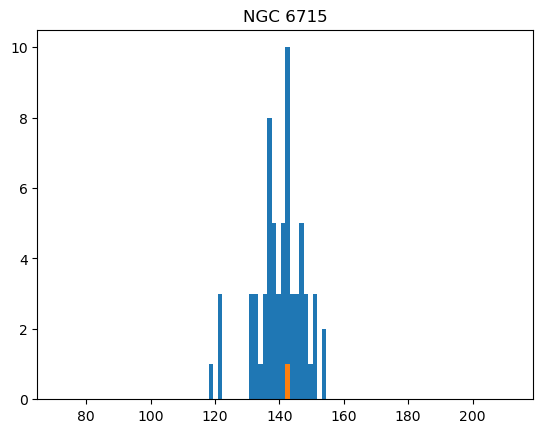

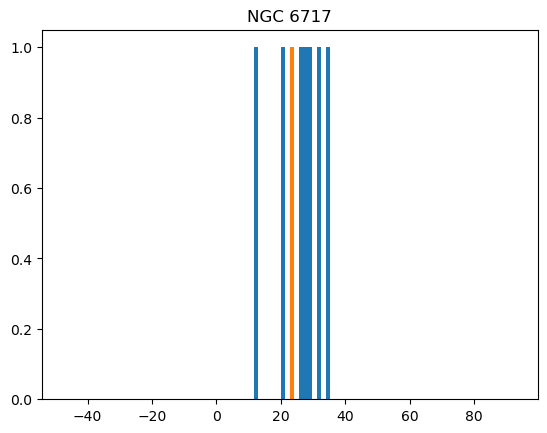

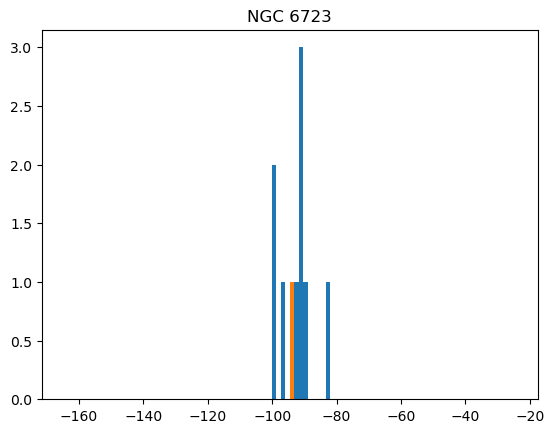

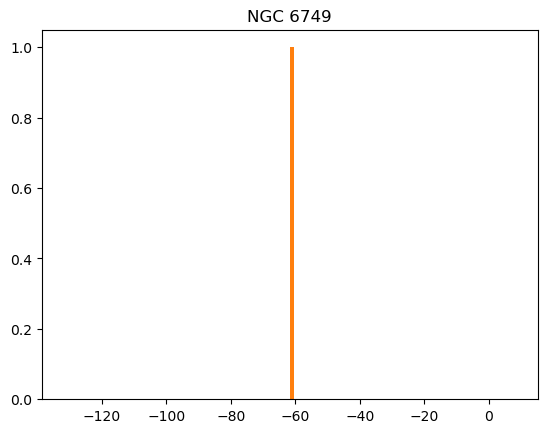

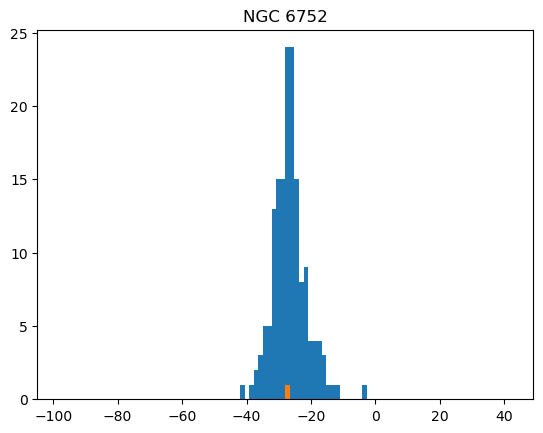

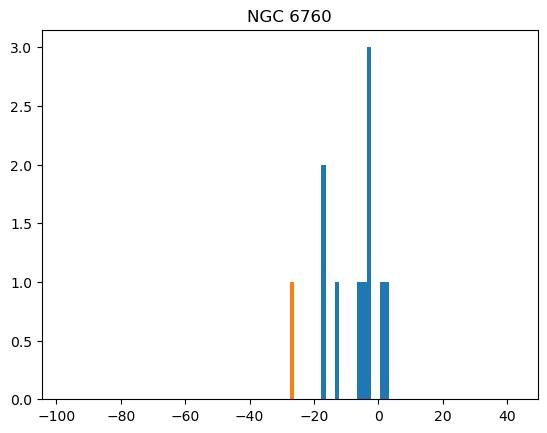

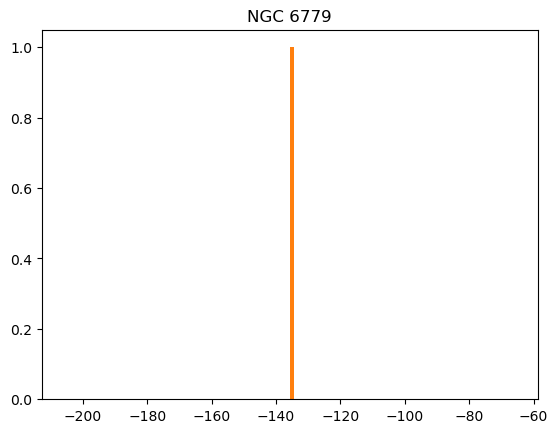

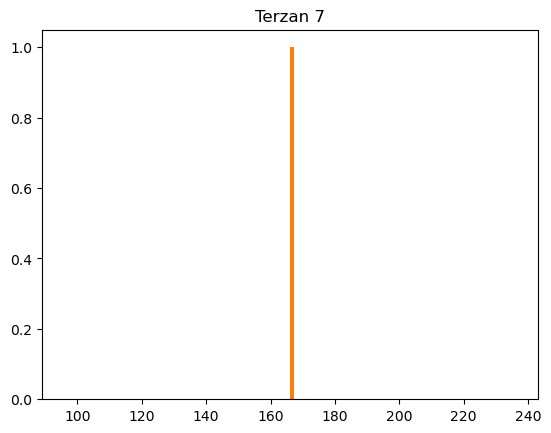

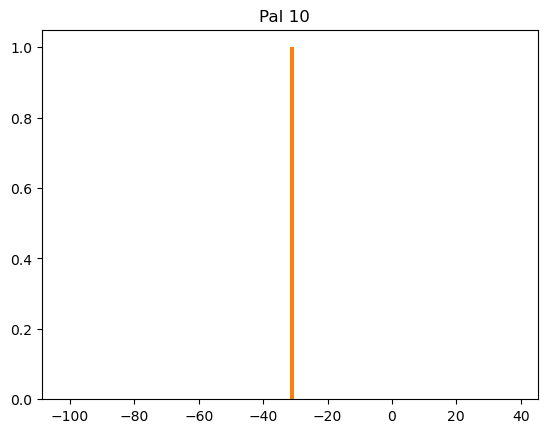

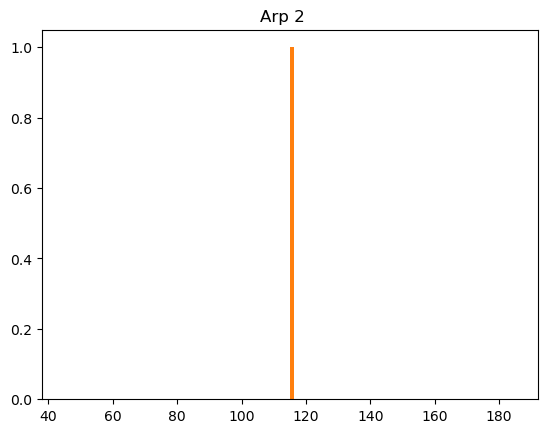

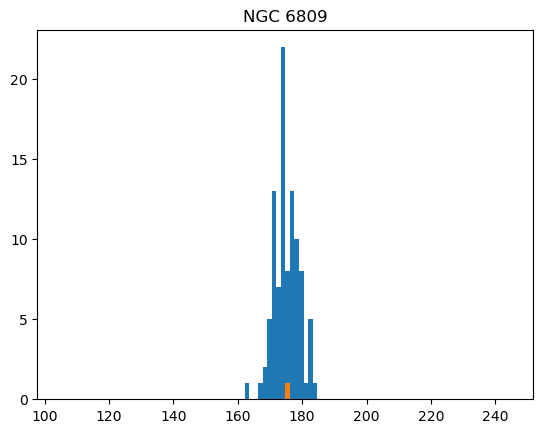

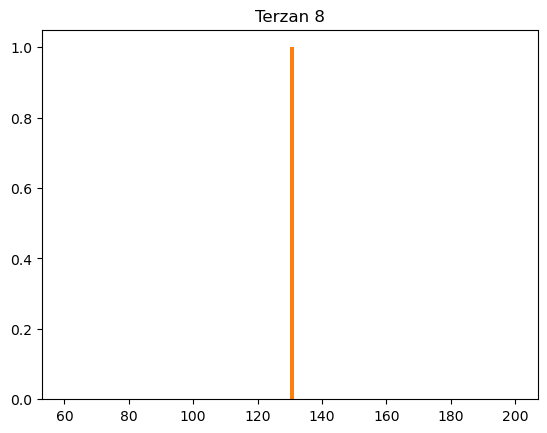

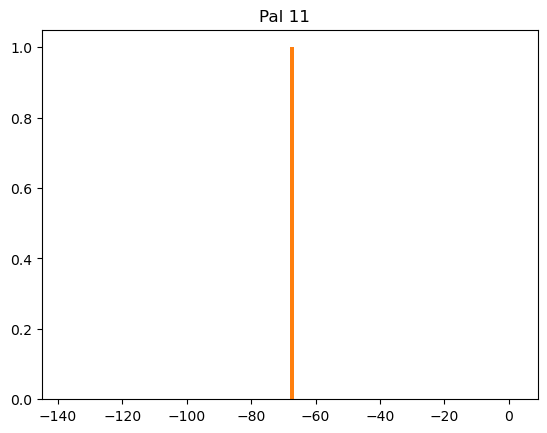

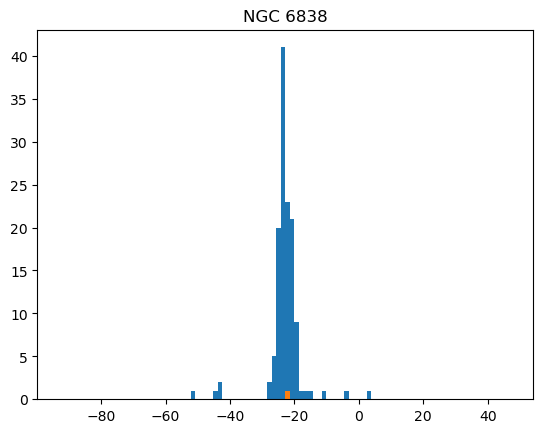

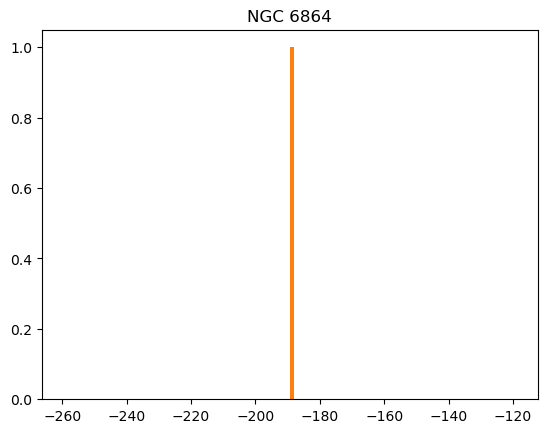

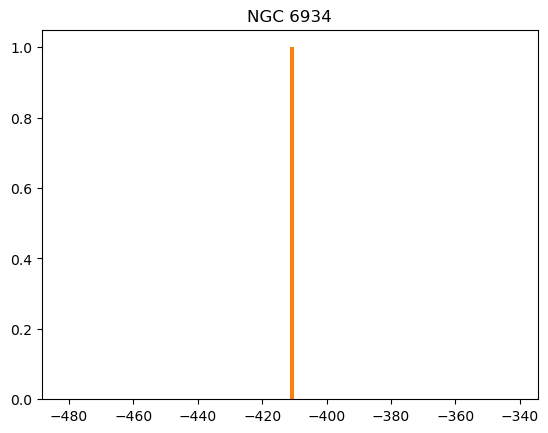

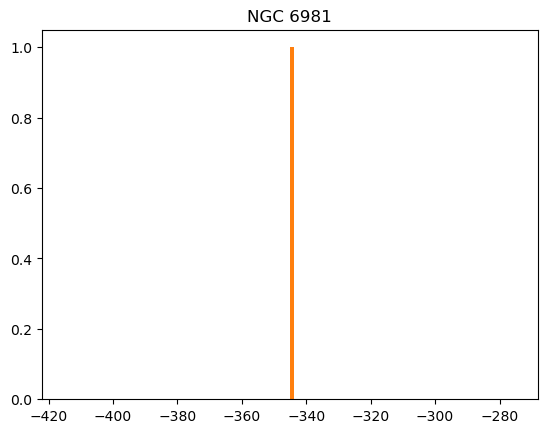

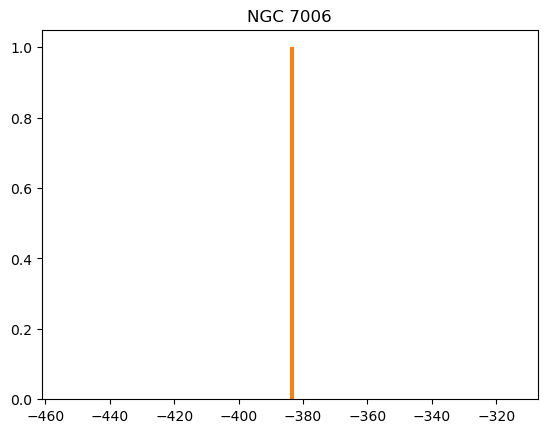

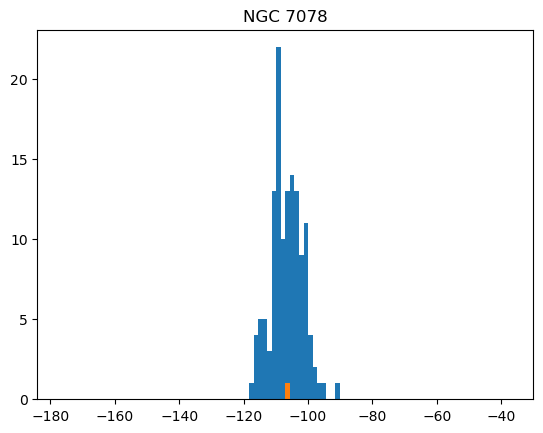

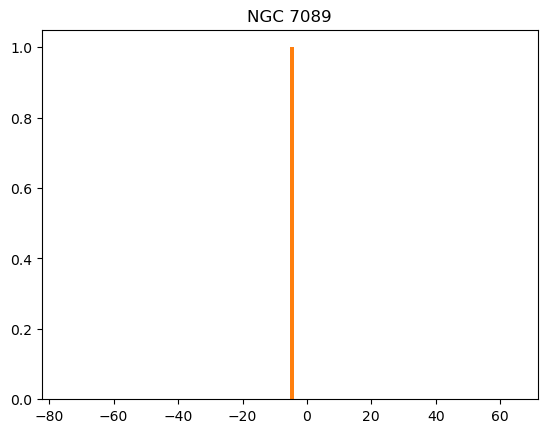

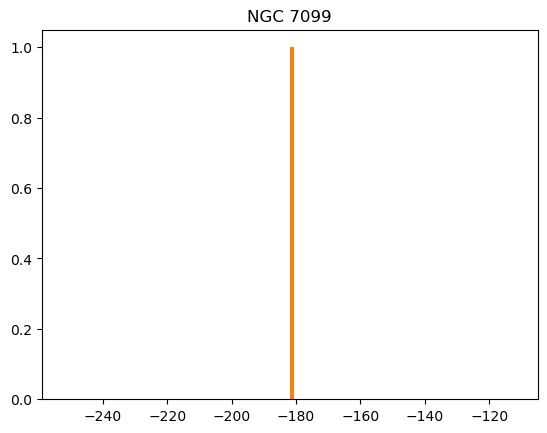

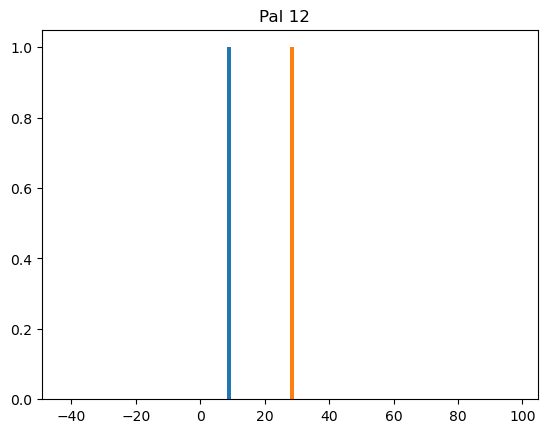

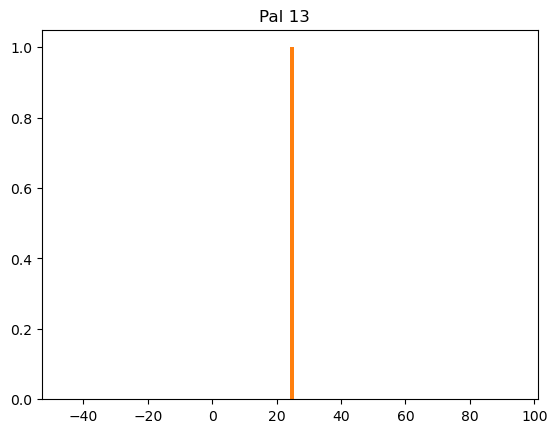

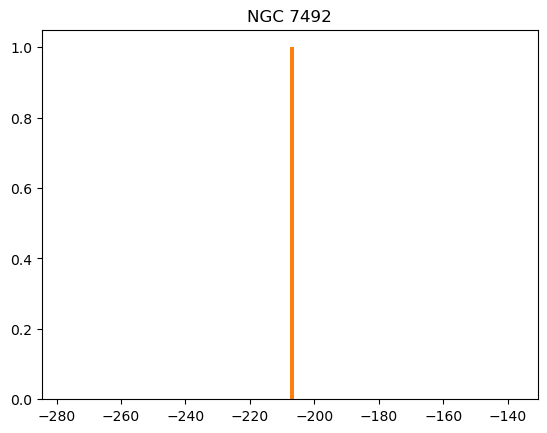

In [222]:
for i in range(len(cluster_stars)):
    graphmin = glob_clust[i]["RV"] -70
    graphmax = graphmin + 140
    
        
    plt.hist(cluster_stars[i]["VHELIO_AVG"],range=[graphmin,graphmax],bins=100)
    plt.hist(glob_clust[i]["RV"],range=[graphmin,graphmax],bins=100)
    plt.title(glob_clust[i]["ID"])
    plt.show()
    

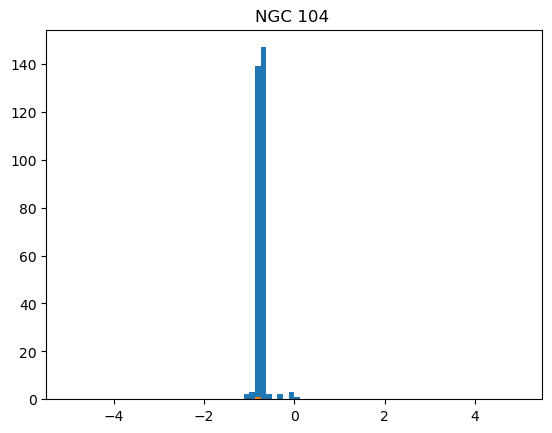

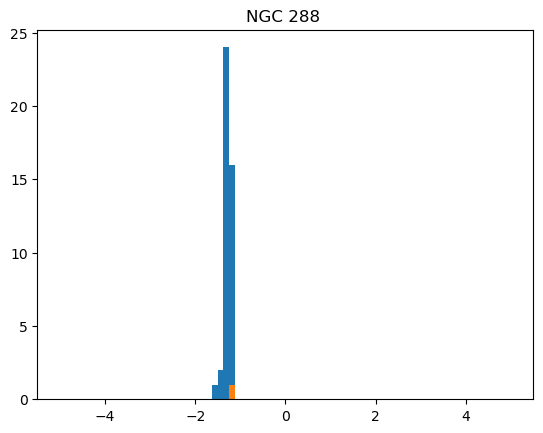

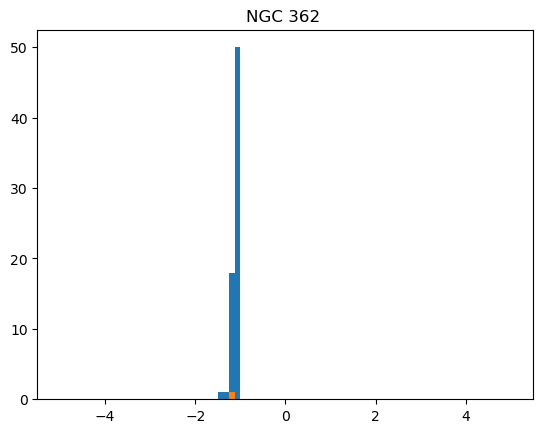

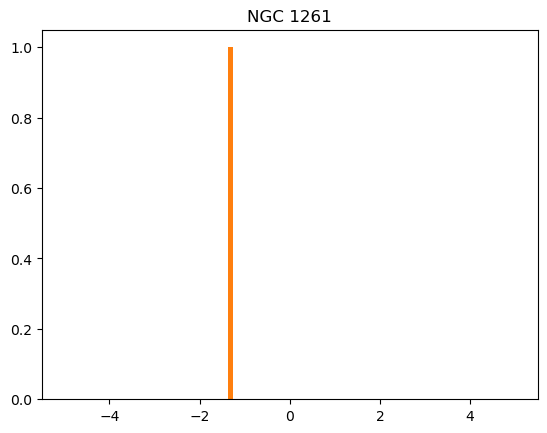

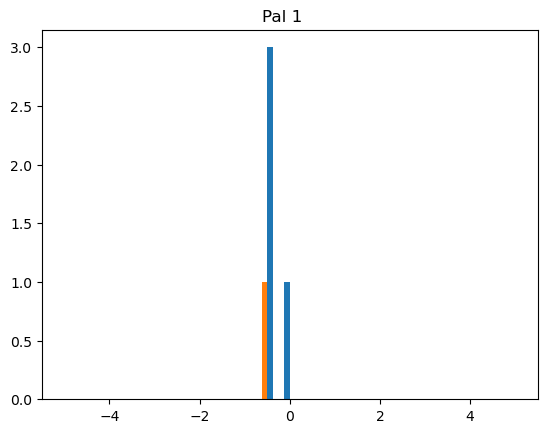

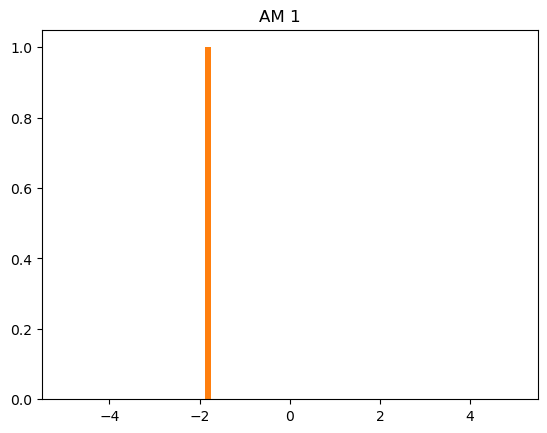

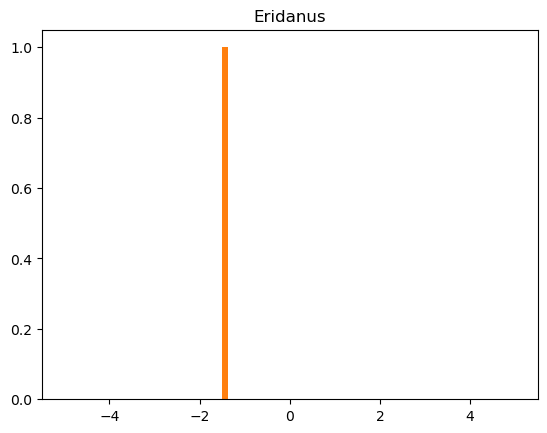

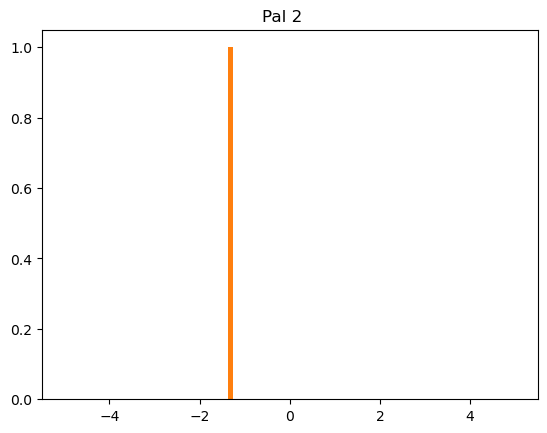

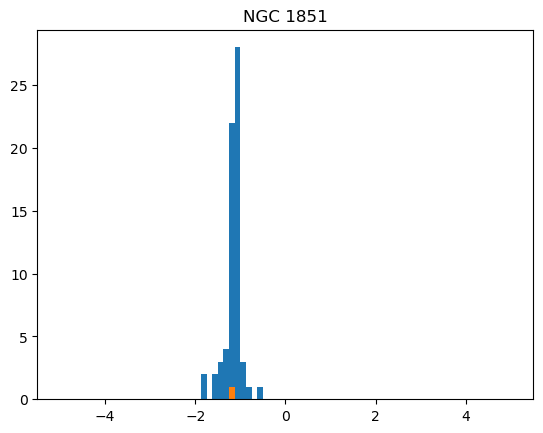

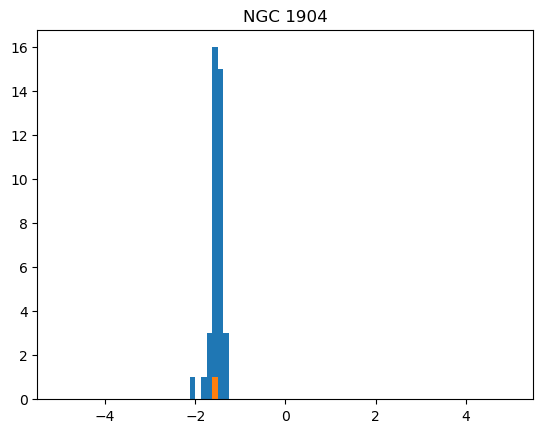

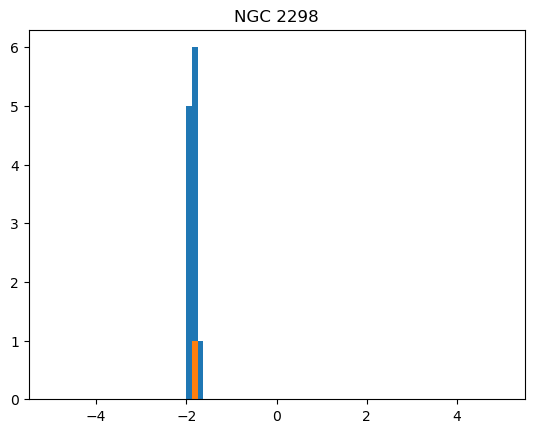

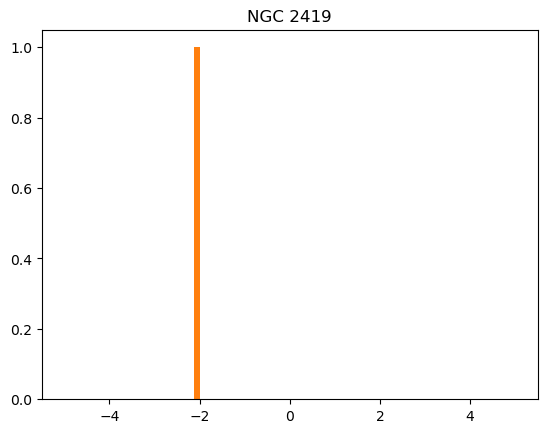

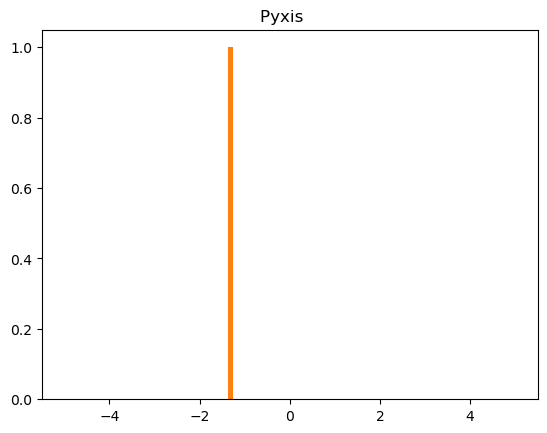

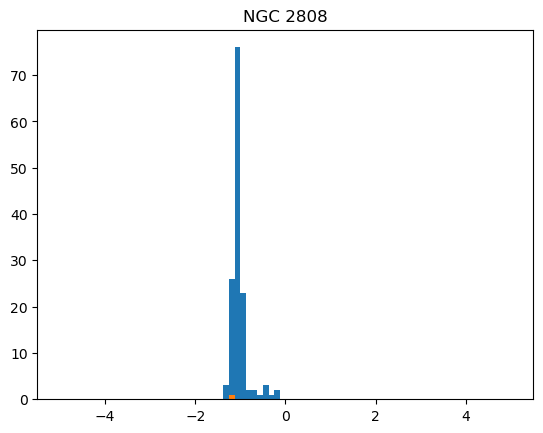

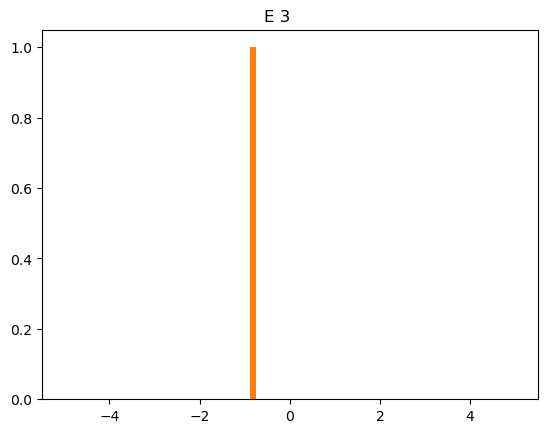

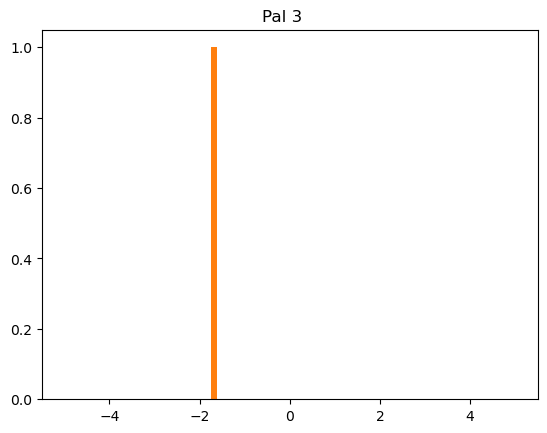

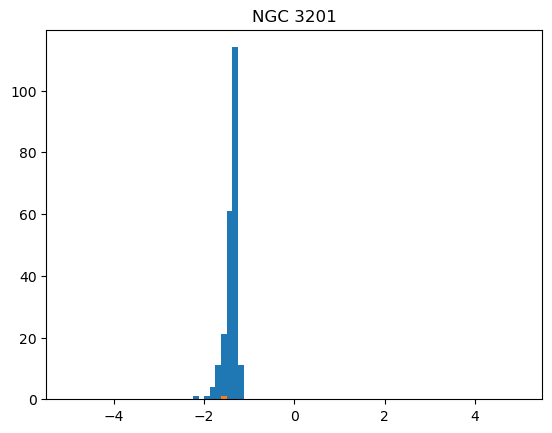

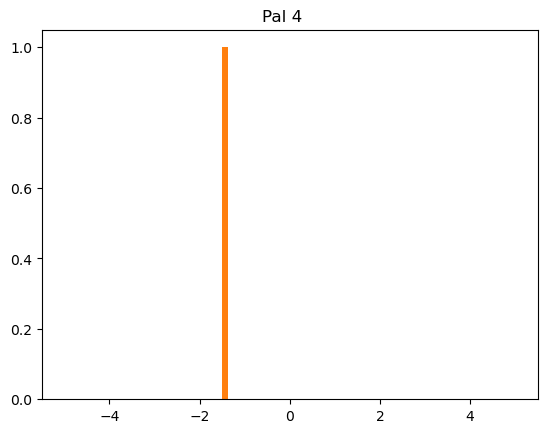

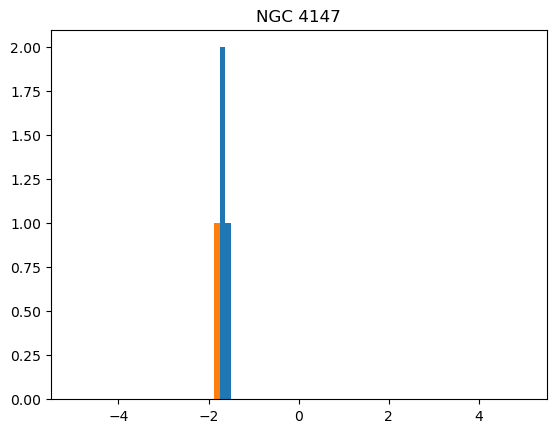

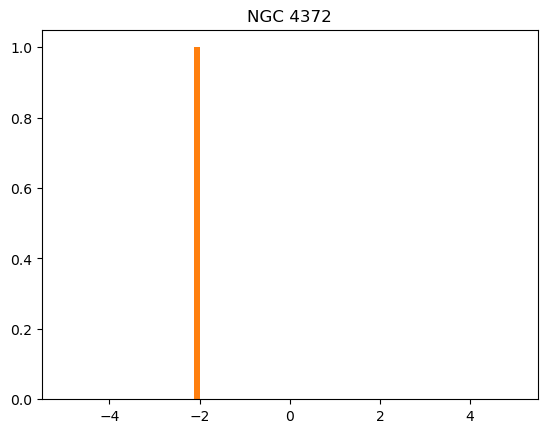

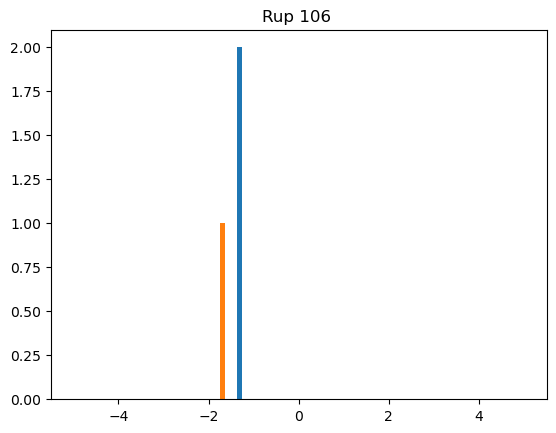

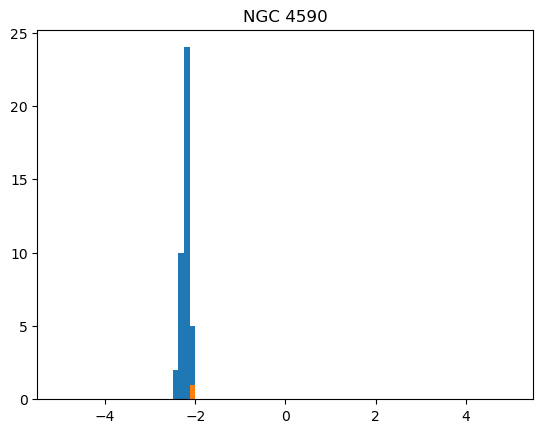

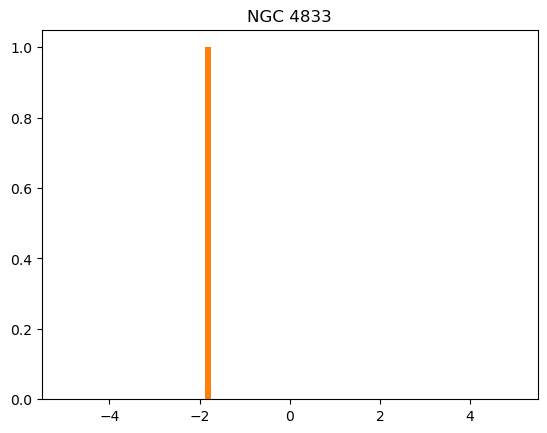

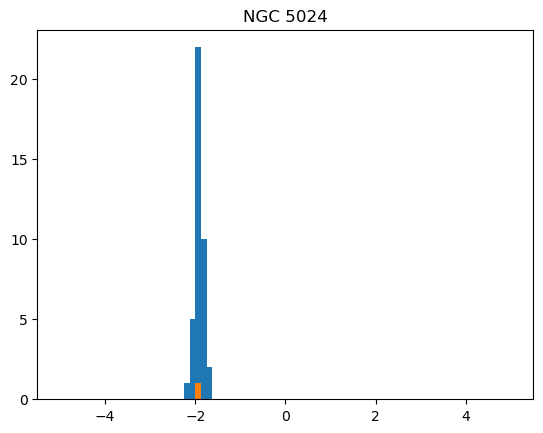

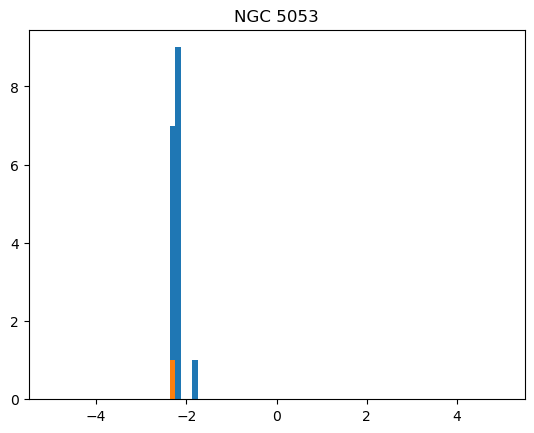

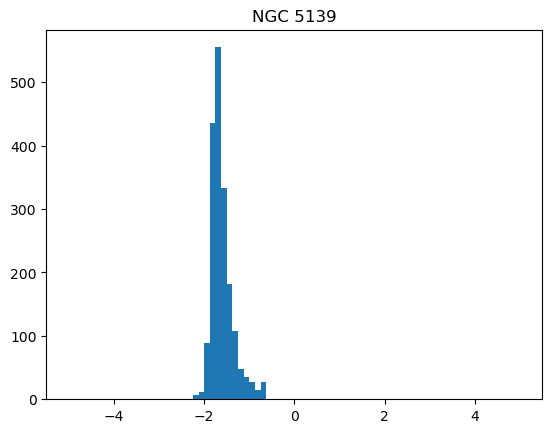

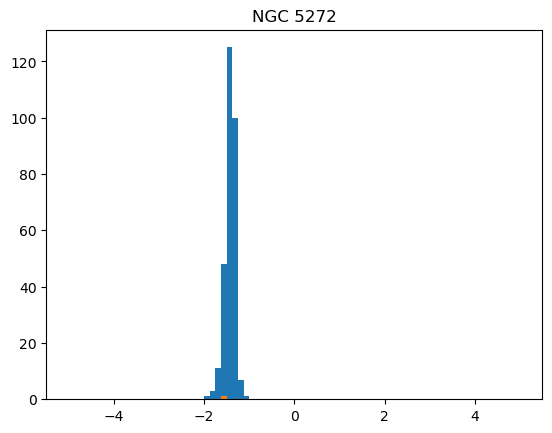

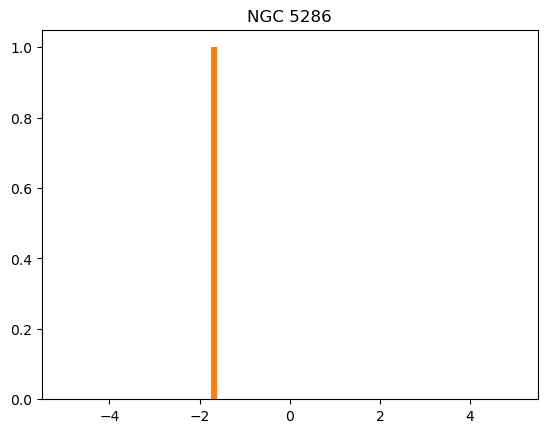

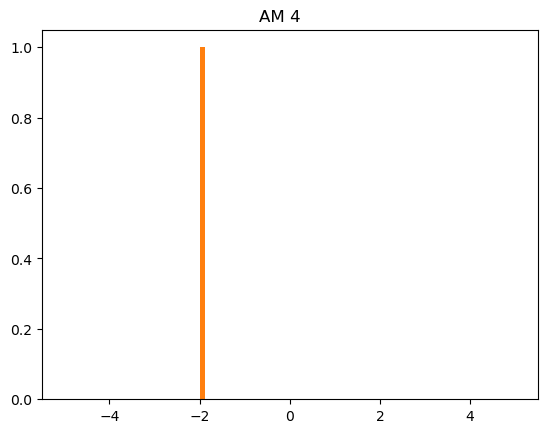

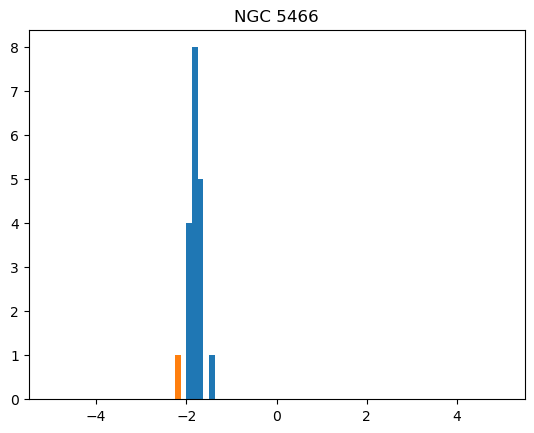

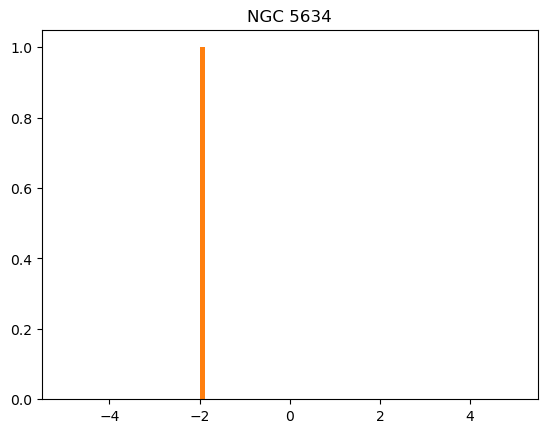

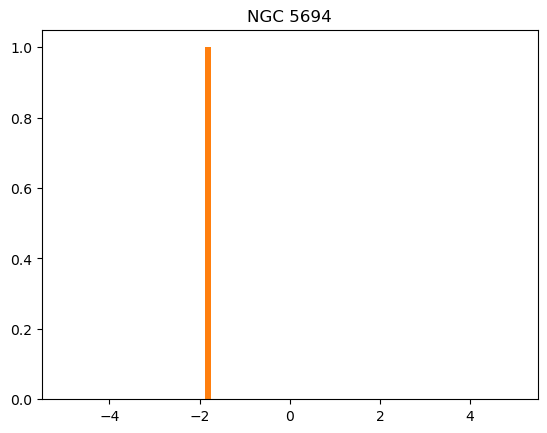

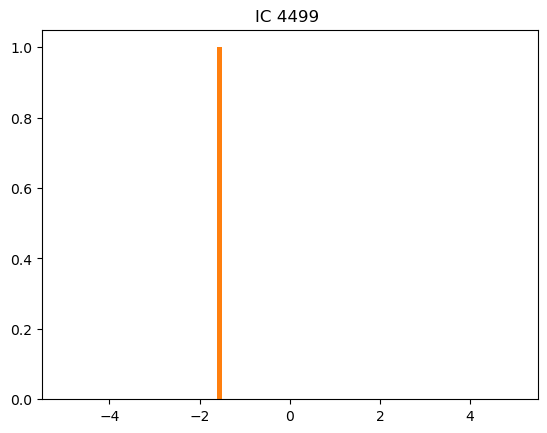

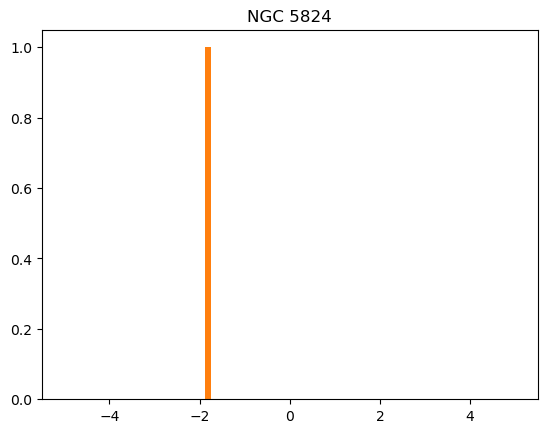

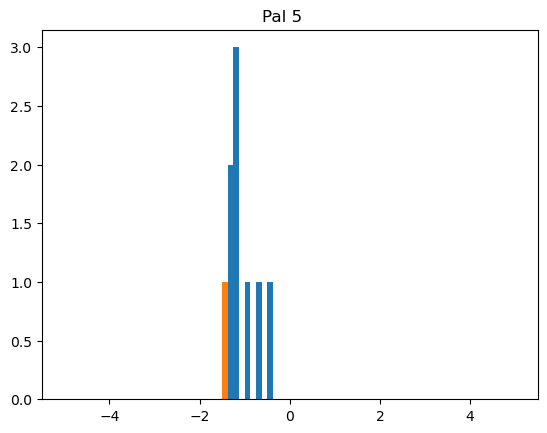

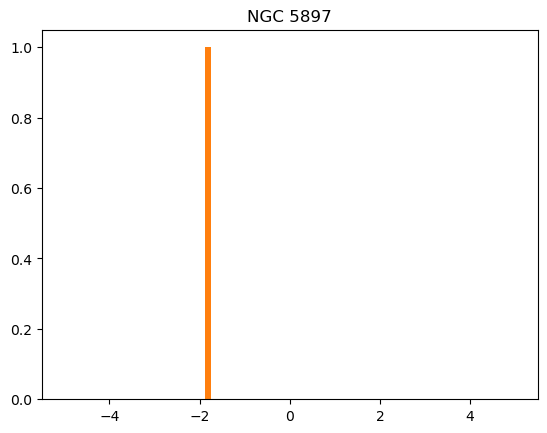

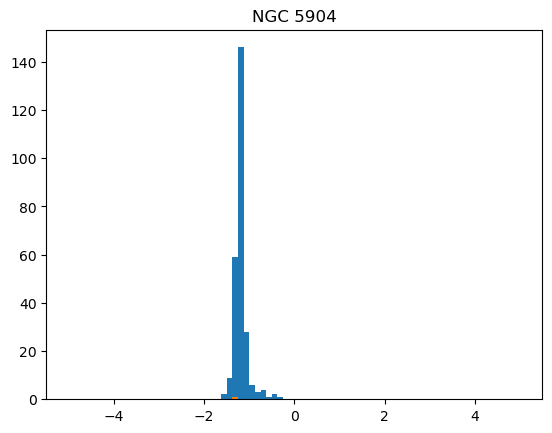

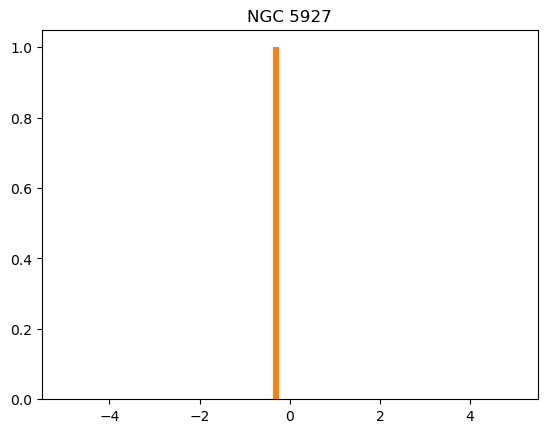

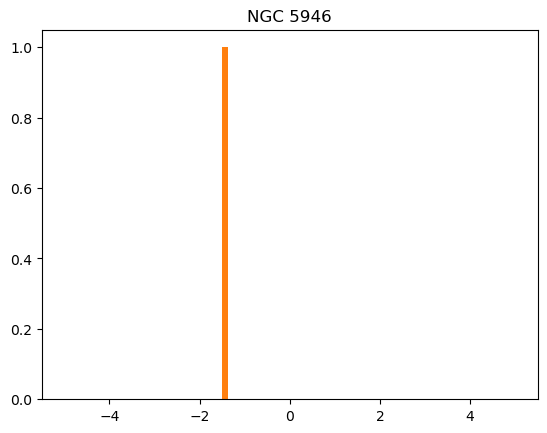

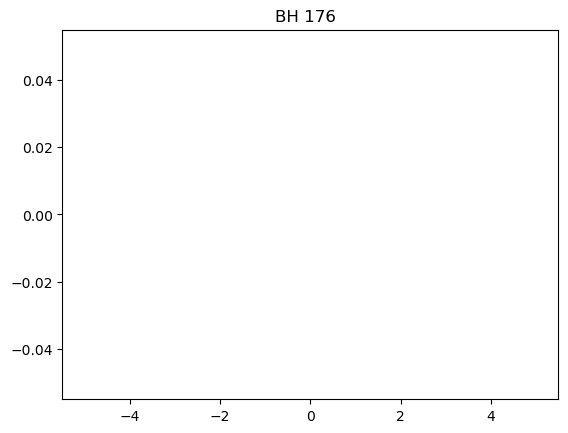

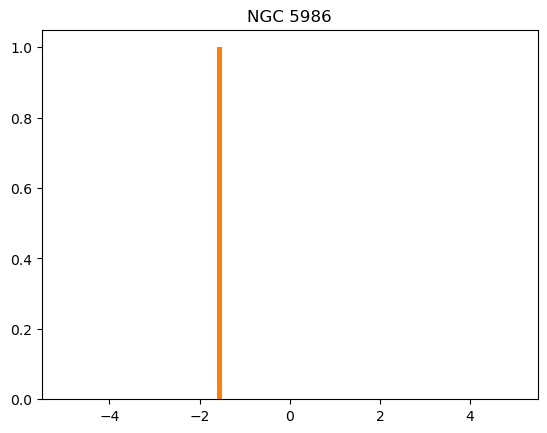

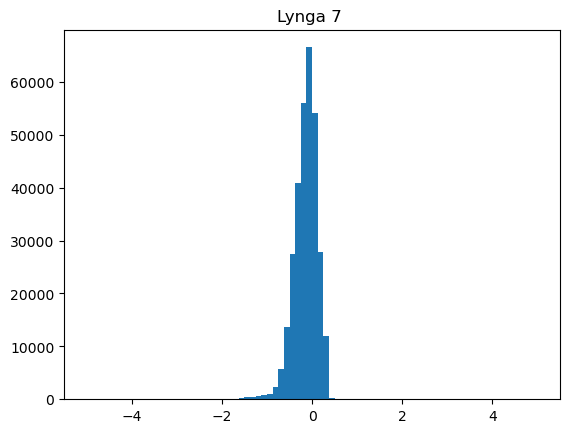

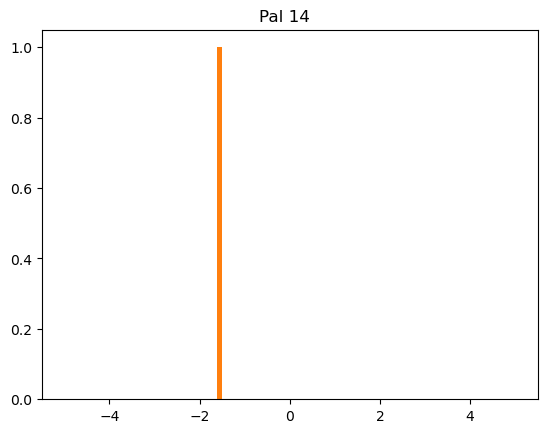

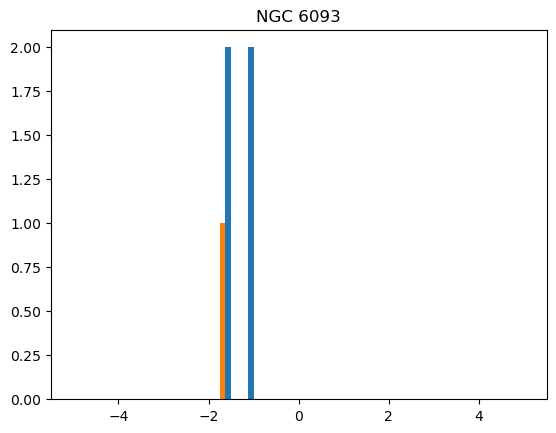

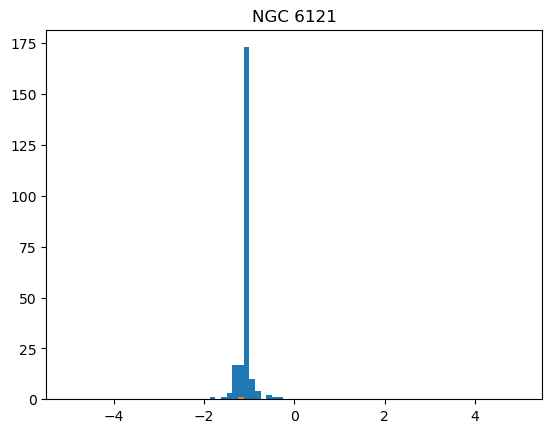

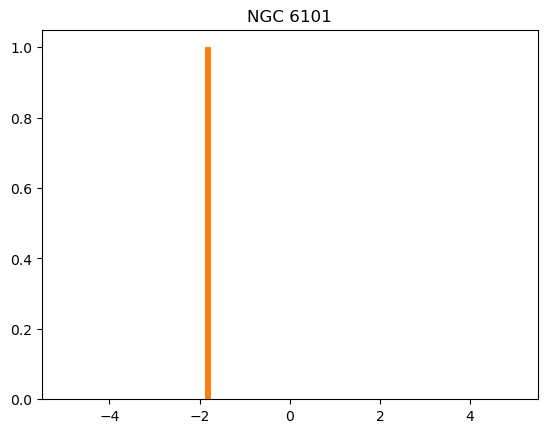

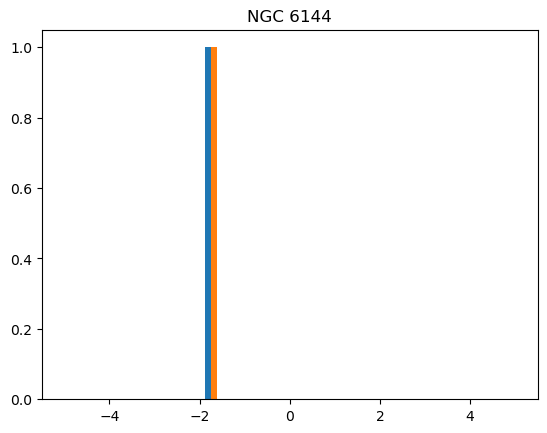

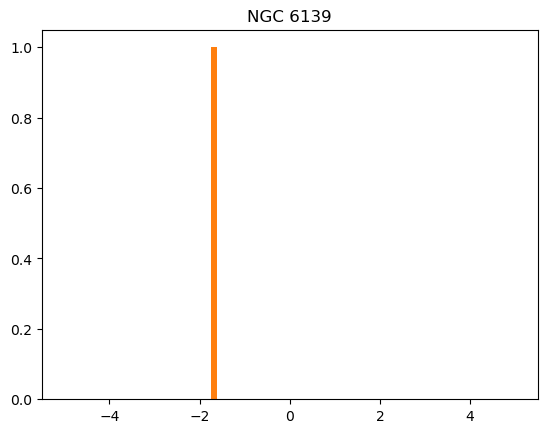

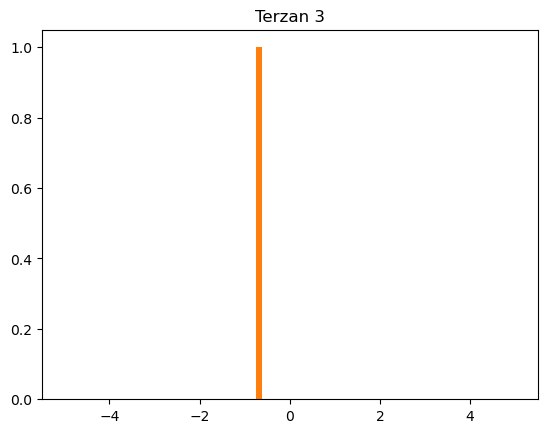

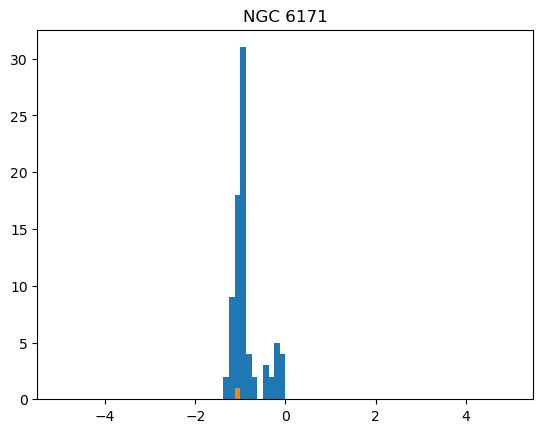

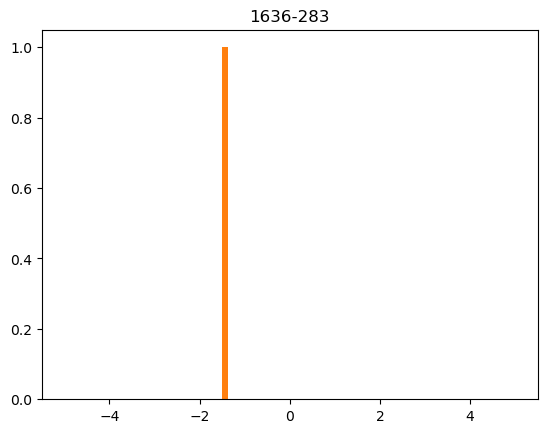

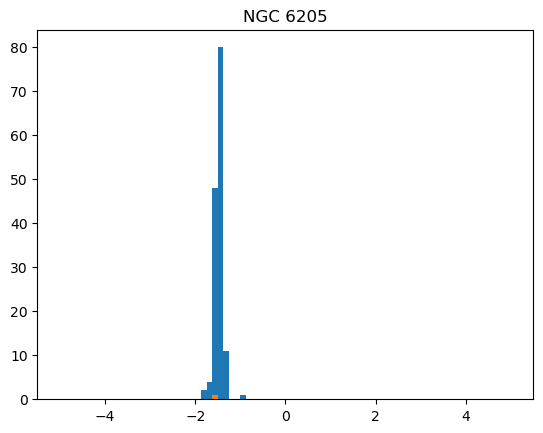

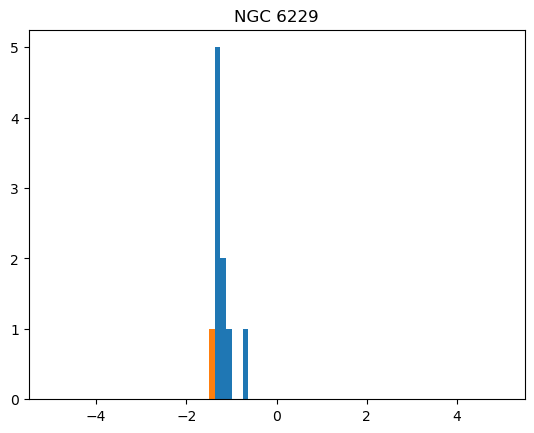

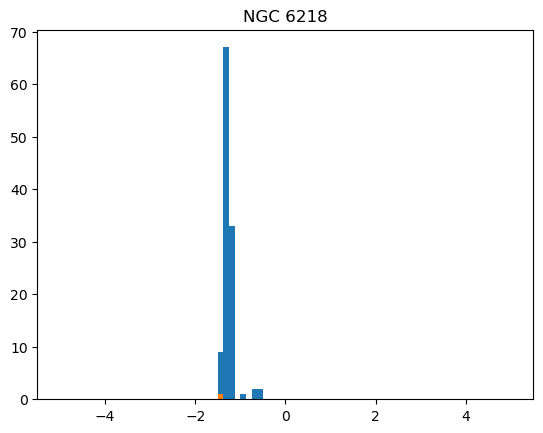

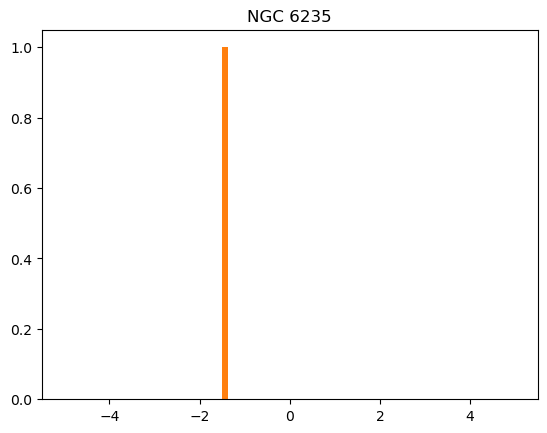

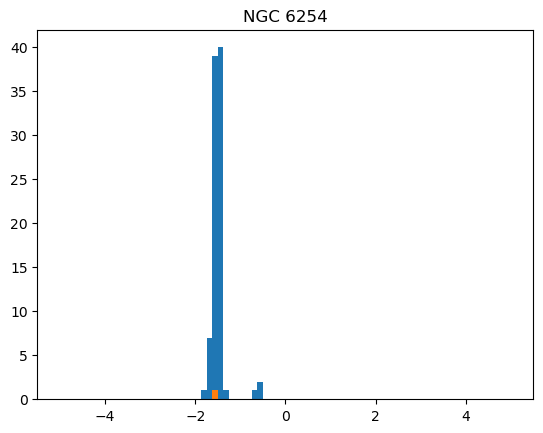

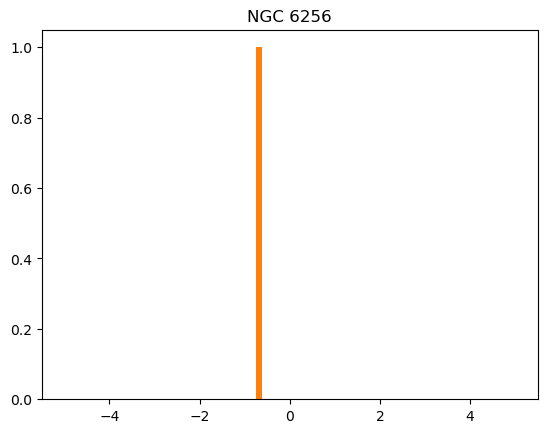

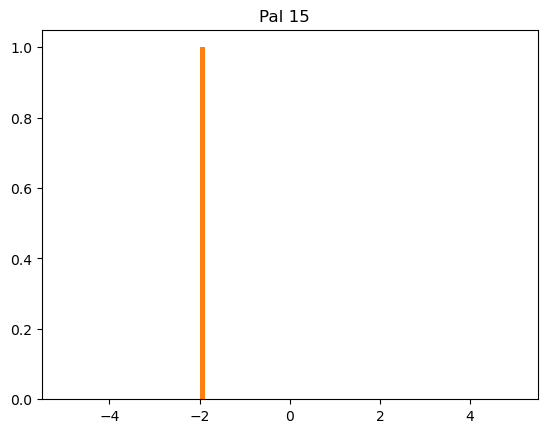

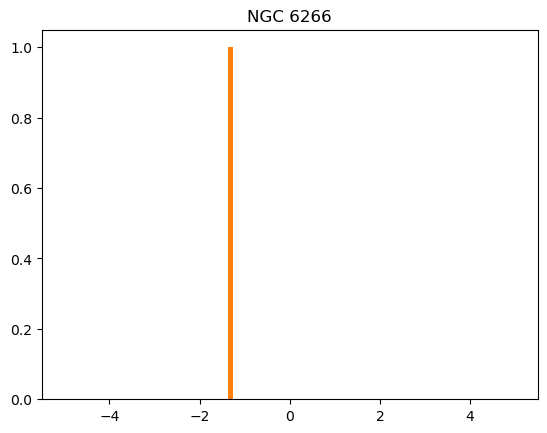

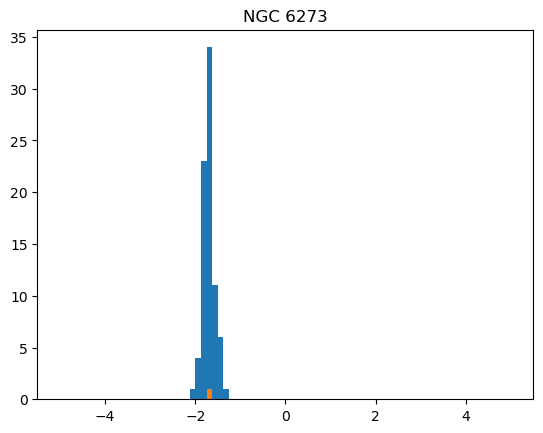

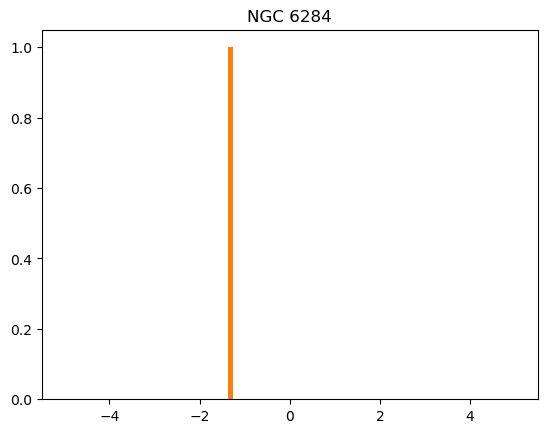

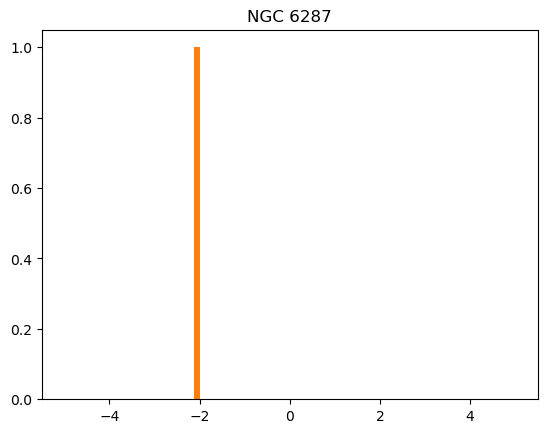

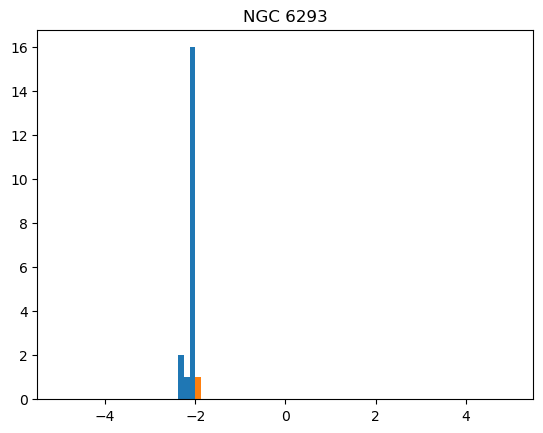

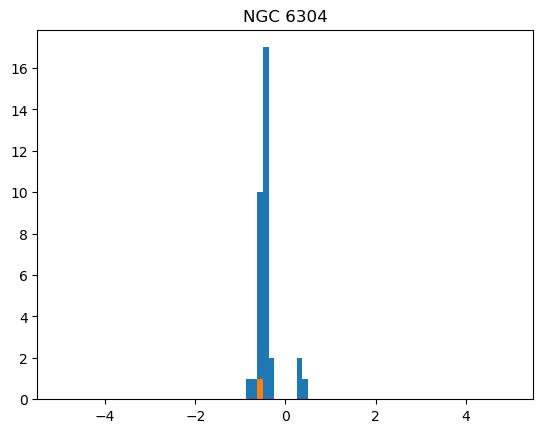

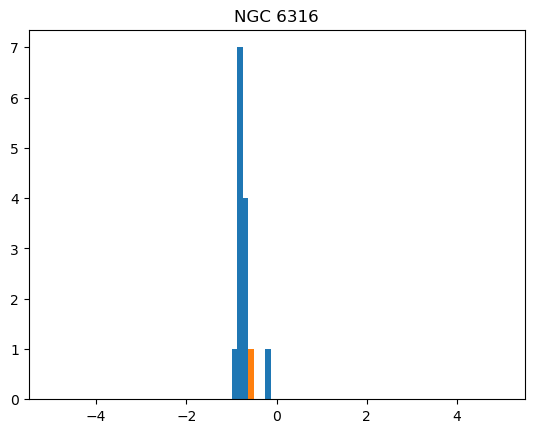

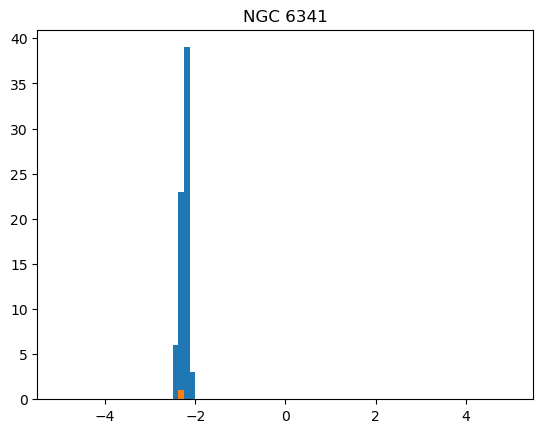

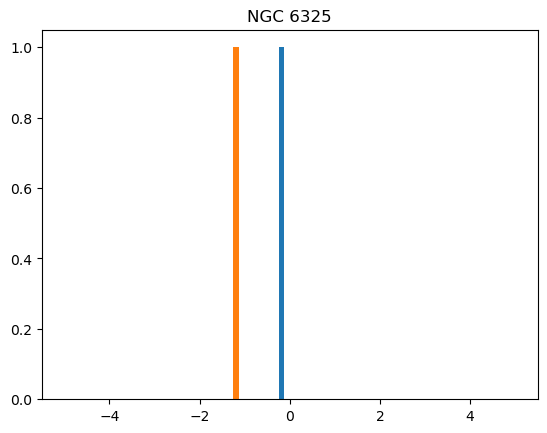

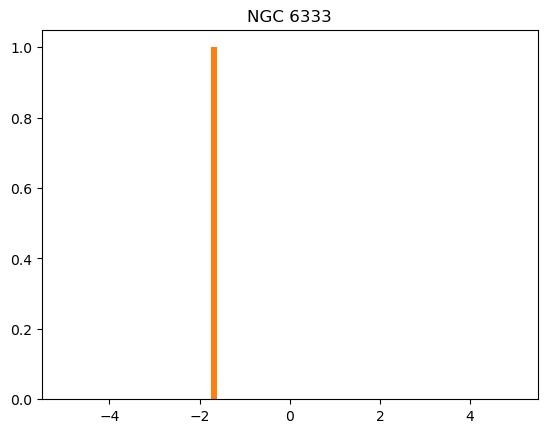

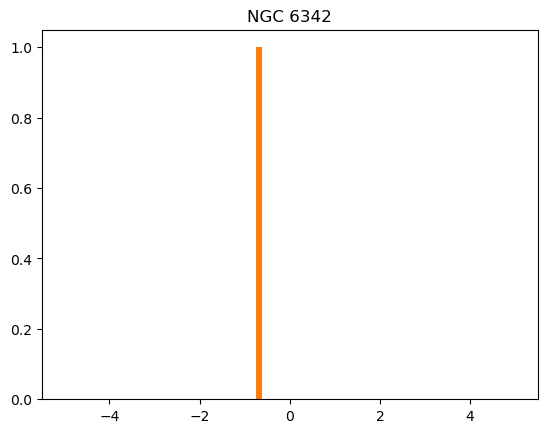

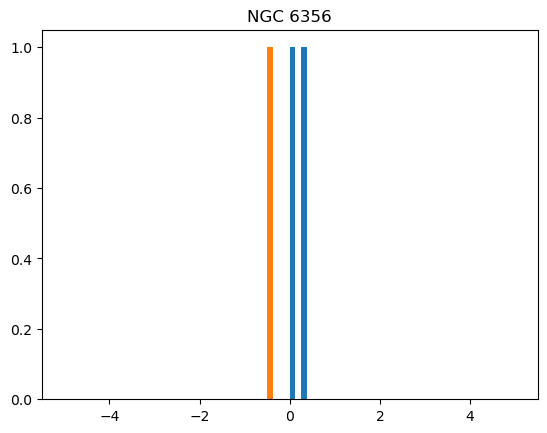

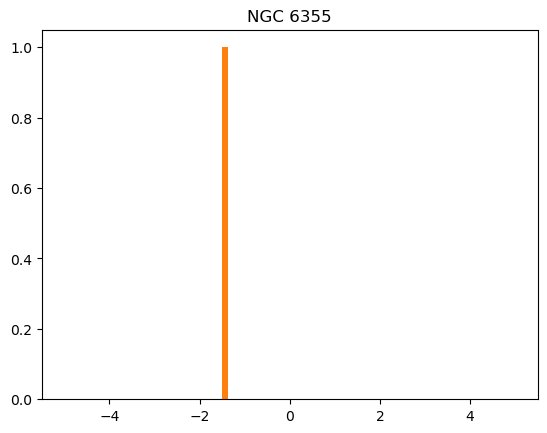

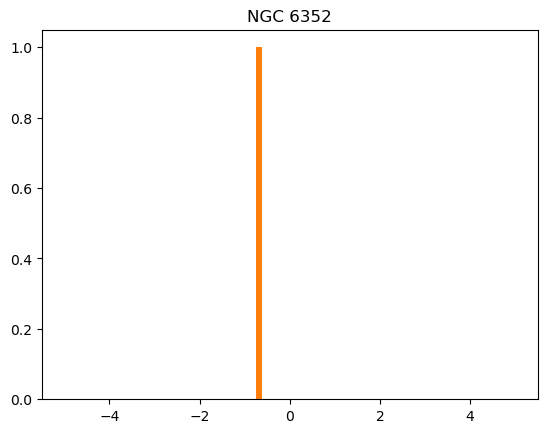

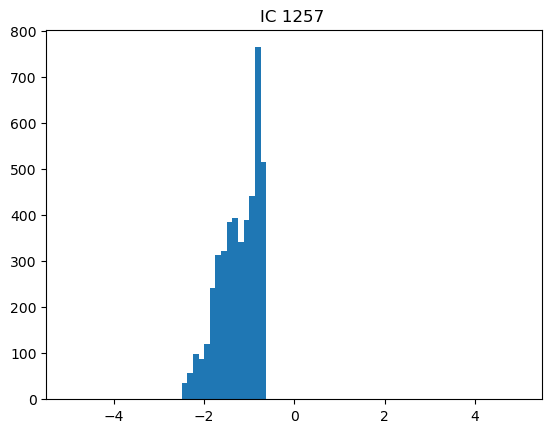

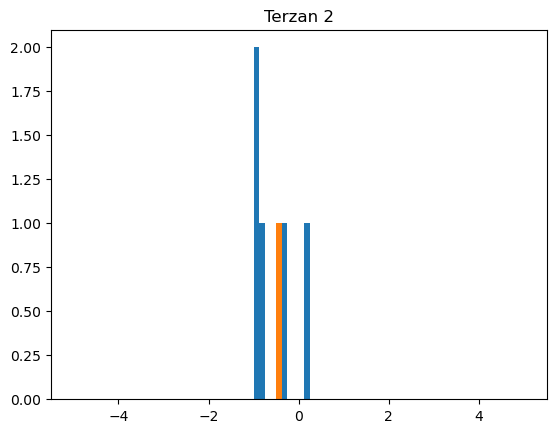

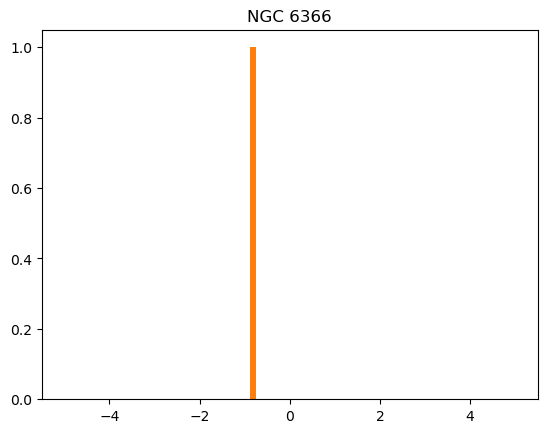

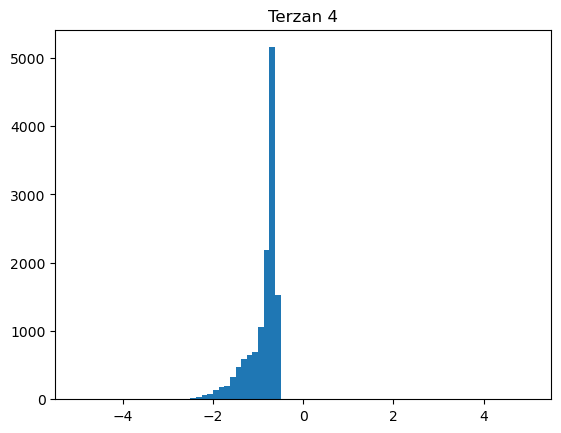

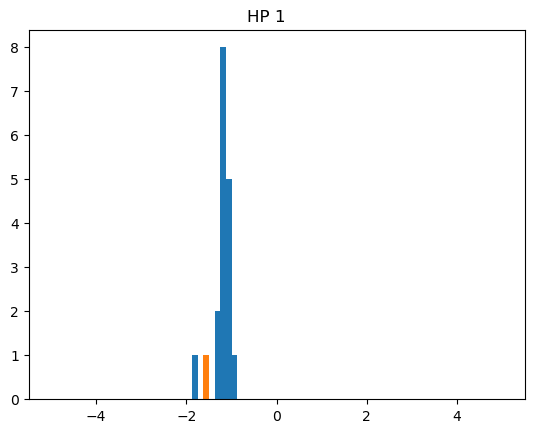

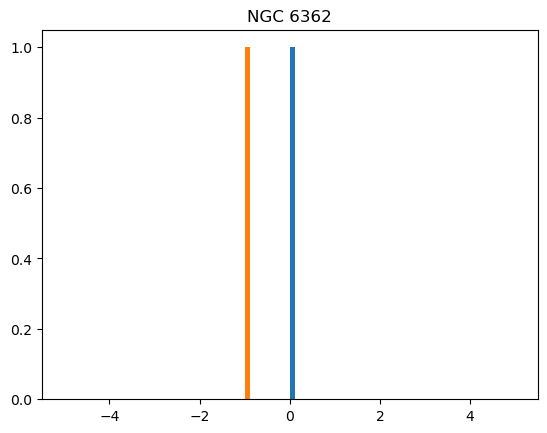

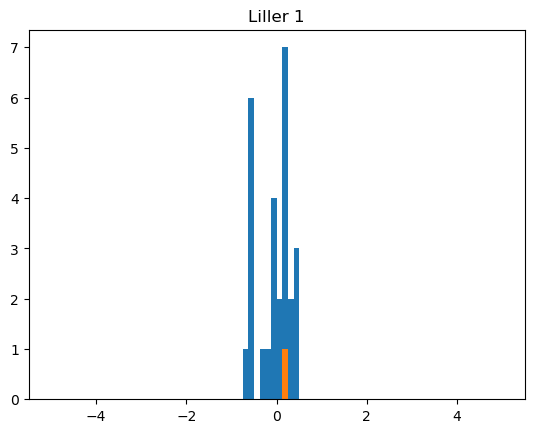

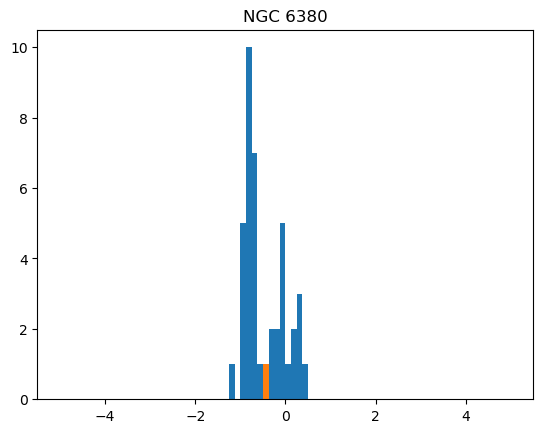

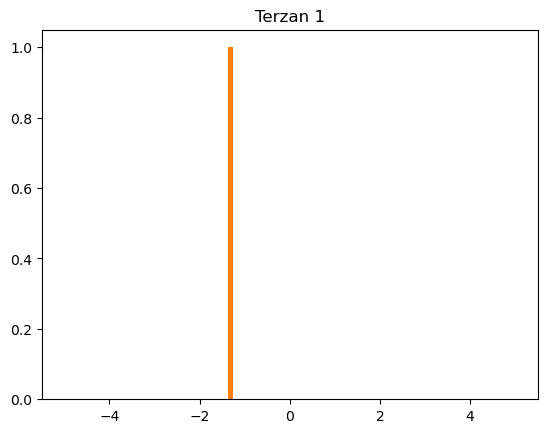

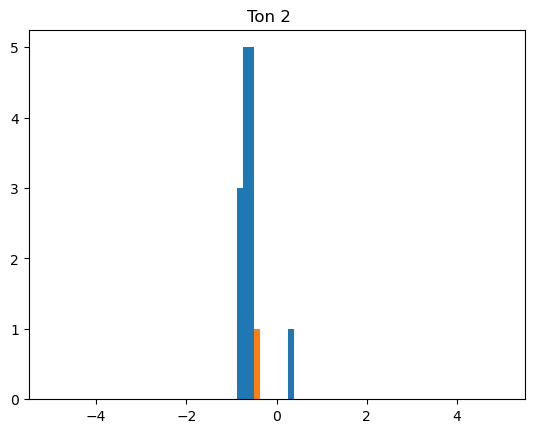

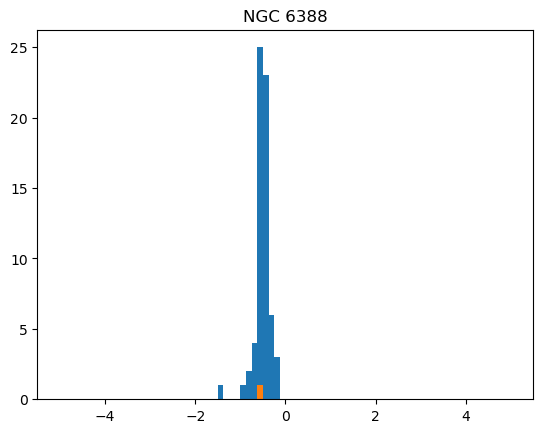

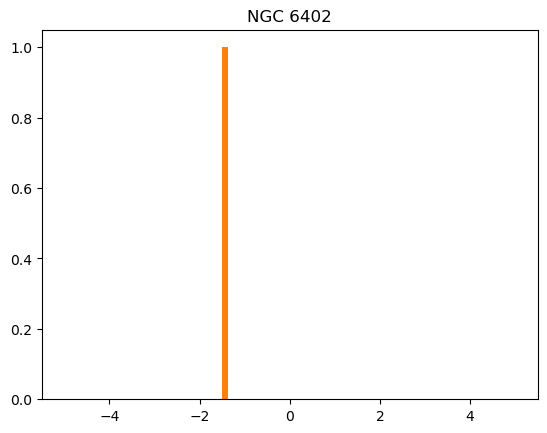

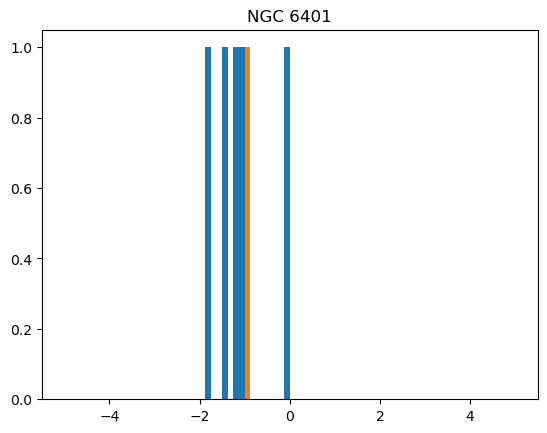

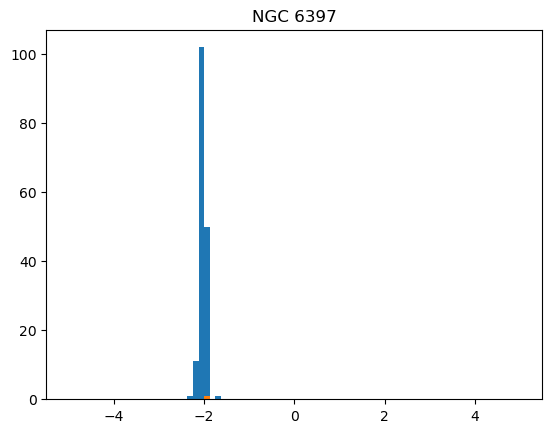

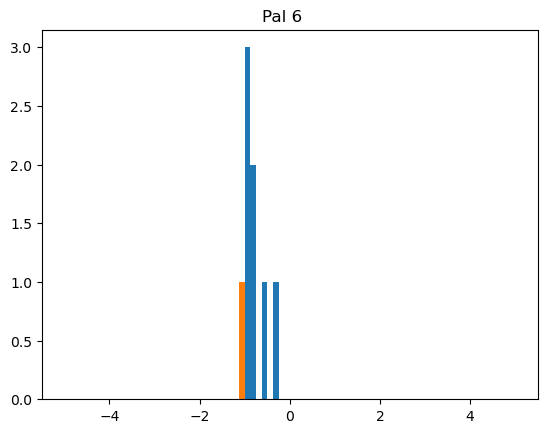

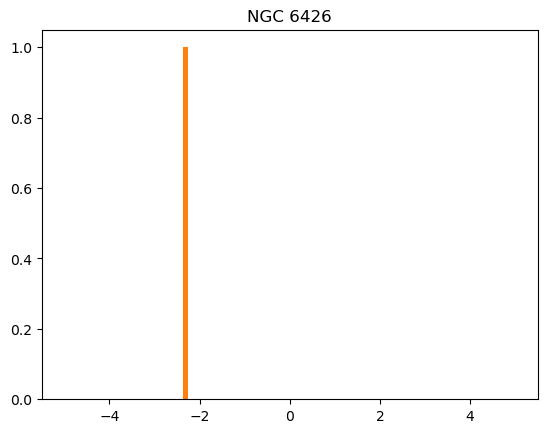

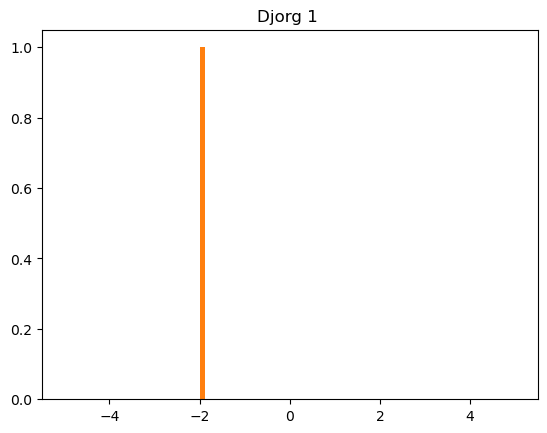

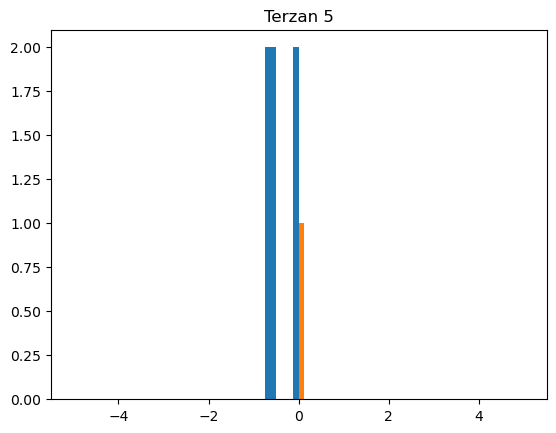

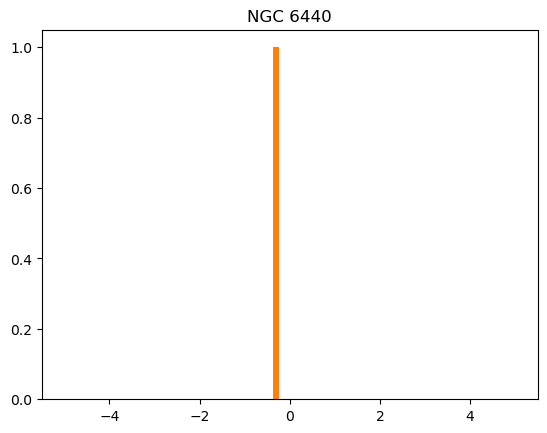

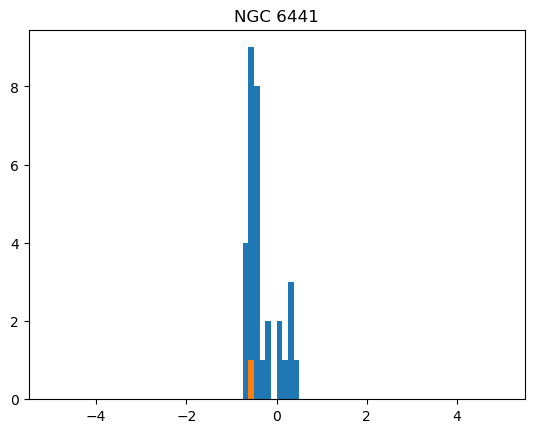

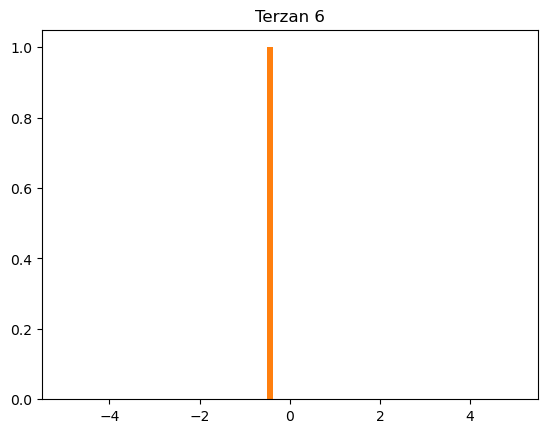

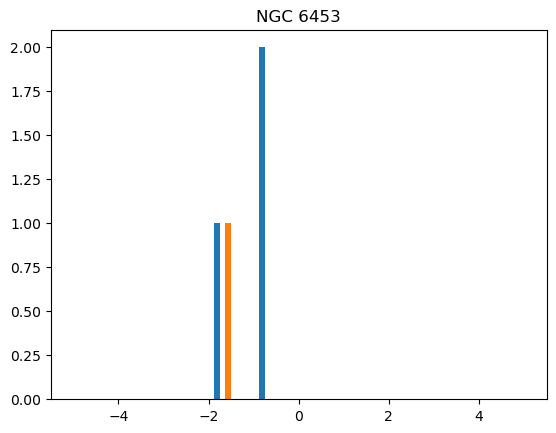

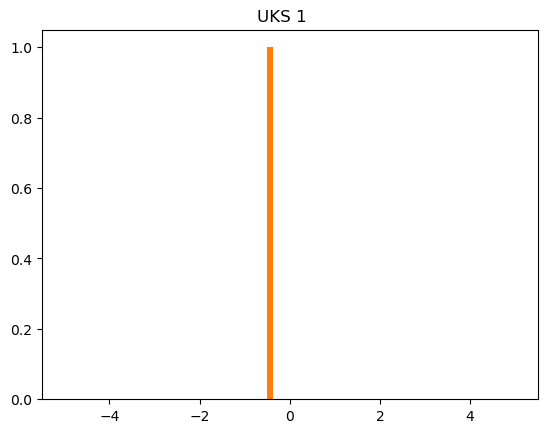

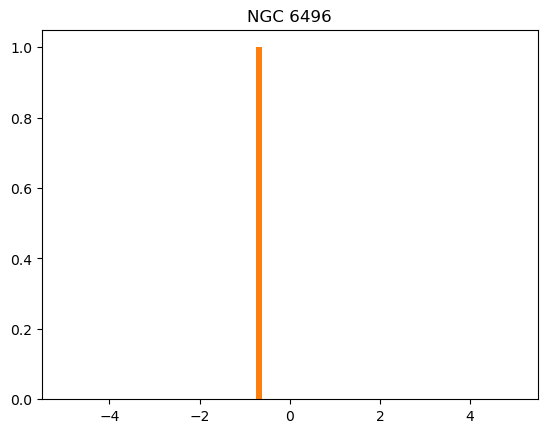

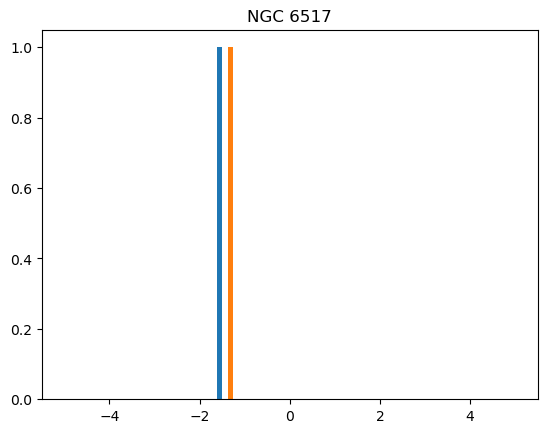

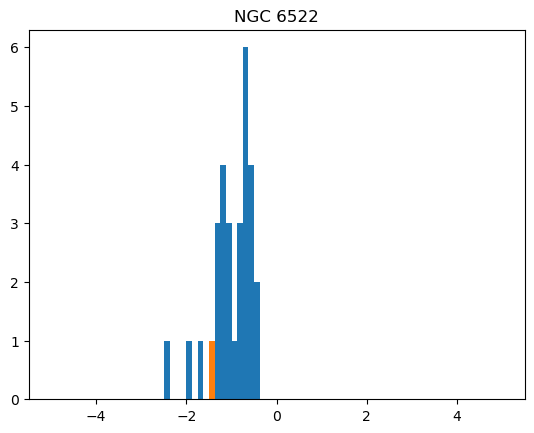

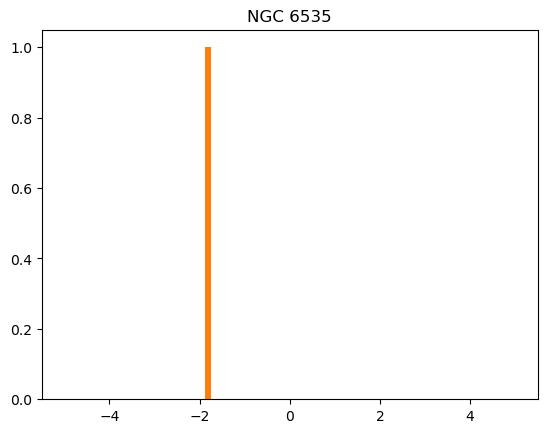

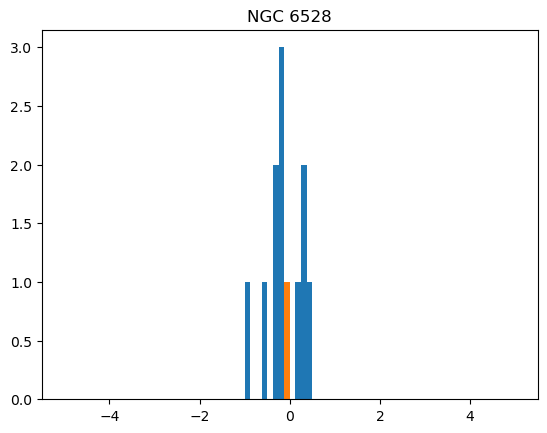

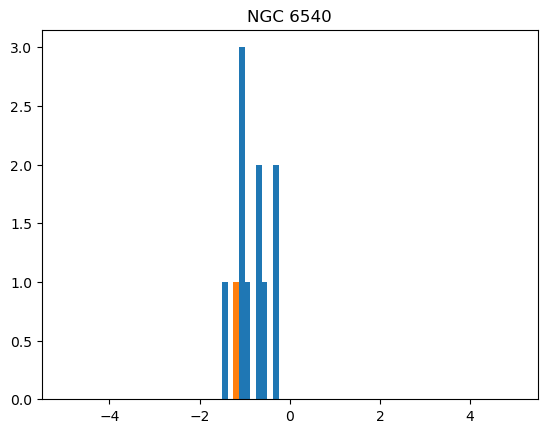

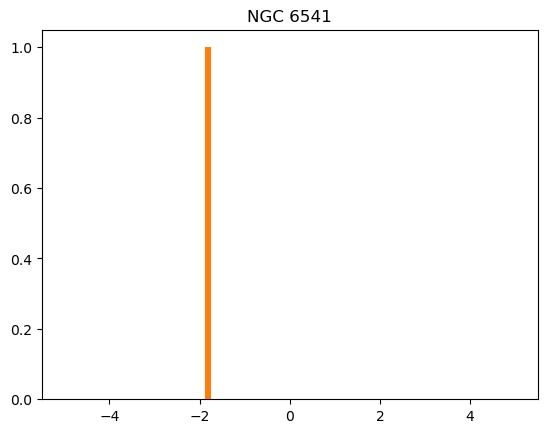

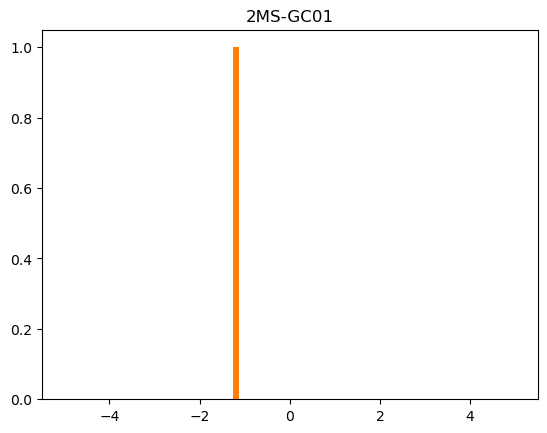

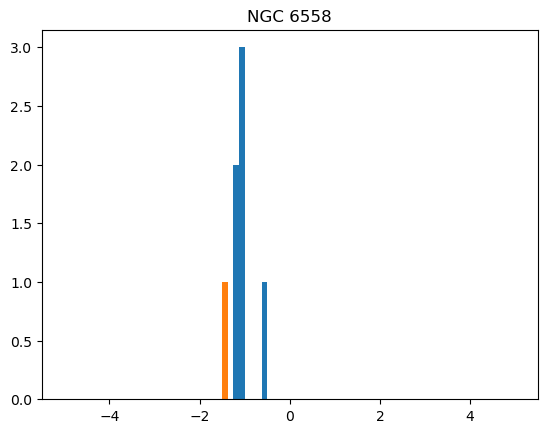

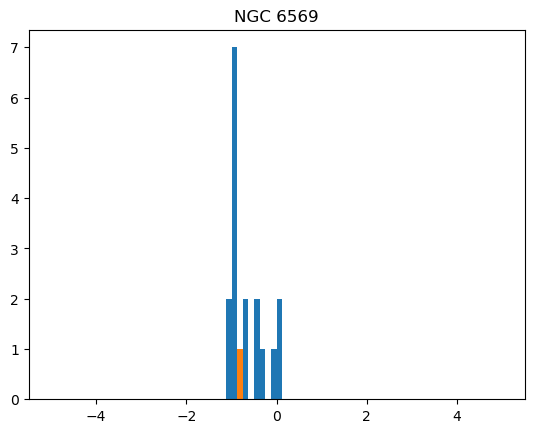

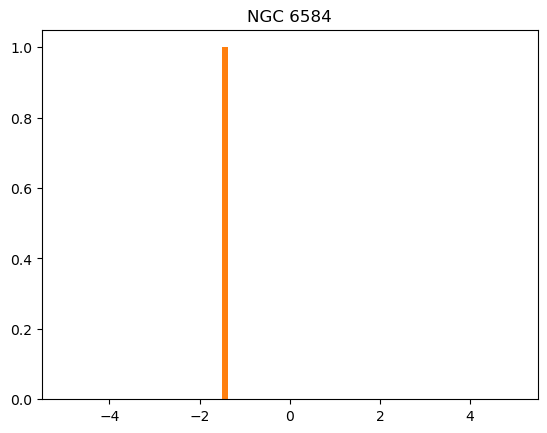

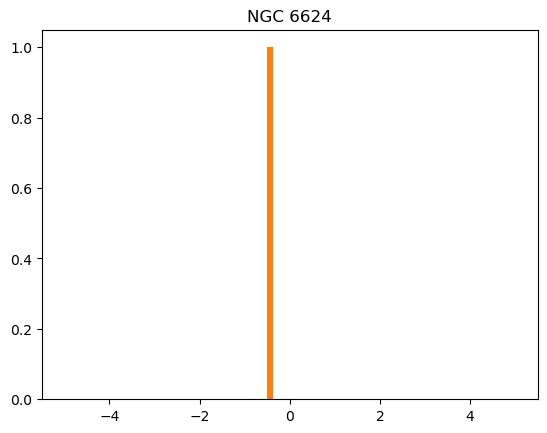

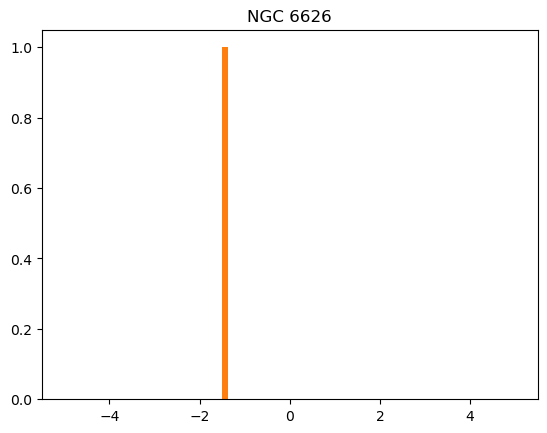

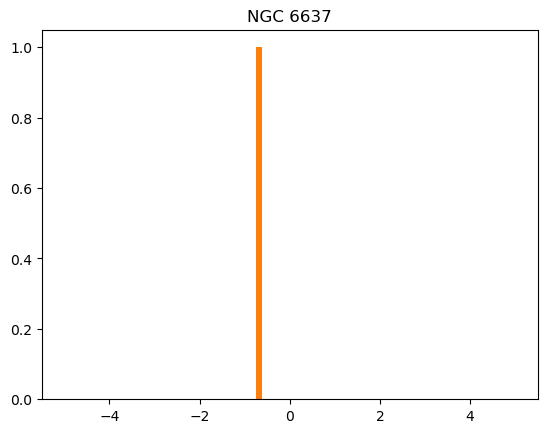

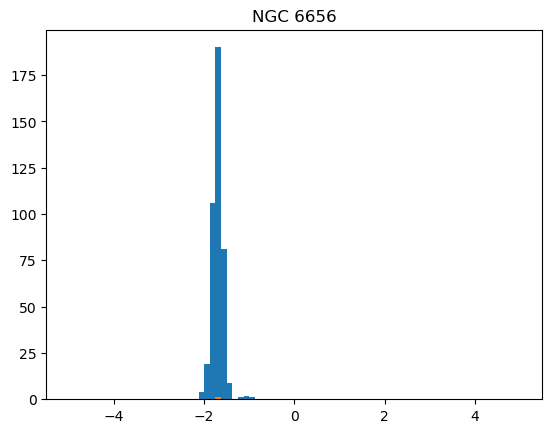

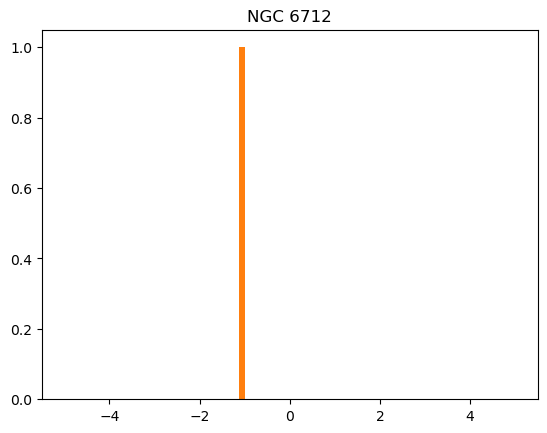

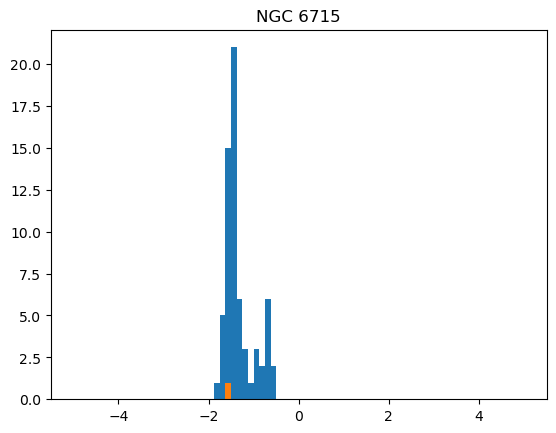

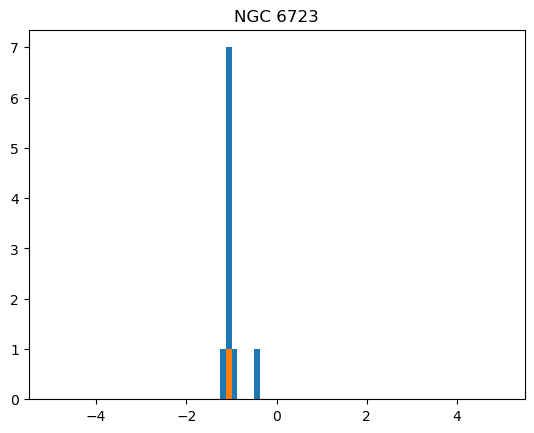

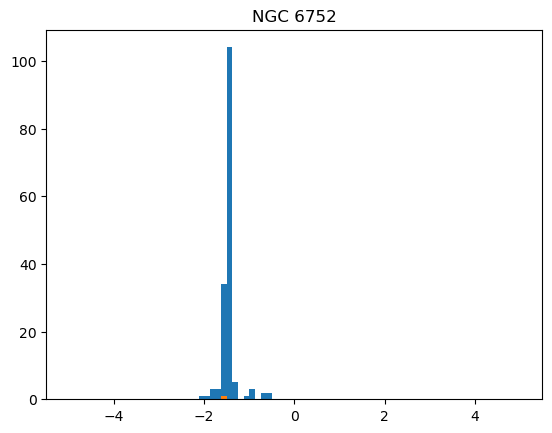

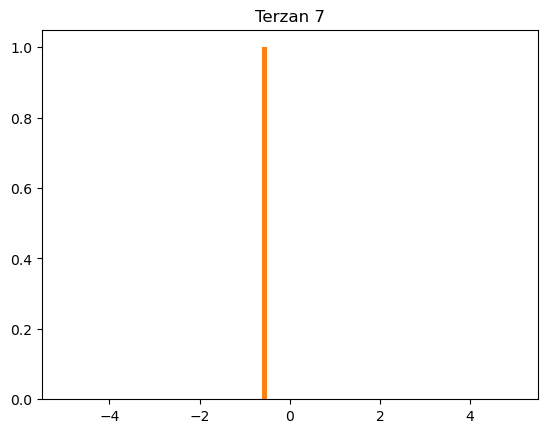

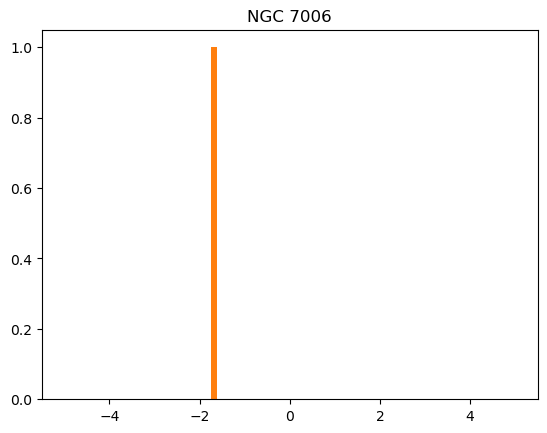

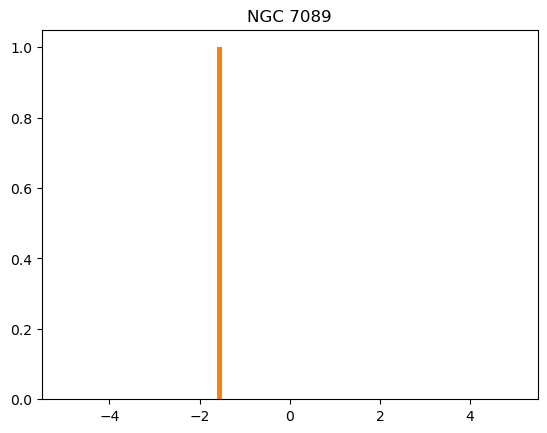

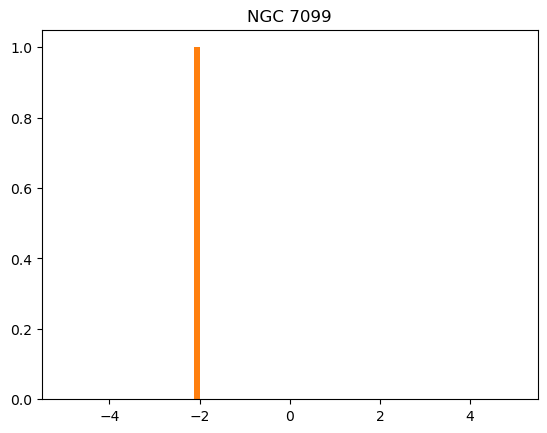

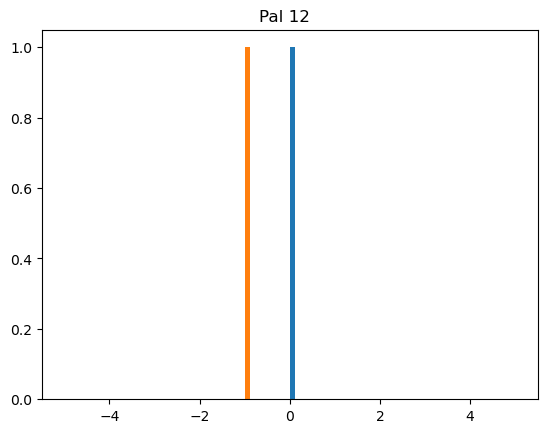

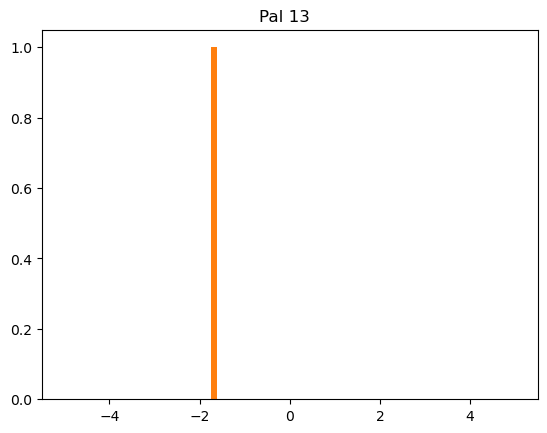

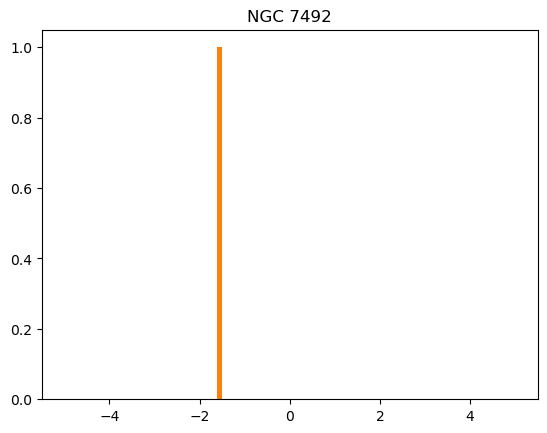

In [223]:
#cluster = feh
#apogee = fe_h
for i in range(len(cluster_stars)):
    
    plt.hist(cluster_stars[i]["FE_H"],range=[-5,5],bins=80)
    plt.hist(glob_clust[i]["FEH"], range=[-5,5],bins=80)
    plt.title(glob_clust[i]["ID"])
    plt.show()

In [275]:
medvel = np.zeros(150)
stdvel = np.zeros(150)

medmet = np.zeros(150)
stdmet = np.zeros(150)

for i in range(150):
    if(cluster_stars[i] is None):
        continue
        
    if(numberOfMatches[i] == 0):
        continue
    
    print(i)
    medvel[i] = np.nanmedian(cluster_stars[i]["VHELIO_AVG"].data)
    stdvel[i] = dln.mad(cluster_stars[i]["VHELIO_AVG"].data)
    
    medmet[i] = np.nanmedian(cluster_stars[i]["FE_H"].data)
    stdmet[i] = dln.mad(cluster_stars[i]["FE_H"].data)
    

    

0
1
2
4
8
9
10
13
16
18
20
21
23
24
25
26
29
34
36
41
43
44
46
49
51
52
53
55
59
62
63
64
65
66
69
72
73
75
76
77
78
79
81
82
84
85
86
89
91
93
96
98
100
102
103
104
105
109
111
113
114
118
120
122
126
127
128
130
131
136
139
144
147


In [269]:
print(cluster_stars[3])
print(numberOfMatches[3])

APOGEE_ID TELESCOPE FIELD  RA DEC ... CE_FE CE_FE_SPEC CE_FE_ERR CE_FE_FLAG
--------- --------- ----- --- --- ... ----- ---------- --------- ----------
0


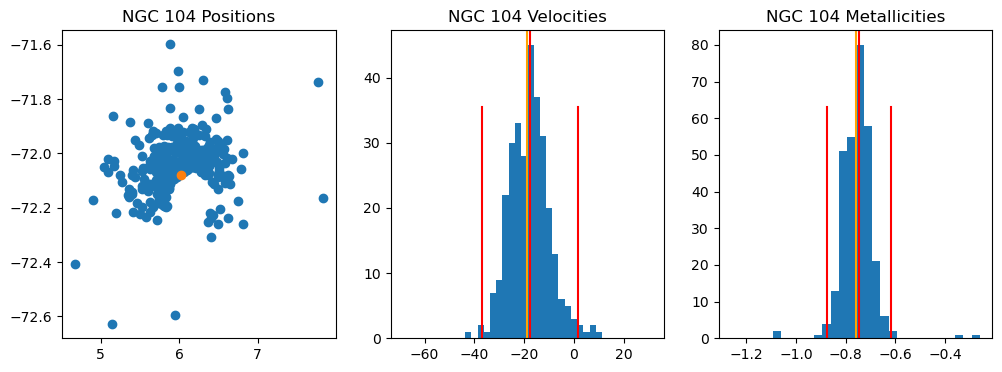

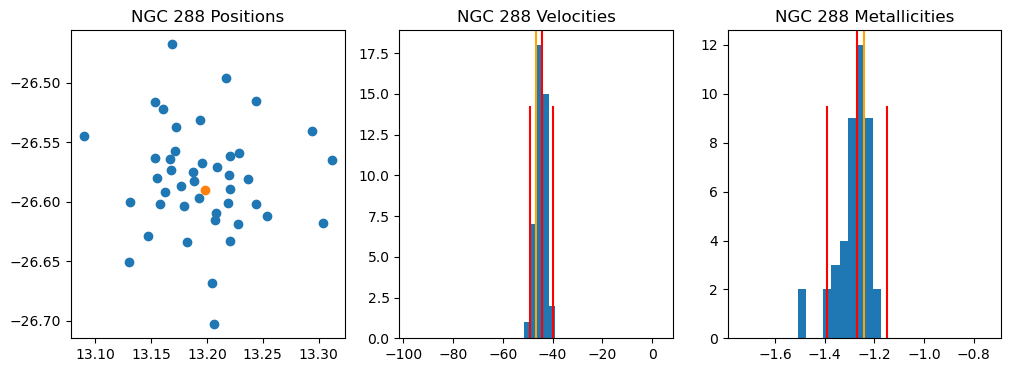

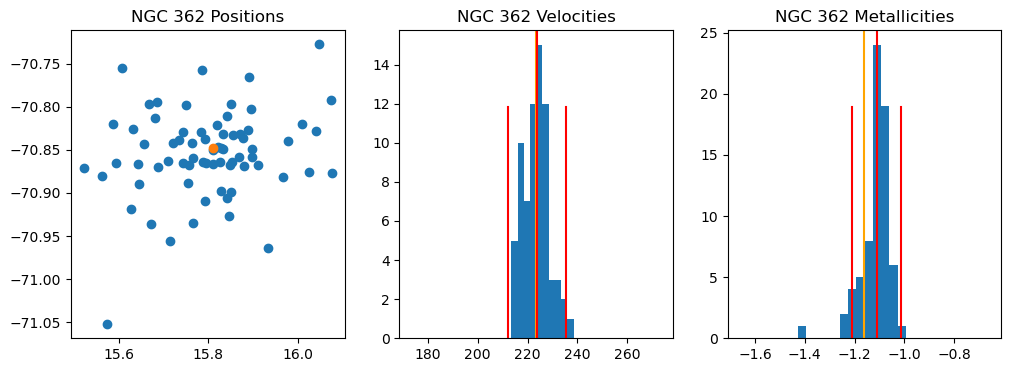

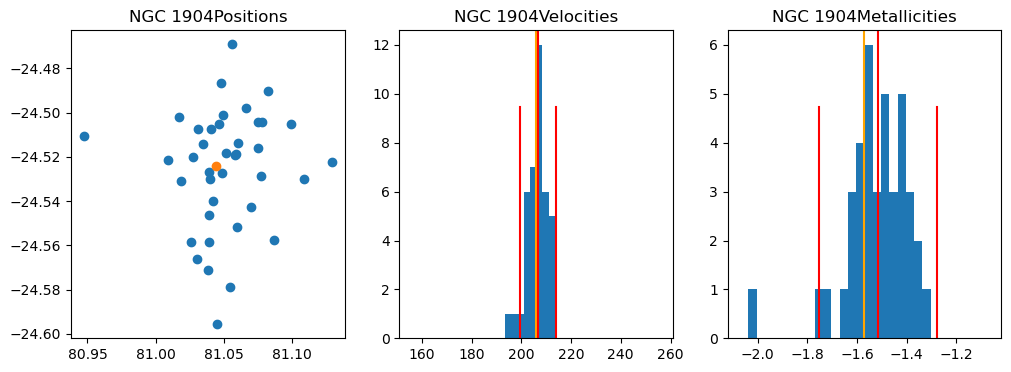

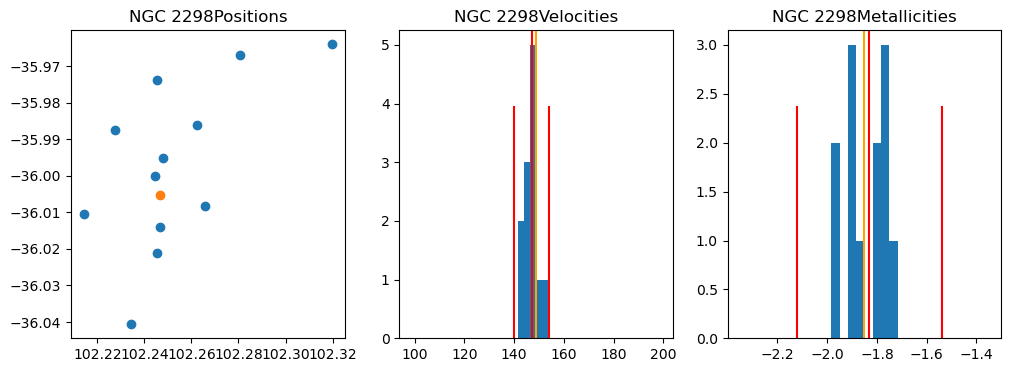

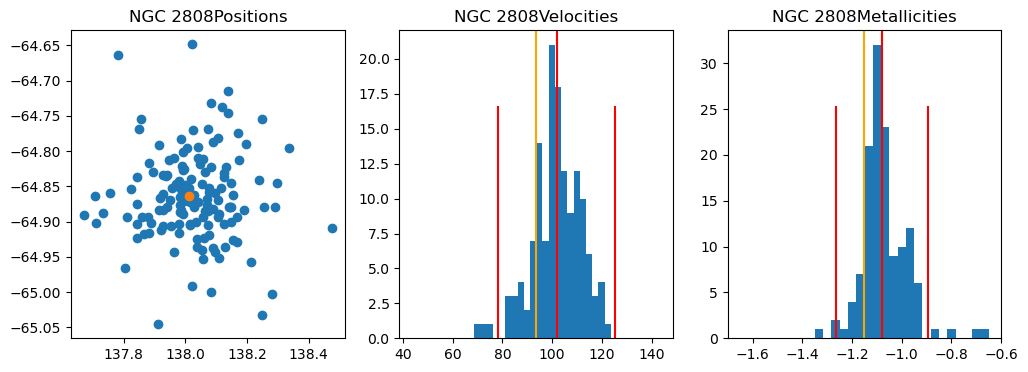

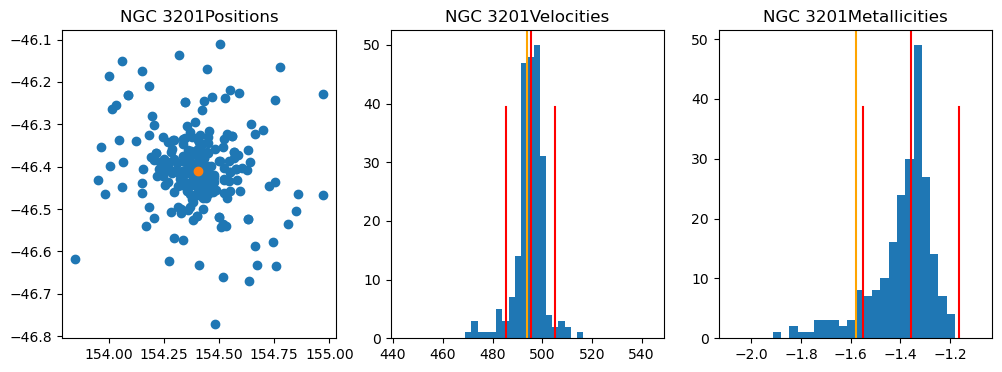

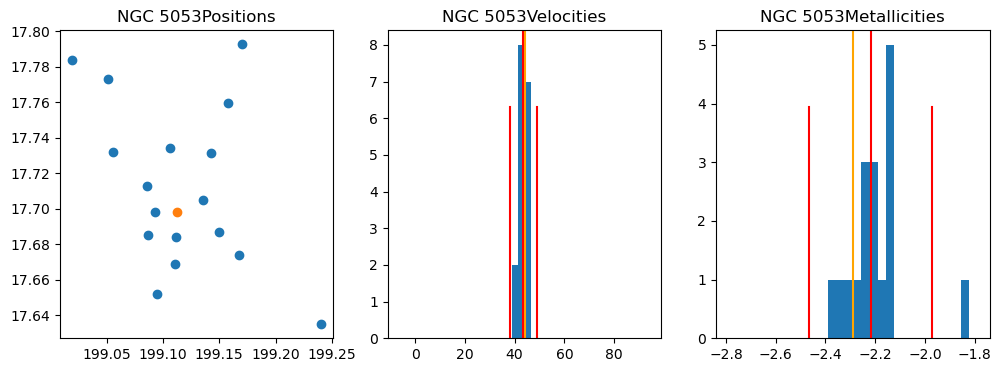

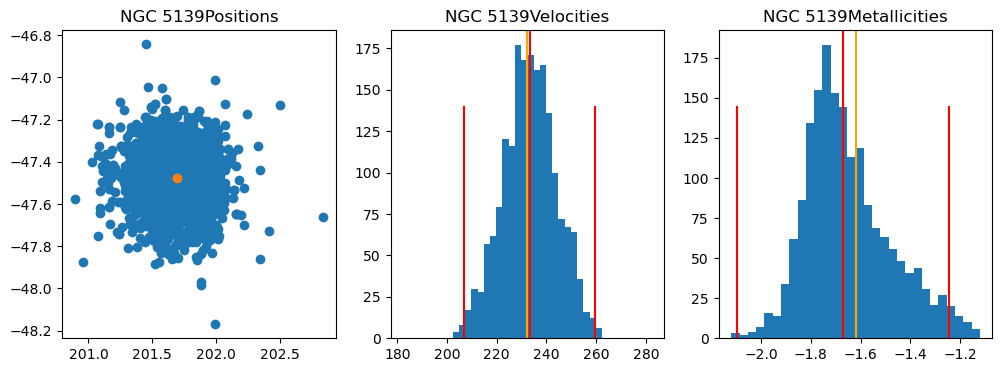

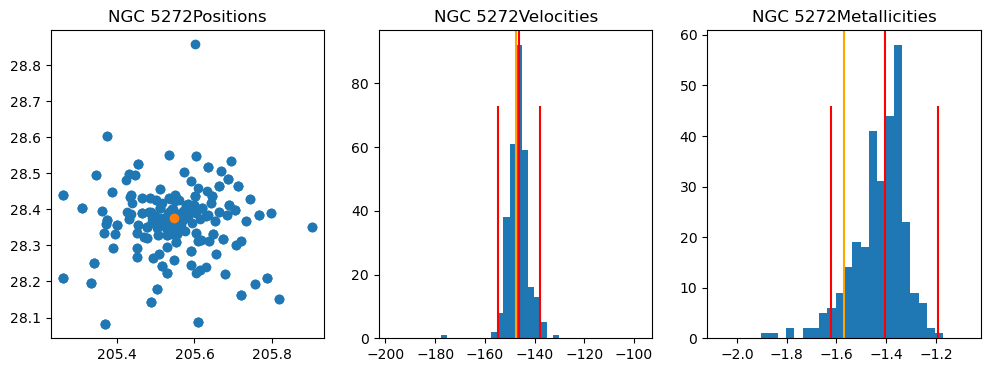

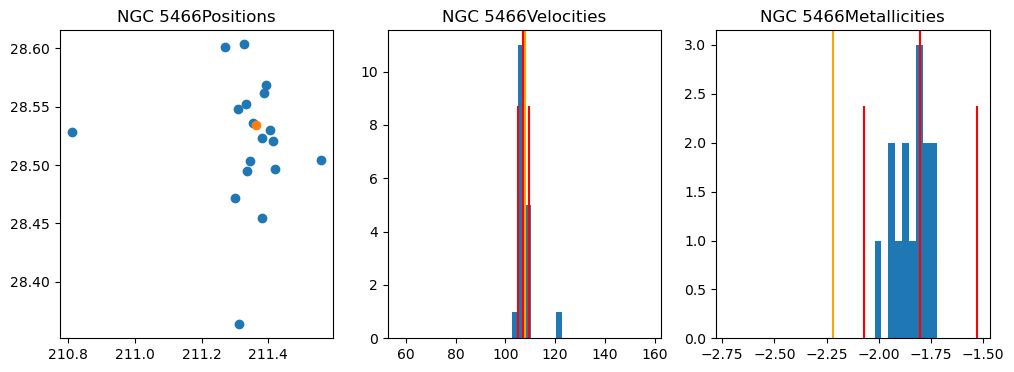

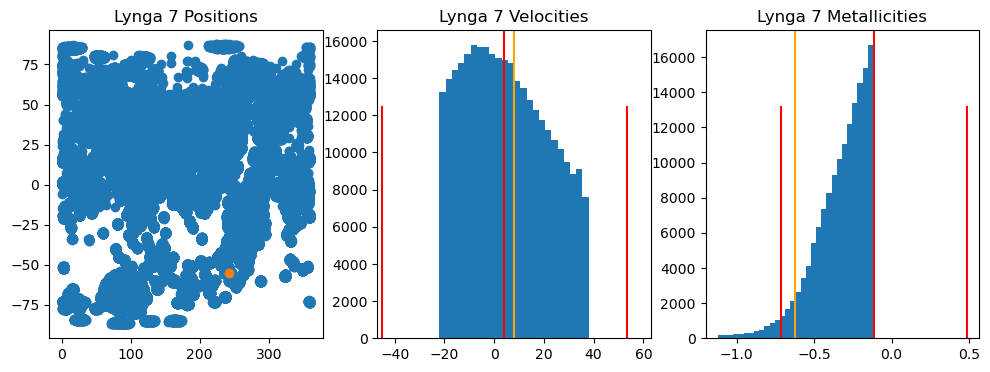

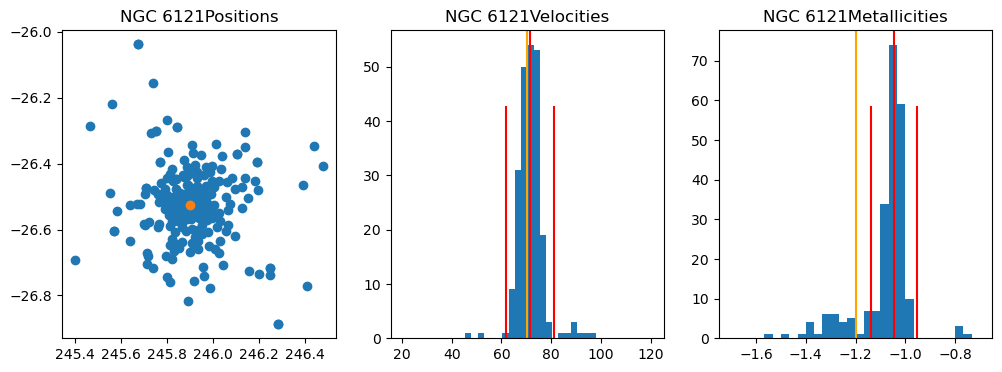

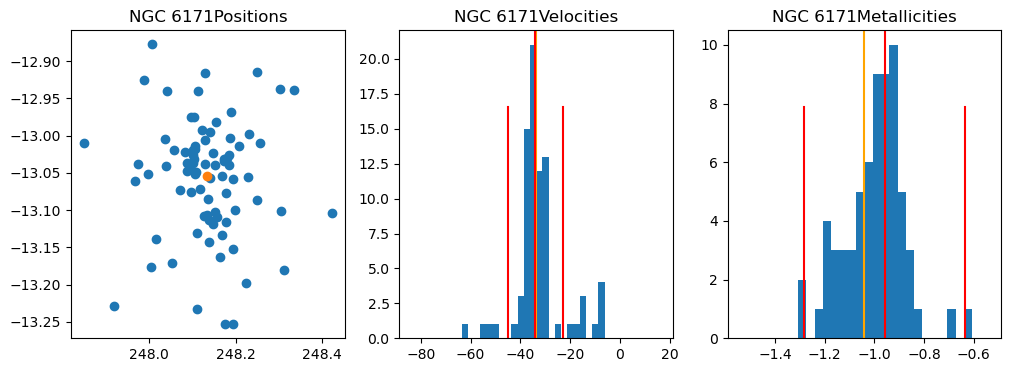

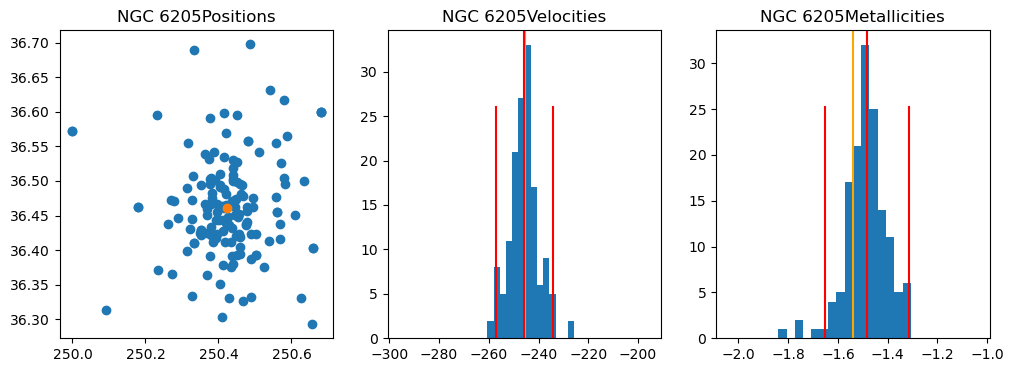

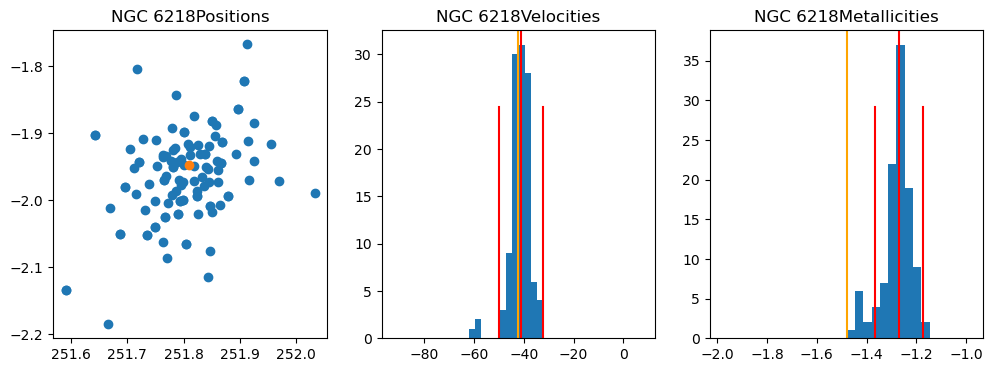

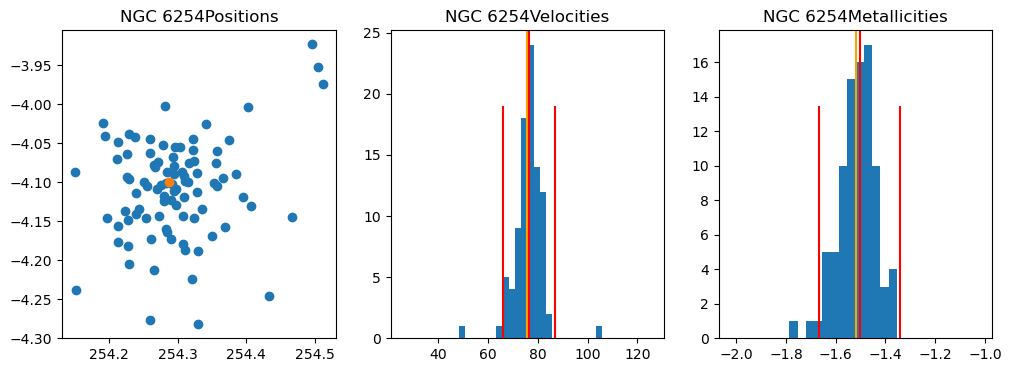

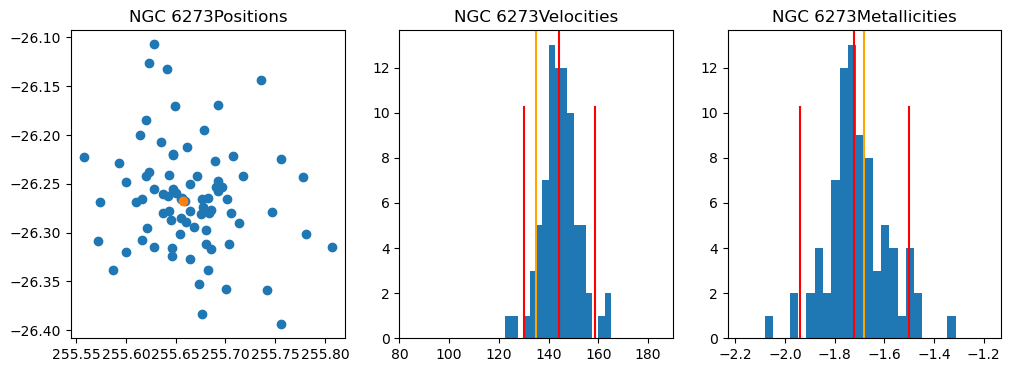

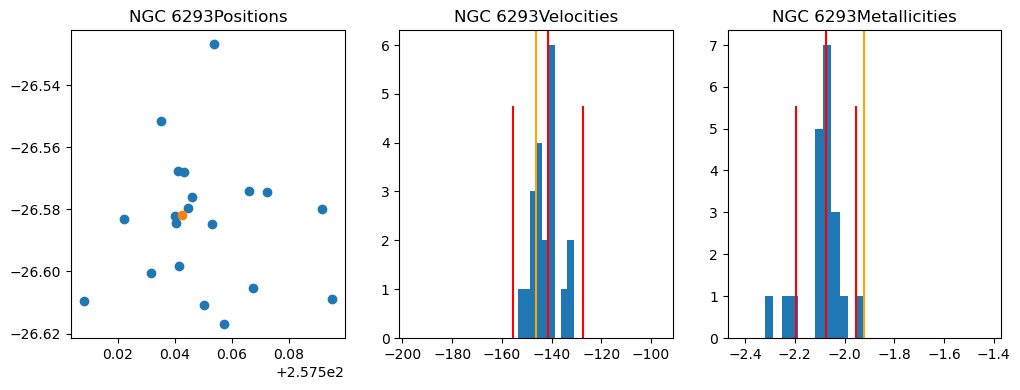

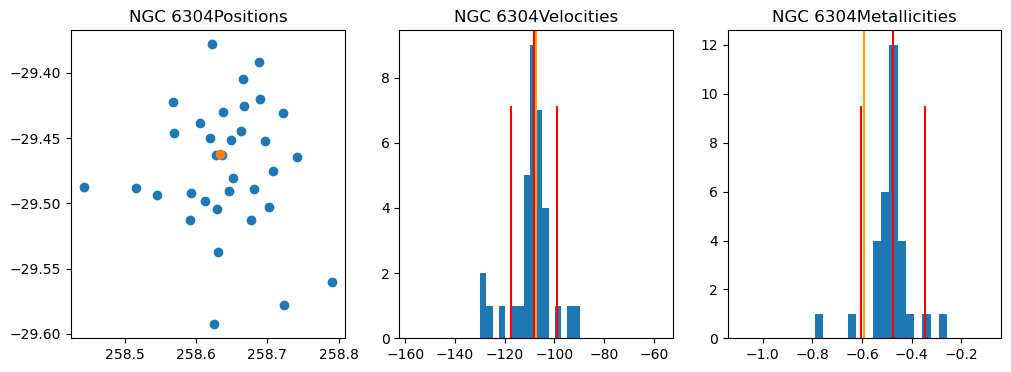

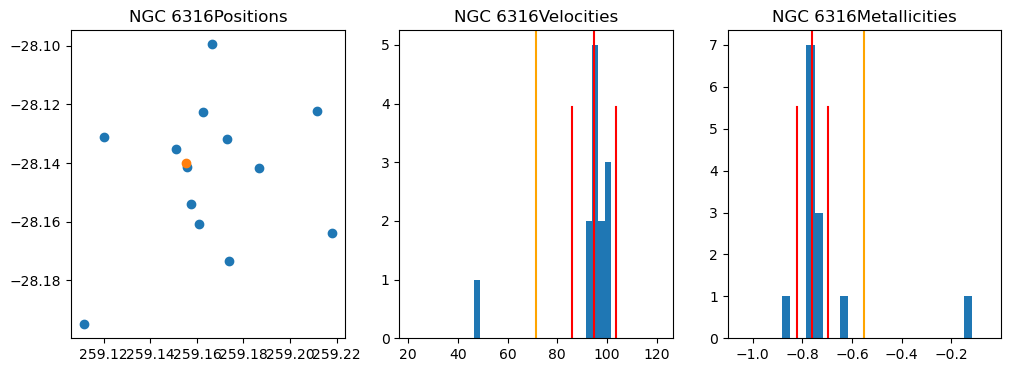

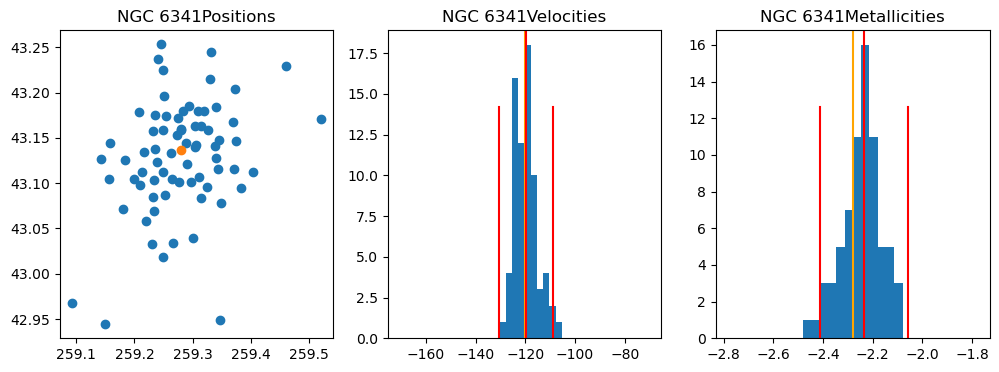

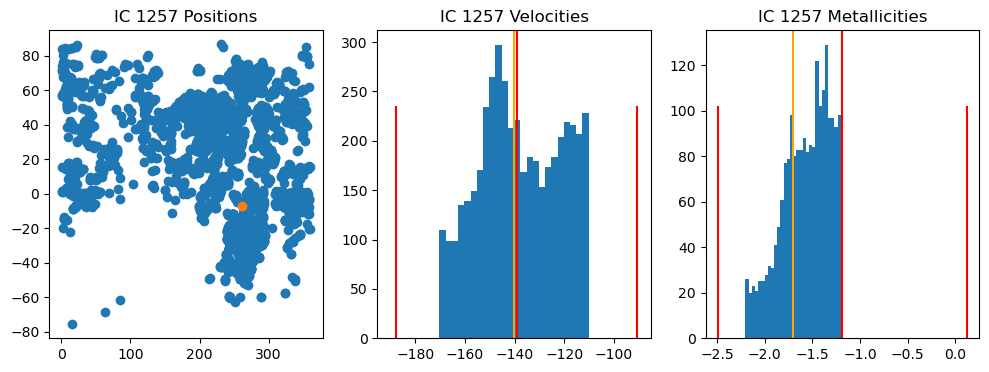

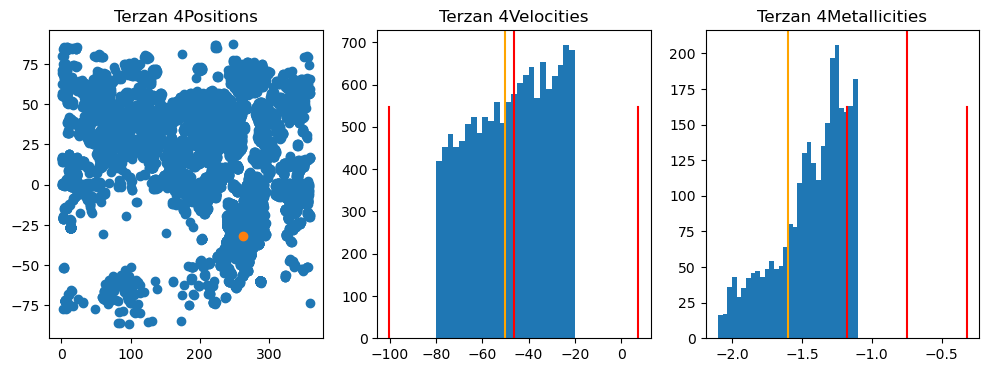

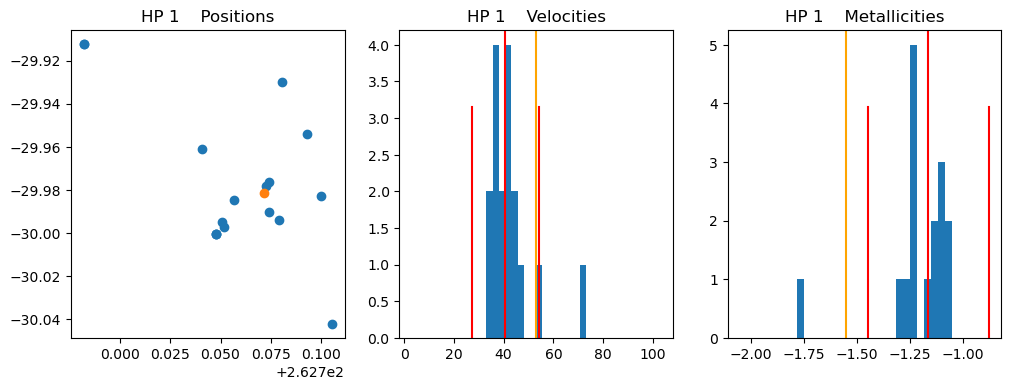

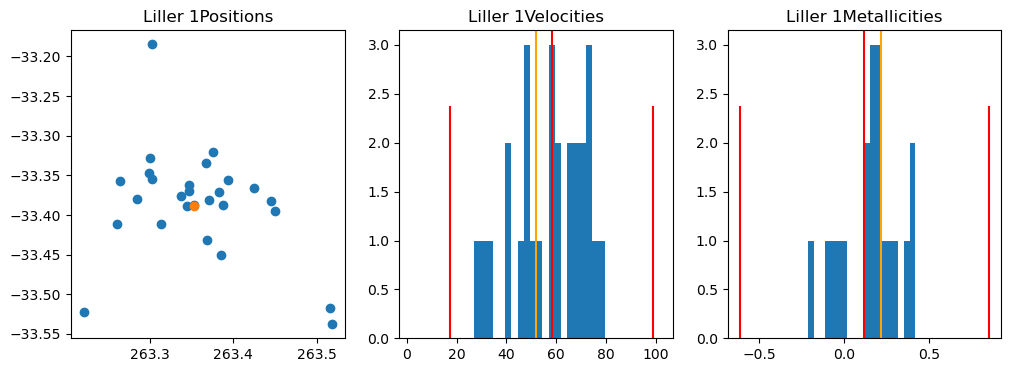

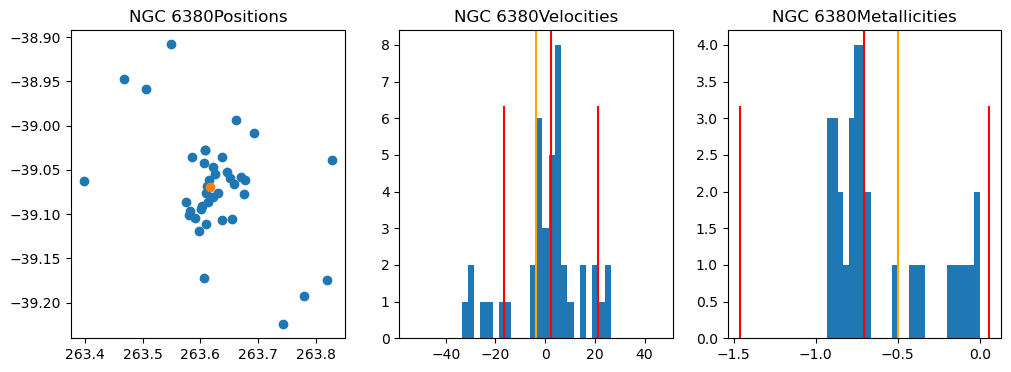

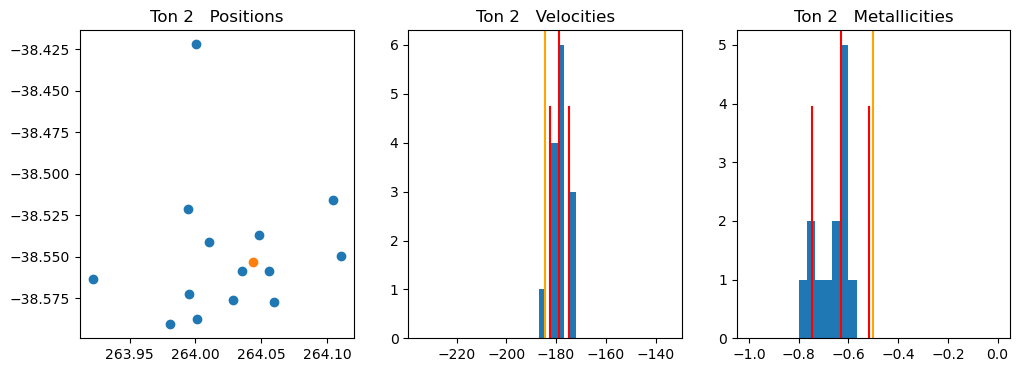

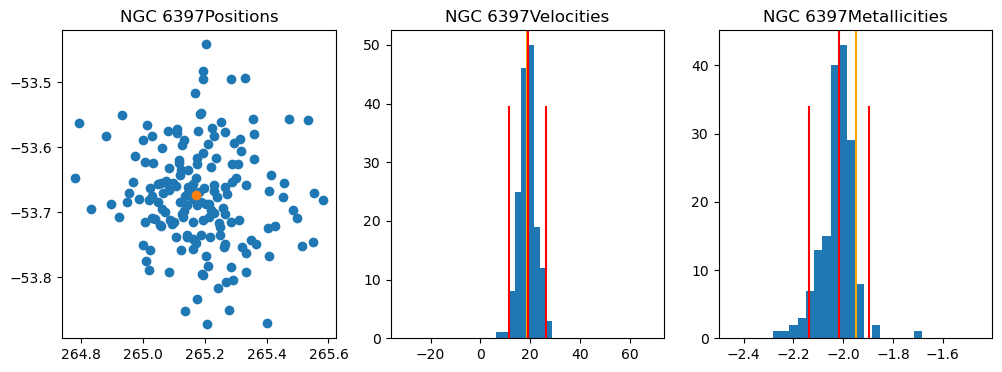

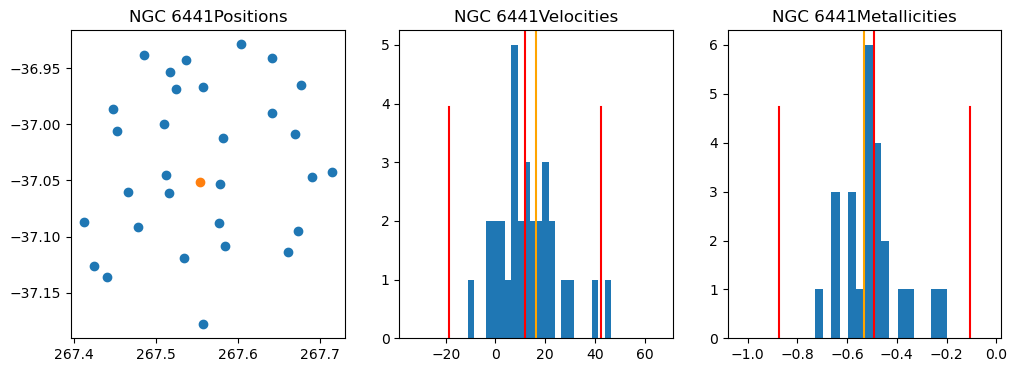

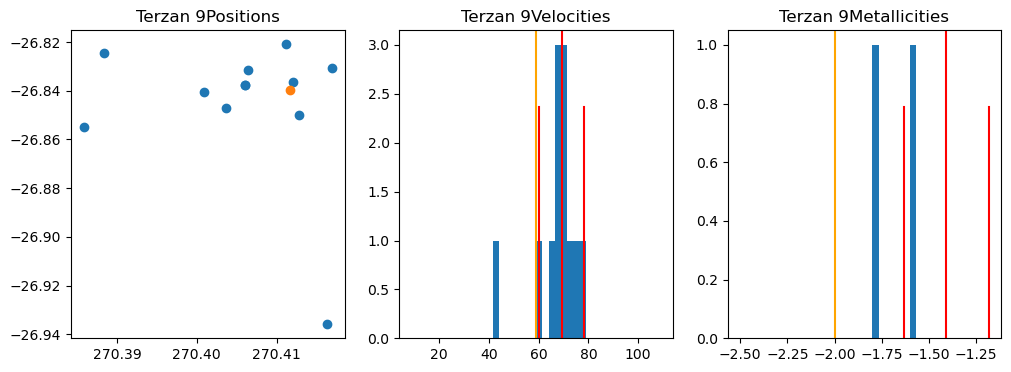

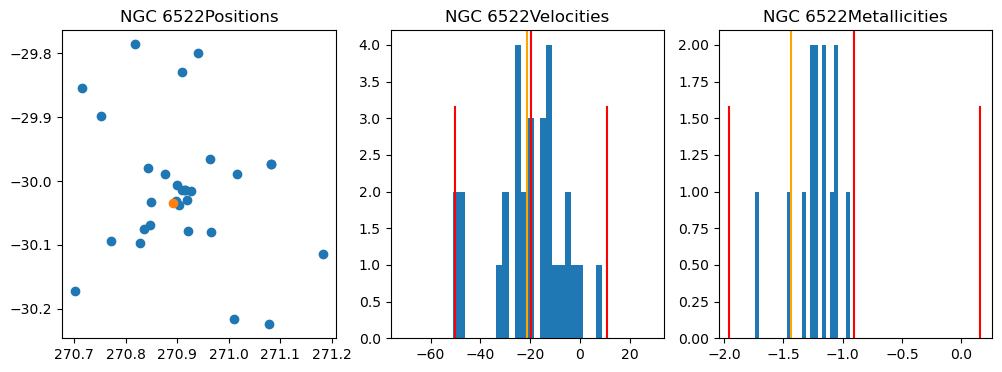

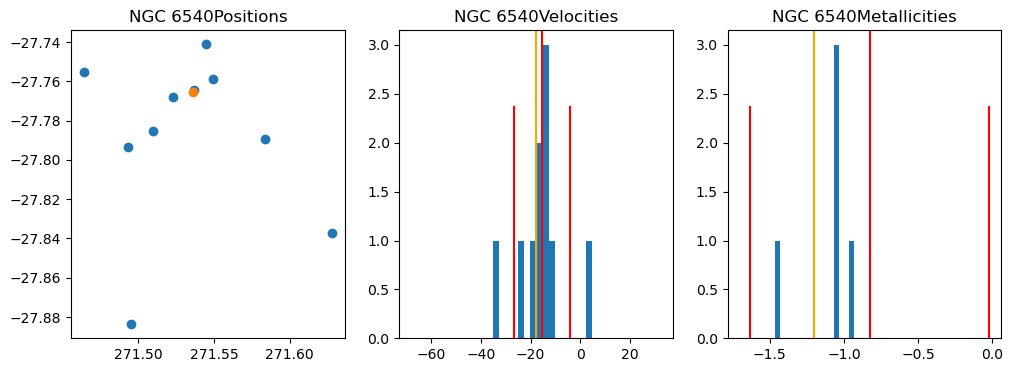

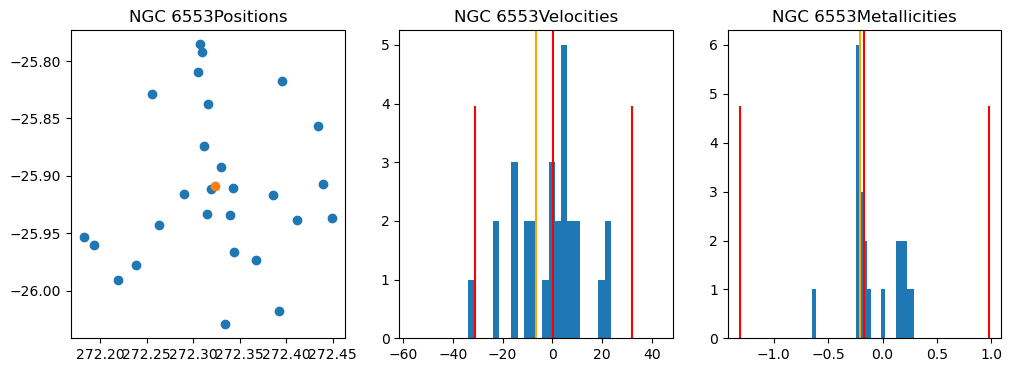

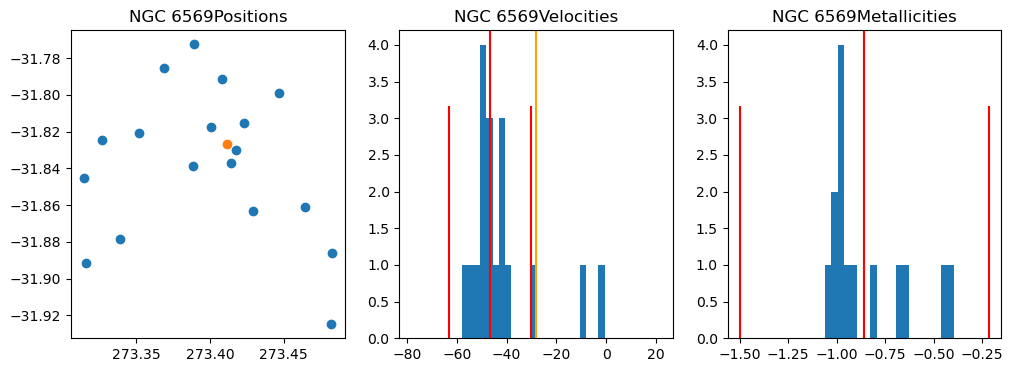

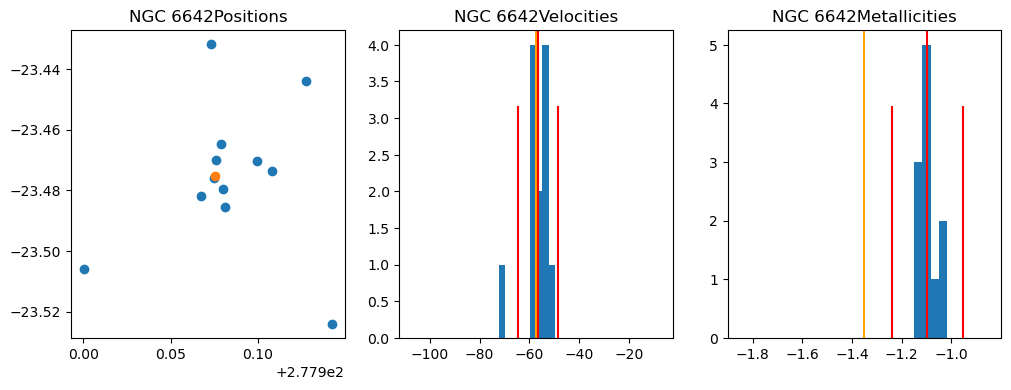

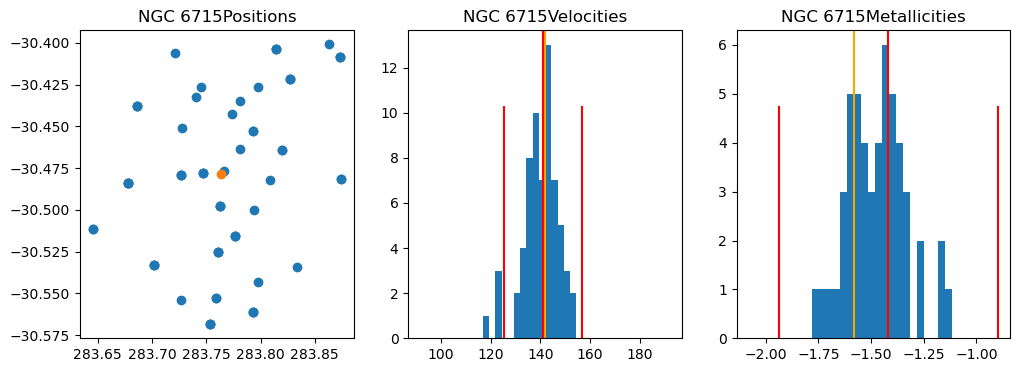

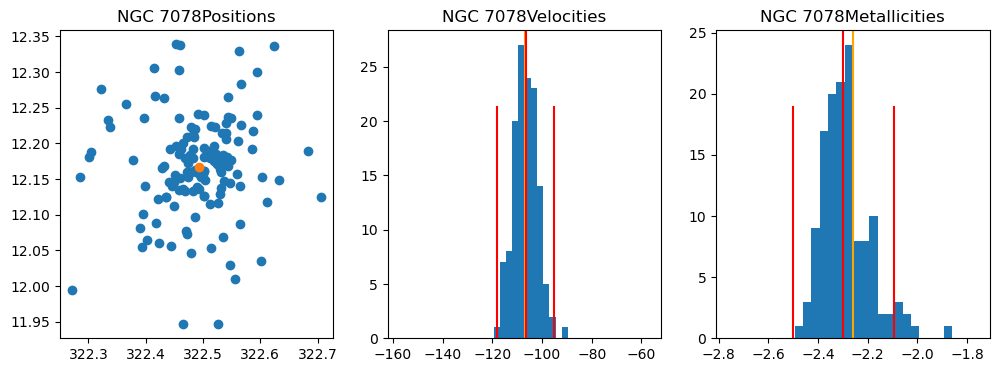

In [276]:
for i in range(len(cluster_stars)):
    graphmin = glob_clust[i]["RV"] -50
    graphmax = graphmin + 100
    
    metalmin = glob_clust[i]["FEH"] - .5
    metalmax = metalmin + 1
    
    if(numberOfMatches[i]<10):
        continue
    
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.scatter(cluster_stars[i]["RA"], cluster_stars[i]["DEC"])
    plt.scatter(glob_clust[i]["RA"]*15, glob_clust[i]["DEC"])
    plt.title(glob_clust[i]["ID"] + "Positions")
    
    plt.subplot(132)
    plt.hist(cluster_stars[i]["VHELIO_AVG"],range=[graphmin,graphmax],bins=40)
    plt.axvline(glob_clust[i]["RV"],0,1,color="orange")
    plt.axvline(medvel[i],0,1,color="red")
    plt.axvline(medvel[i] + stdvel[i]*2.5,0,.75,color="red")
    plt.axvline(medvel[i] - stdvel[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Velocities")
    
    plt.subplot(133)
    plt.hist(cluster_stars[i]["FE_H"],range=[metalmin,metalmax],bins=30)
    plt.axvline(glob_clust[i]["FEH"],0,1,color="orange")
    plt.axvline(medmet[i],0,1,color="red")
    plt.axvline(medmet[i] + stdmet[i]*2.5,0,.75,color="red")
    plt.axvline(medmet[i] - stdmet[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Metallicities")
    plt.show()

In [287]:
for i in range(150): 
    print(str(str(i) + " : " + glob_clust[i]["ID"]) + ' \t' + "Radius: " + str(glob_clust[i]["RT"]) + "\t" + "Velocity: " + str(glob_clust[i]["RV"]) + '   \t' + "Metallicity: " + str(glob_clust[i]["FEH"]))

0 : NGC 104  	Radius: 42.86	Velocity: -18.7   	Metallicity: -0.76
1 : NGC 288  	Radius: 12.94	Velocity: -46.6   	Metallicity: -1.24
2 : NGC 362  	Radius: 16.11	Velocity: 223.5   	Metallicity: -1.16
3 : NGC 1261 	Radius: 7.28	Velocity: 68.2   	Metallicity: -1.35
4 : Pal 1    	Radius: 8.96	Velocity: -82.8   	Metallicity: -0.6
5 : AM 1     	Radius: 1.92	Velocity: 116.0   	Metallicity: -1.8
6 : Eridanus 	Radius: 3.17	Velocity: -23.6   	Metallicity: -1.46
7 : Pal 2    	Radius: 6.76	Velocity: -133.0   	Metallicity: -1.3
8 : NGC 1851 	Radius: 11.7	Velocity: 320.5   	Metallicity: -1.22
9 : NGC 1904 	Radius: 8.34	Velocity: 206.0   	Metallicity: -1.57
10 : NGC 2298 	Radius: 6.48	Velocity: 148.9   	Metallicity: -1.85
11 : NGC 2419 	Radius: 8.74	Velocity: -20.0   	Metallicity: -2.12
12 : Pyxis    	Radius: 6.18	Velocity: 34.3   	Metallicity: -1.3
13 : NGC 2808 	Radius: 15.55	Velocity: 93.6   	Metallicity: -1.15
14 : E 3      	Radius: 10.52	Velocity: 999999.0   	Metallicity: -0.8
15 : Pal 3    	Radi

In [278]:
np.sum(numberOfMatches>15)

41

look up values for weird 999999.0 values on Simbad (or check in literature)
use stdeviation values to cutt off leftover stars
caluclate mean metaliciites of the viable clusters
mean radial velocity
calculate mean alpha abundance ("alpha_m")
use gaia columns (parallax, pmra, pmdec)
weighted mean (on uncercainty) : weight = 1/error^2
parallax (arcseconds) = 1/distance (in parsecs)
milliarcseconds -> kiloparsecs
table: all values!!!!
double check if these values line up with literature